# Описание проекта
Вы работаете специалистом по обработке данных в глобальной финансовой компании. На протяжении многих лет компания собирала основные банковские реквизиты и собрала много информации, связанной с кредитом. Руководство хочет создать интеллектуальную систему для разделения сотрудников по категориям кредитных баллов, чтобы сократить ручные усилия.

# Цель и задачи проекта:
## Цель - предсказание кредитного рейтинга клиентов компании.
## Задачи:
1. Очистка и подготовка датасета к моделированию.
2. Отбор признаков, значимых для построения модели.
3. Учитывая информацию, связанную с кредитом человека, создать модель машинного обучения, которая может классифицировать кредитный рейтинг.

Метрика В качестве метрики качества модели использовалась Accuracy - доля правильных ответов алгоритма.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        name = os.path.join(dirname, filename)
        print(name)
        
        if 'train.csv' in name:
            train_file_name = name
        elif 'test.csv' in name:
            test_file_name = name
            
print('train data :', train_file_name)
print('test data  :', test_file_name)

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv
train data : /kaggle/input/credit-score-classification/train.csv
test data  : /kaggle/input/credit-score-classification/test.csv


# 1. Предварительный анализ набора данных

In [3]:
# прочитаем training и test data
train_data = pd.read_csv(train_file_name)
test_data  = pd.read_csv(test_file_name)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Описание данных:

0. ID: Уникальный идентификатор записи
1. Customer_ID: Уникальный идентификатор клиента
2. Month: Месяц в году
3. Name: Имя клиента
4. Age: Возраст клиента
5. SSN: Номер социального страхования данного лица
6. Occupation: Род занятий клиента
7. Annual_Income: Годовой доход лица
8. Monthly_Inhand_Salary: Ежемесячная заработная плата клиента
9. Num_Bank_Accounts: Количество банковских счетов данного лица
10. Num_Credit_Card: Количество кредитных карт, имеющихся у данного лица
11. Interest_Rate: Процентная ставка по кредитной карте данного лица
12. Num_of_Loan: Количество кредитов, взятых лицом в банке
13. Type_of_Loan: Виды кредитов, взятых лицом в банке
14. Delay_from_due_date: Среднее количество дней, просроченных лицом с момента оплаты
15. Num_of_Delayed_Payment: Количество платежей, задержанных данным лицом
16. Changed_Credit_Card: Процентное изменение лимита кредитной карты данного лица
17. Num_Credit_Inquiries: Количество запросов по кредитной карте, сделанных данным лицом
18. Credit_Mix: Классификация кредитного портфеля клиента
19. Outstanding_Debt: Непогашенный баланс клиента
20. Credit_Utilization_Ratio: Коэффициент использования кредита по кредитной карте клиента
21. Credit_History_Age: Возраст кредитной истории лица
22. Payment_of_Min_Amount: Да, если лицо оплатило только минимальную сумму, подлежащую выплате, в противном случае нет
23. Total_EMI_per_month: Общий EMI человека в месяц
24. Amount_invested_monthly: Ежемесячная сумма, инвестируемая лицом
25. Payment_Behaviour: Платежное поведение лица
26. Monthly_Balance: Ежемесячный остаток, оставшийся на счете данного лица
27. Credit_Score: Кредитный рейтинг клиента

In [4]:
# посмотрим на данные
train_data.head(15)

ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333                  3  ...   
1   Scientist      19114.12                    NaN                  3  ...   
2   Scientist      19114.12                    NaN                  3  ...   
3   Scientist      19114.12                    NaN                  3  ...   
4   Scientist      19114.12            1824.843333                  3  ...   
5   Scientist      19114.12                    NaN                  3  ...   
6   Scientist      19114.12            1824.843333                  3  ...   
7   Scientist      19114.12            1824.843333                  3  ...   
8     _______      34847.84            3037.986667                  2  ...   
9     Teacher      34847.84            3037.986667                  2  ...   
10    Teacher     34847.84_            3037.986667                  2  ...   
11    Teacher      34847.84                    NaN                  2  ...   
12    Teacher      34847.84            3037.986667                  2  ...   
13    Teacher      34847.84            3037.986667                  2  ...   
14    Teacher      34847.84                    NaN                  2  ...   

    Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            _            809.98                26.822620   
1         Good            809.98                31.944960   
2         Good            809.98                28.609352   
3         Good            809.98                31.377862   
4         Good            809.98                24.797347   
5         Good            809.98                27.262259   
6         Good            809.98                22.537593   
7         Good            809.98                23.933795   
8         Good            605.03                24.464031   
9         Good            605.03                38.550848   
10           _            605.03                33.224951   
11        Good            605.03                39.182656   
12        Good            605.03                34.977895   
13        Good            605.03                33.381010   
14        Good            605.03                31.131702   

        Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0    22 Years and 1 Months                     No           49.574949   
1                      NaN                     No           49.574949   
2    22 Years and 3 Months                     No           49.574949   
3    22 Years and 4 Months                     No           49.574949   
4    22 Years and 5 Months                     No           49.574949   
5    22 Years and 6 Months                     No           49.574949   
6    22 Years and 7 Months                     No           49.574949   
7                      NaN                   

In [5]:
test_data.head(15)

ID Customer_ID      Month             Name  Age          SSN  \
0   0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1   0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2   0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3   0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4   0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   
5   0x1617  CUS_0x21b1    October  Rick Rothackerj   28    #F%$D@*&8   
6   0x1618  CUS_0x21b1   November  Rick Rothackerj   28  004-07-5839   
7   0x1619  CUS_0x21b1   December  Rick Rothackerj   28  004-07-5839   
8   0x1622  CUS_0x2dbc  September           Langep   35  486-85-3974   
9   0x1623  CUS_0x2dbc    October           Langep   35  486-85-3974   
10  0x1624  CUS_0x2dbc   November              NaN   35  486-85-3974   
11  0x1625  CUS_0x2dbc   December           Langep   35  486-85-3974   
12  0x162e  CUS_0xb891  September           Jasond   55  072-31-6145   
13  0x162f  CUS_0xb891    October           Jasond   55  072-31-6145   
14  0x1630  CUS_0xb891   November           Jasond   55  072-31-6145   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
5        Teacher      34847.84            3037.986667                  2  ...   
6        Teacher      34847.84            3037.986667                  2  ...   
7        Teacher      34847.84            3037.986667                  2  ...   
8       Engineer     143162.64                    NaN                  1  ...   
9       Engineer     143162.64           12187.220000                  1  ...   
10      Engineer     143162.64           12187.220000                  1  ...   
11      Engineer     143162.64           12187.220000                  1  ...   
12  Entrepreneur      30689.89            2612.490833                  2  ...   
13  Entrepreneur      30689.89            2612.490833                  2  ...   
14  Entrepreneur      30689.89            2612.490833                  2  ...   

    Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0                 2022.0        Good           809.98   
1                    4.0        Good           809.98   
2                    4.0        Good           809.98   
3                    4.0        Good           809.98   
4                    5.0        Good           605.03   
5                    5.0        Good           605.03   
6                    5.0           _           605.03   
7                    5.0           _           605.03   
8                    3.0        Good          1303.01   
9                    3.0        Good          1303.01   
10                   5.0        Good         1303.01_   
11                   5.0        Good          1303.01   
12                   4.0        Good           632.46   
13                   4.0           _           632.46   
14                   4.0        Good           632.46   

   Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                 35.030402   22 Years and 9 Months                    No   
1                 33.053114  22 Years and 10 Months                    No   
2                 33.811894                     NaN                    No   
3                 32.430559   23 Years and 0 Months                    No   
4                 25.926822   27 Years and 3 Months                    No   
5                 30.116600   27 Years and 4 Months                    No   
6                 30.996424   27 Years and 5 Months                    No   
7                 33.875167  

Видно, что есть странные значения в различных колонках.

In [6]:
# метод info() покажет пропуски в данных и их тип
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<AxesSubplot:>

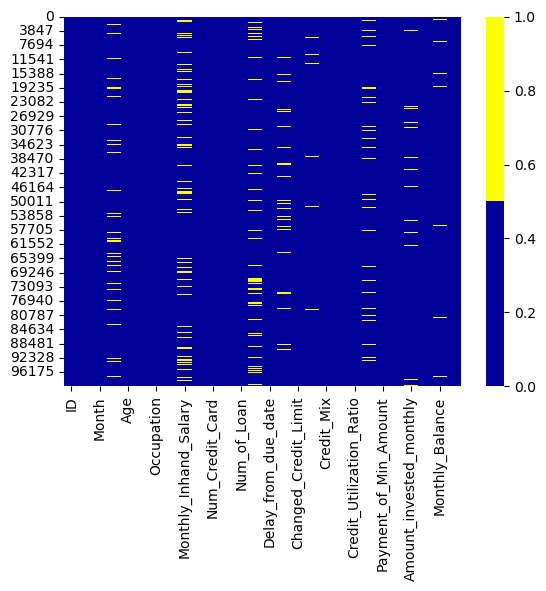

In [7]:
cols = train_data.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
# Пропуски в процентах
train_data.isnull().sum() / len(train_data)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

Во-первых, можно отметить, что в колонках ```Age```, ```Occupation```, ```Payment_Behaviour```  есть странные значения.

Во-вторых, в колонках ```Name```, ```Monthly_Inhand_Salary```, ```Type_of_Loan```, ```Num_of_Delayed_Payment```, ```Num_Credit_Inquiries```, ```Credit_Hitory_Age```, ```Amount_invested_monthly```, и ```Monthly_Balance``` еть нулевые значения.

# 2. Трансформирование и чистка данных

In [9]:
# удалим ID, Name и SSN (Customer_ID необходим для удаления дубликатов)
train_data = train_data.drop(columns=['ID', 'Name', 'SSN'])
test_data = test_data.drop(columns=['ID', 'Name', 'SSN'])

In [10]:
train_data[train_data['Customer_ID'] == 'CUS_0xd40']

Customer_ID     Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40   January    23  Scientist      19114.12            1824.843333   
1   CUS_0xd40  February    23  Scientist      19114.12                    NaN   
2   CUS_0xd40     March  -500  Scientist      19114.12                    NaN   
3   CUS_0xd40     April    23  Scientist      19114.12                    NaN   
4   CUS_0xd40       May    23  Scientist      19114.12            1824.843333   
5   CUS_0xd40      June    23  Scientist      19114.12                    NaN   
6   CUS_0xd40      July    23  Scientist      19114.12            1824.843333   
7   CUS_0xd40    August    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   
2                  3                4              3           4  ...   
3                  3                4              3           4  ...   
4                  3                4              3           4  ...   
5                  3                4              3           4  ...   
6                  3                4              3           4  ...   
7                  3                4              3           4  ...   

  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0          _            809.98                26.822620   
1       Good            809.98                31.944960   
2       Good            809.98                28.609352   
3       Good            809.98                31.377862   
4       Good            809.98                24.797347   
5       Good            809.98                27.262259   
6       Good            809.98                22.537593   
7       Good            809.98                23.933795   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872438         Good  
6   244.5653167062043         Good  
7  358.12416760938714     Standard  

[8 rows x 25 columns]

При выборе данных с определенным Customer_ID, можно заметить, что на каждого клиента в train_data приходится по 8 строк, а в test_data по 4 строки, это будем использовать позднее. Также отмечу, что есть различные пропуски в колонках, которые можно убрать путем соспоставления по Customer_ID. Есть данные, которые не меняются для одного и того же клиента, а есть данные, которые отличаются от месяца к месяцу.

In [11]:
# удаляем '_' в данных
# fixed /var : заменим ошибочные значения (используя замену значениями, указывающими на одного и того же клиента)

# int_fixed : целочисленное значение, имеет одинаковое значение для каждого клиента
# int_var : целочисленное значение, имеет разные значения для каждого клиента


int_fixed = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
int_var = ['Delay_from_due_date', 'Num_of_Delayed_Payment']

def convert_to_int(string):
    try:
        return int(str(string).replace('_', ''))
    except:
        return 'nan'

# удалим '_' чтобы конвертировать в int
for data in [train_data, test_data]:
    int_col_with_str = int_fixed + int_var
    for int_col in int_col_with_str:
        data[int_col] = data[int_col].apply(lambda x: convert_to_int(x))

In [12]:
# float_fixed : значение с плавающей точкой, имеет одинаковое значение для каждого клиента
# float_var : значение с плавающей точкой, имеет разные значения для каждого клиента

float_fixed = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month']
float_var = ['Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']

def convert_to_float(string):
    try:
        return float(str(string).replace('_', ''))
    except:
        return 'nan'
    
# удалим '_' чтобы конвертировать в float
for data in [train_data, test_data]:
    float_col_with_str = float_fixed + float_var
    for float_col in float_col_with_str:
        data[float_col] = data[float_col].apply(lambda x: convert_to_float(x))

In [13]:
# Credit_History_Age преобразуем в месяцы
def convert_credit_history(credit_history_age):
    if str(credit_history_age) == 'nan':
        return 'nan'
    else:
        years = int(credit_history_age.split(' ')[0])
        months = int(credit_history_age.split(' ')[3])
        return 12 * years + months

In [14]:
# Проверю, какие значения есть в столбце 'Payment_Behaviour'
train_data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [15]:
# Разделяю Payment_Behaviour на 'spent' и 'value'
def convert_payment_behaviour(behaviour, split_name):
    try:
        if split_name == 'spent':
            return behaviour.split('_')[0]
        elif split_name == 'value':
            return behaviour.split('_')[2]
        else:
            return 'nan'
    except:
        return 'nan'

In [16]:
# Проверю, какие значения есть в столбце 'Type_of_Loan'
train_data['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [17]:
# Type_of_Loan: если включает = 1 и не включает = 0 в определенный тип займа
def convert_type_of_loan(original_text, loan_type):
    if original_text == '':
        return 'nan'
    
    try:
        loans = original_text.split(', ')
        if loan_type in loans:
            return 1
        else:
            return 0
    except:
        return 'nan'
    
# найду все виды кредитов, такие как 'Credit-Builder Loan', 'Personal Loan', ...
merged_data = pd.concat([train_data, test_data])
loan_type_column = merged_data['Type_of_Loan']

loan_type_all = []
for i in range(len(merged_data)):
    try:
        loan_types = loan_type_column.iloc[i].split(', ')
        for loan_type in loan_types:
            if len(loan_type) >= 5 and loan_type[:4] == 'and ':
                loan_type_all.append(loan_type[4:])
            else:
                loan_type_all.append(loan_type)
    except:
        pass
        
# не содержит 'Not Specified' тип займа
loan_type_all = list(set(loan_type_all) - set(['Not Specified']))
print(loan_type_all)

['Payday Loan', 'Credit-Builder Loan', 'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Auto Loan', 'Personal Loan']


In [18]:
# конвертируем колонки, для которых были написаны функции для конвертации
for data in [train_data, test_data]:
    data['Credit_History_Age'] = data['Credit_History_Age'].apply(
        lambda x: convert_credit_history(x)
    )
    data['Payment_Behaviour_Spent'] = data['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'spent')
    )
    data['Payment_Behaviour_Value'] = data['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'value')
    )
    
    for loan_type in loan_type_all:
        data['Loan_Type_' + loan_type.replace(' ', '_')] = data['Type_of_Loan'].apply(
            lambda x: convert_type_of_loan(x, loan_type)
        )

# удаляю повторяющиеся колонки
train_data = train_data.drop(columns=['Payment_Behaviour', 'Type_of_Loan'])
test_data  = test_data .drop(columns=['Payment_Behaviour', 'Type_of_Loan'])

In [19]:
# преобразуем месяцы из строкового типа в float, причем, чтобы их значения были в пределах от 0 до 1
def map_month(month_str):
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month_str) / 11
    
for data in [train_data, test_data]:
    data['Month'] = data['Month'].apply(lambda x: map_month(x))

# проверяем
train_data['Month'].value_counts()

0.000000    12500
0.090909    12500
0.181818    12500
0.272727    12500
0.363636    12500
0.454545    12500
0.545455    12500
0.636364    12500
Name: Month, dtype: int64

In [20]:
# заменила значения ошибок для столбцов, фиксированных для клиента
fixed_numeric_columns = int_fixed + float_fixed

nRowsTrain = len(train_data)
nRowsTest = len(test_data)

for col in fixed_numeric_columns:
    print('current processing column : ' + col)   # чтобы было видно, какой из столбцов обработался
    
    # заменила на наиболее частое значение для того же клиента (всего 8 (train), 4 (test) значения для каждого клиента)
    for i in range(nRowsTrain // 8):
        column = train_data.loc[train_data['Customer_ID'] == train_data['Customer_ID'].iloc[i * 8]][col]
        most_frequent_values = column.dropna().mode()
        
        if len(most_frequent_values) > 0:
            train_data[col].iloc[8 * i : 8 * (i + 1)] = most_frequent_values[0]
        
    for i in range(nRowsTest // 4):
        column = test_data.loc[test_data['Customer_ID'] == test_data['Customer_ID'].iloc[i * 4]][col]
        most_frequent_values = column.dropna().mode()
        
        if len(most_frequent_values) > 0:
            test_data[col].iloc[4 * i : 4 * (i + 1)] = most_frequent_values[0]

current processing column : Age


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


current processing column : Num_Bank_Accounts
current processing column : Num_Credit_Card
current processing column : Interest_Rate
current processing column : Num_of_Loan
current processing column : Annual_Income
current processing column : Monthly_Inhand_Salary
current processing column : Num_Credit_Inquiries
current processing column : Outstanding_Debt
current processing column : Total_EMI_per_month


In [21]:
# признаки Monthly_Inhand_Salary, Num_Credit_Inquiries, Amount_invested_monthly из NaN в str(NaN), чтобы потом заменить
for col in ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']:
    
    train_data[col] = train_data[col].apply(
        lambda x: x if (pd.notnull(x) and convert_to_float(x) != 'nan') else 'NaN_float'
    )
    test_data [col] = test_data [col].apply(
        lambda x: x if (pd.notnull(x) and convert_to_float(x) != 'nan') else 'NaN_float'
    )

In [22]:
# словарь с нулевыми значениями для замены
null_values = {
    'Occupation': '_______',
    'Monthly_Inhand_Salary': 'NaN_float', 'Num_Credit_Inquiries': 'NaN_float', 'Amount_invested_monthly': 'NaN_float', 'Monthly_Balance': 'NaN_float',
    'Loan_Type_Mortgage_Loan': 'nan', 'Loan_Type_Auto_Loan': 'nan', 'Loan_Type_Student_Loan': 'nan', 'Loan_Type_Payday_Loan': 'nan',
    'Loan_Type_Debt_Consolidation_Loan': 'nan', 'Loan_Type_Home_Equity_Loan': 'nan', 'Loan_Type_Personal_Loan': 'nan', 'Loan_Type_Credit-Builder_Loan': 'nan',
    'Num_of_Delayed_Payment': 'nan', 'Credit_History_Age': 'nan', 'Changed_Credit_Limit': 'nan', 'Payment_Behaviour_Value': 'nan',
    'Credit_Mix': '_', 'Payment_Behaviour_Spent': '!@9#%8'
}

for null_value_col in [
    'Occupation', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Credit_Mix',
    'Loan_Type_Mortgage_Loan', 'Loan_Type_Auto_Loan', 'Loan_Type_Student_Loan', 'Loan_Type_Payday_Loan',
    'Loan_Type_Debt_Consolidation_Loan', 'Loan_Type_Home_Equity_Loan', 'Loan_Type_Personal_Loan', 'Loan_Type_Credit-Builder_Loan'
]:
    print('current processing column : ' + null_value_col)
    
    # замените на наиболее частое значение для того же клиента (всего 8 (train), 4 (test) значения для каждого клиента)
    for i in range(nRowsTrain // 8):
        column = train_data.loc[train_data['Customer_ID'] == train_data['Customer_ID'].iloc[i * 8]][null_value_col]
        mode_values = column.loc[column != null_values[null_value_col]].mode()
        
        if len(mode_values) > 0:
            most_frequent = mode_values[0]
            train_data[null_value_col].iloc[8 * i : 8 * (i + 1)] = most_frequent
        
    for i in range(nRowsTest // 4):
        column = test_data.loc[test_data['Customer_ID'] == test_data['Customer_ID'].iloc[i * 4]][null_value_col]
        mode_values = column.loc[column != null_values[null_value_col]].mode()
        
        if len(mode_values) > 0:
            most_frequent = mode_values[0]
            test_data[null_value_col].iloc[4 * i : 4 * (i + 1)] = most_frequent

current processing column : Occupation
current processing column : Monthly_Inhand_Salary
current processing column : Num_Credit_Inquiries
current processing column : Credit_Mix
current processing column : Loan_Type_Mortgage_Loan
current processing column : Loan_Type_Auto_Loan
current processing column : Loan_Type_Student_Loan
current processing column : Loan_Type_Payday_Loan
current processing column : Loan_Type_Debt_Consolidation_Loan
current processing column : Loan_Type_Home_Equity_Loan
current processing column : Loan_Type_Personal_Loan
current processing column : Loan_Type_Credit-Builder_Loan


In [23]:
# Поскольку столбцы были обработаны, столбец Customer_ID можно удалить
train_data = train_data.drop(columns = ['Customer_ID'])
test_data  = test_data .drop(columns = ['Customer_ID'])

In [24]:
# заполнила медианой для того же клиента
def replace_with_median(value, idx, data_arr, rows_per_customer, null_value, is_round = False):
    
    # если совпадает с null_value, то значение обрабатывается как есть
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    values = []
    fraction = -1
    for data_value in data_range:
        if data_value != null_value:
            values.append(float(data_value))
            fraction = float(data_value) % 1.0

    if len(values) == 0:
        return null_value
    else:
        result = np.median(values)
        
        if is_round:
            return result if abs(result % 1.0 - fraction) < 0.25 else result + 0.5
        else:
            return result

In [25]:
# заполнила значение другим значением, указывающим на некоторую информацию о клиенте
# даже если значение столбца не полностью совпадает с конкретным клиентом

# Amount_invested_monthly, Monthly_Balance     -> медиана (от того же клиента)
# Changed_Credit_Limit, Num_of_Delayed_Payment -> округленная медиана с той же дробной частью (от того же клиента)
# НЕ использую среднее значение из-за экстремальных выбросов в некоторых столбцах

for null_value_col in [
    'Amount_invested_monthly', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Monthly_Balance'
]:
    print('current processing column : ' + null_value_col)
    
    train_data_np = []
    test_data_np  = []
    rounded = null_value_col in ['Num_of_Delayed_Payment', 'Changed_Credit_Limit']
    
    for i in range(nRowsTrain):
        train_data_np.append(
            replace_with_median(
                train_data[null_value_col].iloc[i], i, train_data[null_value_col], 8, null_values[null_value_col], rounded
            )
        )
    
    for i in range(nRowsTest):
        test_data_np.append(
            replace_with_median(
                test_data[null_value_col].iloc[i], i, test_data[null_value_col], 4, null_values[null_value_col], rounded
            )
        )
    
    train_data[null_value_col] = pd.Series(train_data_np)
    test_data [null_value_col] = pd.Series(test_data_np)

current processing column : Amount_invested_monthly
current processing column : Num_of_Delayed_Payment
current processing column : Changed_Credit_Limit
current processing column : Monthly_Balance


In [26]:
# Credit_History_Age : Для каждого клиента заполнила нулевые значения, используя разные записи
# month count column Функция для заполнения
def fill_month_count_column(value, idx, data_arr, rows_per_customer, null_value):
    
    # если совпадает с null_value, то значение обрабатывается как есть
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    # Об одном и том же клиенте [300, 301, 302, 303, 304, 305, 306, 307] 
    #Как показано, каждый раз, когда индекс увеличивается на 1, значение также увеличивается на 1
    first_valid_value = None
    for value_idx in range(rows_per_customer):
        if data_arr[value_idx] != null_value:
            first_valid_value = [value_idx - start_idx, data_arr[value_idx]]
            break

    if first_valid_value == None:
        return null_value
    else:
        return first_valid_value[1] + (idx % rows_per_customer)

# Credit_History_Age Заполнила нулевые значения разными записями для одного и того же клиента по столбцу
train_data_np = []
test_data_np  = []
col           = 'Credit_History_Age'
    
for i in range(nRowsTrain):
    train_data_np.append(
        fill_month_count_column(train_data[col].iloc[i], i, train_data[col], 8, null_values[col])
    )
    
for i in range(nRowsTest):
    test_data_np.append(
        fill_month_count_column(test_data[col].iloc[i], i, test_data[col], 4, null_values[col])
    )
    
train_data[col] = pd.Series(train_data_np)
test_data [col] = pd.Series(test_data_np)

In [27]:
# Payment_Behaviour_Spent, Payment_Behaviour_Value Чтобы обработать столбцы, 
# сначала определила количество высоких и низких значений в данных train и test

train_pb_spent = train_data['Payment_Behaviour_Spent'].value_counts()
test_pb_spent  = test_data ['Payment_Behaviour_Spent'].value_counts()
train_pb_value = train_data['Payment_Behaviour_Value'].value_counts()
test_pb_value  = test_data ['Payment_Behaviour_Value'].value_counts()

# Результат : Расходы: Низкие > высокие в порядке убывания (train и для test то же самое)
# Значение: Маленький > Средний > Большой (train и для test то же самое)

# Payment_Behaviour_Spent: Если при записи одного и того же клиента наблюдается более низкий уровень или та же частота возникновения, 
# он рассматривается как низкий, если более высокий, он рассматривается как высокий

# Payment_Behaviour_Value : Обрабатывается как наибольшее количество записей одного и того же клиента, 
# но в порядке малого, среднего и крупного, если есть элементы с одинаковой частотой появления.

# categorical column Функция для заполнения

def fill_categorical_column(value, idx, data_arr, rows_per_customer, null_value, pb_count):
    
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    # pb_count Копировать 
    #{ значение: [Количество появлений, количество появлений одного и того же клиента],...  В формате } 
    pb_count_copied = pb_count.copy()
    for data_value in data_range:
        pb_count_copied[data_value][1] += 1
            
    # Приоритет: Одинаковые появления клиентов > Сортировка по количеству появлений
    is_all_null = True
    pb_count_list_customer = []
    
    for cnt_key, cnt_value in pb_count_copied.items():
        pb_count_list_customer.append([cnt_key, cnt_value[0], cnt_value[1]])
        if cnt_key != null_value and cnt_value[1] > 0:
            is_all_null = False
        
    pb_count_list_customer.sort(key = lambda x: x[1], reverse = True) # Количество появлений
    pb_count_list_customer.sort(key = lambda x: x[2], reverse = True) # Такое же количество посещений клиентов
   
    if is_all_null:
        return null_value
    else:
        return pb_count_list_customer[0][0] # Значения, которые чаще всего отображаются для этого клиента на основе отсортированных приоритетов
    
# Payment_Behaviour_Spent Заполнила нулевые значения разными записями одного и того же клиента для столбца
cols_to_pb_count = {'Payment_Behaviour_Spent': train_pb_spent, 'Payment_Behaviour_Value': train_pb_value}

for col, pb_count in cols_to_pb_count.items():
    train_data_np = []
    test_data_np  = []
    
    # pb_count { значение: [Количество появлений, 0],...  В формате } 
    pb_count_dict = {}
    for val, cnt in pb_count.items():
        pb_count_dict[val] = [cnt, 0]
        
    print('count of column ' + col + ': ', pb_count_dict)
    
    # null Значения заполнения
    for i in range(nRowsTrain):
        train_data_np.append(
            fill_categorical_column(train_data[col].iloc[i], i, train_data[col], 8, null_values[col], pb_count_dict)
        )

    for i in range(nRowsTest):
        test_data_np.append(
            fill_categorical_column(test_data[col].iloc[i], i, test_data[col], 4, null_values[col], pb_count_dict)
        )

    train_data[col] = pd.Series(train_data_np)
    test_data [col] = pd.Series(test_data_np)

count of column Payment_Behaviour_Spent:  {'Low': [49799, 0], 'High': [42601, 0], '!@9#%8': [7600, 0]}
count of column Payment_Behaviour_Value:  {'Small': [36853, 0], 'Medium': [31401, 0], 'Large': [24146, 0], 'nan': [7600, 0]}


In [28]:
# Вычислим среднее значение, чтобы определить, будут ли все нулевые значения ('nan') 
# в каждом типе кредита рассматриваться как 0 или 1

nullable_columns = null_values.keys()
loan_type_columns = []

for col in nullable_columns:
    if len(col) >= 10 and col[:10] == 'Loan_Type_':
        loan_type_columns.append(col)
        
for col in loan_type_columns:
    arr = np.array(train_data[col])
    print('(train) mean of [' + col + '] :', arr[arr != null_values[col]].mean())
    
print('')
for col in loan_type_columns:
    arr = np.array(test_data[col])
    print('(test) mean of [' + col + '] :', arr[arr != null_values[col]].mean())
    
# Результат выполнения составляет примерно от 0,28 до 0,29, поэтому все обрабатывается как 0

(train) mean of [Loan_Type_Mortgage_Loan] : 0.28607549214376016
(train) mean of [Loan_Type_Auto_Loan] : 0.2801155860574318
(train) mean of [Loan_Type_Student_Loan] : 0.2853530792848113
(train) mean of [Loan_Type_Payday_Loan] : 0.29239660465956296
(train) mean of [Loan_Type_Debt_Consolidation_Loan] : 0.281470110167961
(train) mean of [Loan_Type_Home_Equity_Loan] : 0.28508217446270545
(train) mean of [Loan_Type_Personal_Loan] : 0.2852627776774427
(train) mean of [Loan_Type_Credit-Builder_Loan] : 0.294473541629041

(test) mean of [Loan_Type_Mortgage_Loan] : 0.28607549214376016
(test) mean of [Loan_Type_Auto_Loan] : 0.2801155860574318
(test) mean of [Loan_Type_Student_Loan] : 0.2853530792848113
(test) mean of [Loan_Type_Payday_Loan] : 0.29239660465956296
(test) mean of [Loan_Type_Debt_Consolidation_Loan] : 0.281470110167961
(test) mean of [Loan_Type_Home_Equity_Loan] : 0.28508217446270545
(test) mean of [Loan_Type_Personal_Loan] : 0.2852627776774427
(test) mean of [Loan_Type_Credit-Builder

In [29]:
# Рассматриваем все нулевые значения каждого типа кредита как нулевые
for col in loan_type_columns:
    train_data[col] = train_data[col].apply(lambda x: x if x != 'nan' else 0)
    test_data [col] = test_data [col].apply(lambda x: x if x != 'nan' else 0)

In [30]:
# Monthly_Inhand_Salary, Monthly_Balance, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Mix 
# осуществим процесс, который позволит обработать null value
# Monthly_Inhand_Salary, Monthly_Balance       -> Применила медиану ко всем данным
# Num_of_Delayed_Payment, Num_Credit_Inquiries -> Применила медиану всех данных (дробь = 0,5 дня, округленная до целого числа)
# Credit_Mix                                   -> Заполним Low все нули

for median_col in ['Monthly_Inhand_Salary', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
    arr_train = np.array(train_data[median_col])
    arr_test  = np.array(test_data [median_col])
    
    median_train = np.median(arr_train[arr_train != null_values[median_col]])
    median_test  = np.median(arr_test [arr_test  != null_values[median_col]])
    median_all   = (median_train * nRowsTrain + median_test * nRowsTest) / (nRowsTrain + nRowsTest)
    
    # fraction = 0.5 Округлено до целого числа по времени суток
    if median_col in ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        median_all = median_all + 0.5 if abs(median_all % 1.0 - 0.5) < 0.25 else median_all
    
    print('median of [' + median_col + '] :', median_all)
    
    for data in [train_data, test_data]:
        data[median_col] = data[median_col].apply(lambda x: median_all if x == null_values[median_col] else x)

for data in [train_data, test_data]:
    data['Credit_Mix'] = data['Credit_Mix'].apply(lambda x: 'Low' if x == null_values['Credit_Mix'] else x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


median of [Monthly_Inhand_Salary] : 3088.8141666666666
median of [Monthly_Balance] : 337.2974504590516
median of [Num_of_Delayed_Payment] : 14.0
median of [Num_Credit_Inquiries] : 6.166666666666667


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == "":


In [31]:
# просмотрим на training data, отметим, что больше пропущенных значений нет
train_data.head(n = 20)

Month  Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0   0.000000   23  Scientist       19114.12            1824.843333   
1   0.090909   23  Scientist       19114.12            1824.843333   
2   0.181818   23  Scientist       19114.12            1824.843333   
3   0.272727   23  Scientist       19114.12            1824.843333   
4   0.363636   23  Scientist       19114.12            1824.843333   
5   0.454545   23  Scientist       19114.12            1824.843333   
6   0.545455   23  Scientist       19114.12            1824.843333   
7   0.636364   23  Scientist       19114.12            1824.843333   
8   0.000000   28    Teacher       34847.84            3037.986667   
9   0.090909   28    Teacher       34847.84            3037.986667   
10  0.181818   28    Teacher       34847.84            3037.986667   
11  0.272727   28    Teacher       34847.84            3037.986667   
12  0.363636   28    Teacher       34847.84            3037.986667   
13  0.454545   28    Teacher       34847.84            3037.986667   
14  0.545455   28    Teacher       34847.84            3037.986667   
15  0.636364   28    Teacher       34847.84            3037.986667   
16  0.000000   34   Engineer      143162.64           12187.220000   
17  0.090909   34   Engineer      143162.64           12187.220000   
18  0.181818   34   Engineer      143162.64           12187.220000   
19  0.272727   34   Engineer      143162.64           12187.220000   

    Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                   3                4              3            4   
1                   3                4              3            4   
2                   3                4              3            4   
3                   3                4              3            4   
4                   3                4              3            4   
5                   3                4              3            4   
6                   3                4              3            4   
7                   3                4              3            4   
8                   2                4              6            1   
9                   2                4              6            1   
10                  2                4              6            1   
11                  2                4              6            1   
12                  2                4              6            1   
13                  2                4              6            1   
14                  2                4              6            1   
15                  2                4              6            1   
16                  1                5              8            3   
17                  1                5              8            3   
18                  1                5              8            3   
19                  1                5              8            3   

    Delay_from_due_date  ...  Payment_Behaviour_Spent  \
0                     3  ...                     High   
1                    -1  ...                      Low   
2                     3  ...                      Low   
3                     5  ...                      Low   
4                     6  ...                     High   
5                     8  ...                      Low   
6                     3  ...                      Low   
7                     3  ...                     High   
8                     3  ...                      Low   
9                     7  ...                     High   
10                    3  ...                     High   
11                    3  ...                      Low   
12                    3  ...                      Low   
13                    3  ...                     High   
14                    3  ...                     High   
15                    3  ...                      Low   
16                    5  ...                     High   
17                   13  ...           

В результате очиски данных были заменены ошибочные данные в соотвествии с id клиента, а также были заполнены различные нулевые значения также в соответствии с id клиента.

# 3. Визуализация

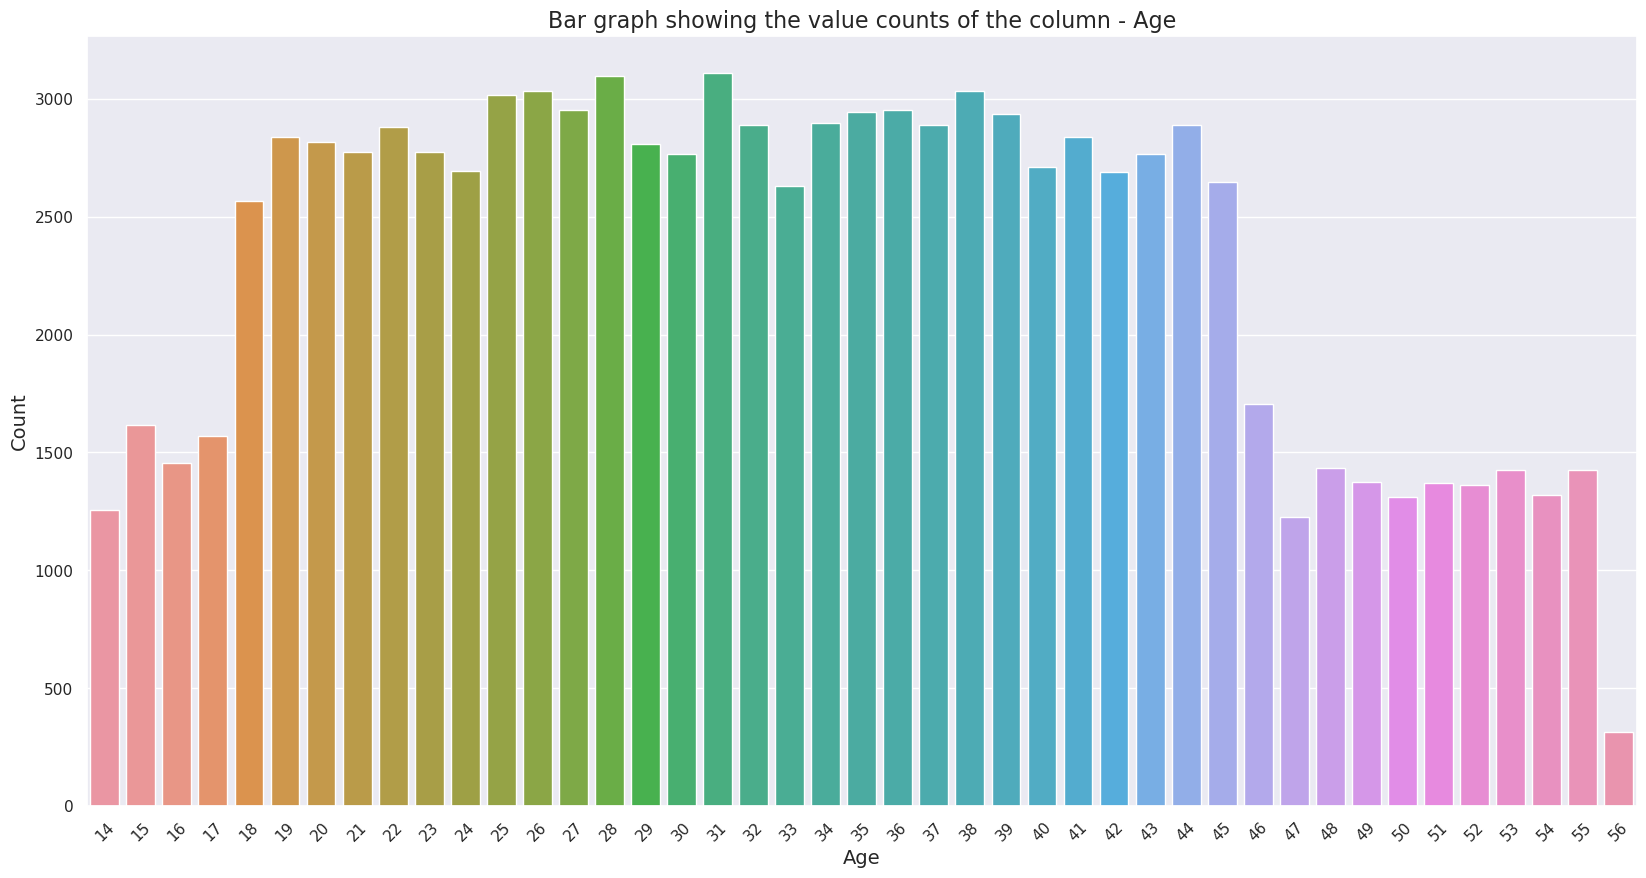

In [32]:
age_count = train_data['Age'].value_counts(dropna = False)
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=age_count.index, y=age_count.values)
plt.title('Bar graph showing the value counts of the column - Age', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.xticks(rotation=45)
plt.show()

По данному графику можно определить, что большинство клиентов находятся в возрастном диапазоне от 18 до 45 лет.

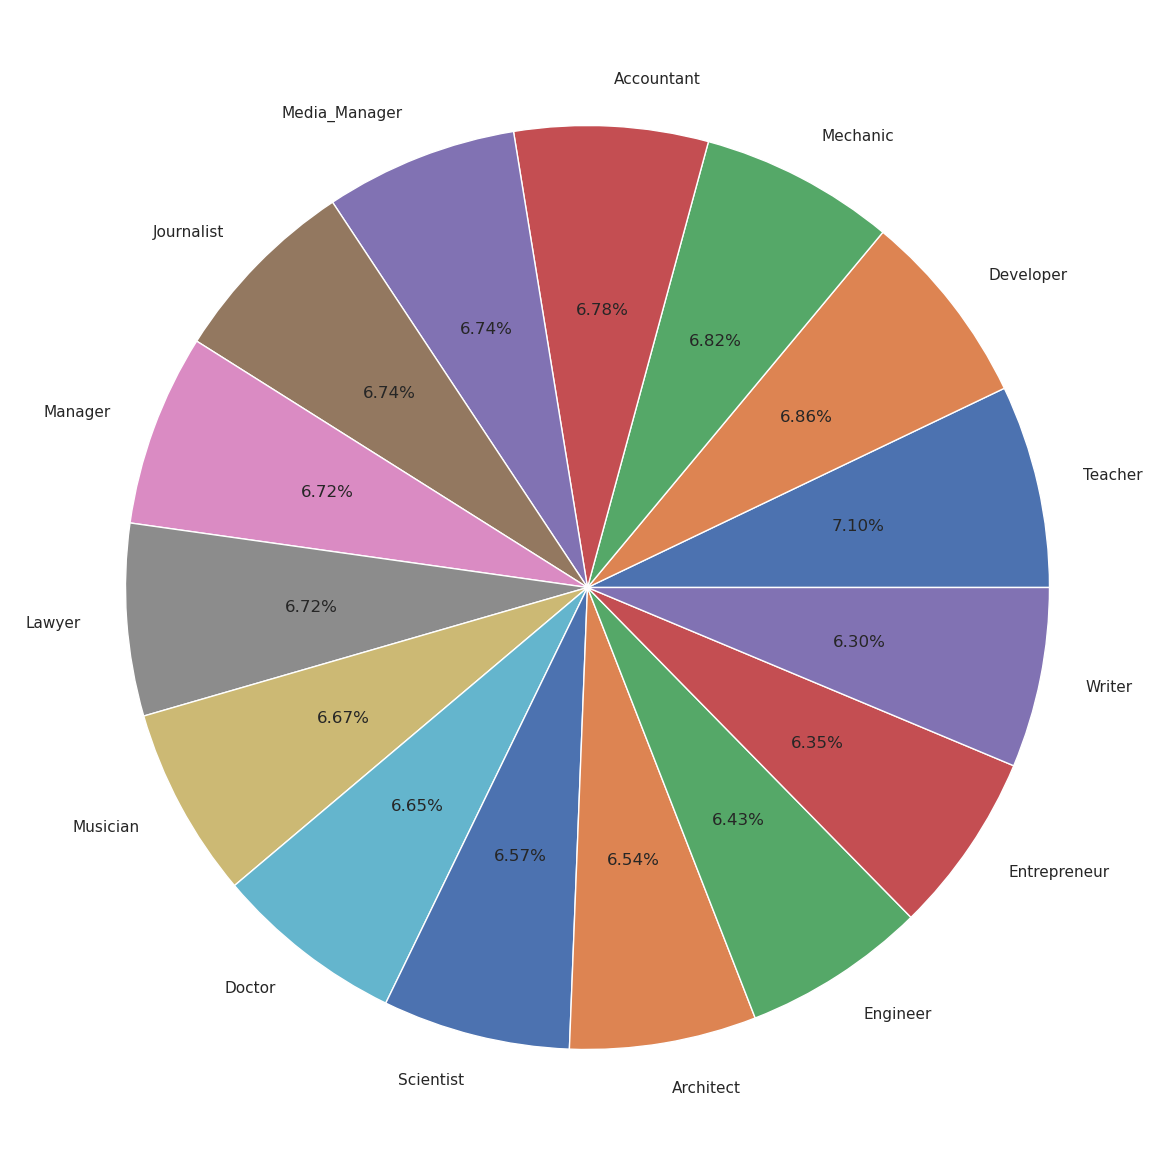

In [33]:
Occupation = train_data['Occupation'].value_counts().tolist()
labels = train_data['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (15,15))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')
plt.show()

По данному же графику делаю вывод, клиенты достаточно равномерно распределены по всем профессиям.

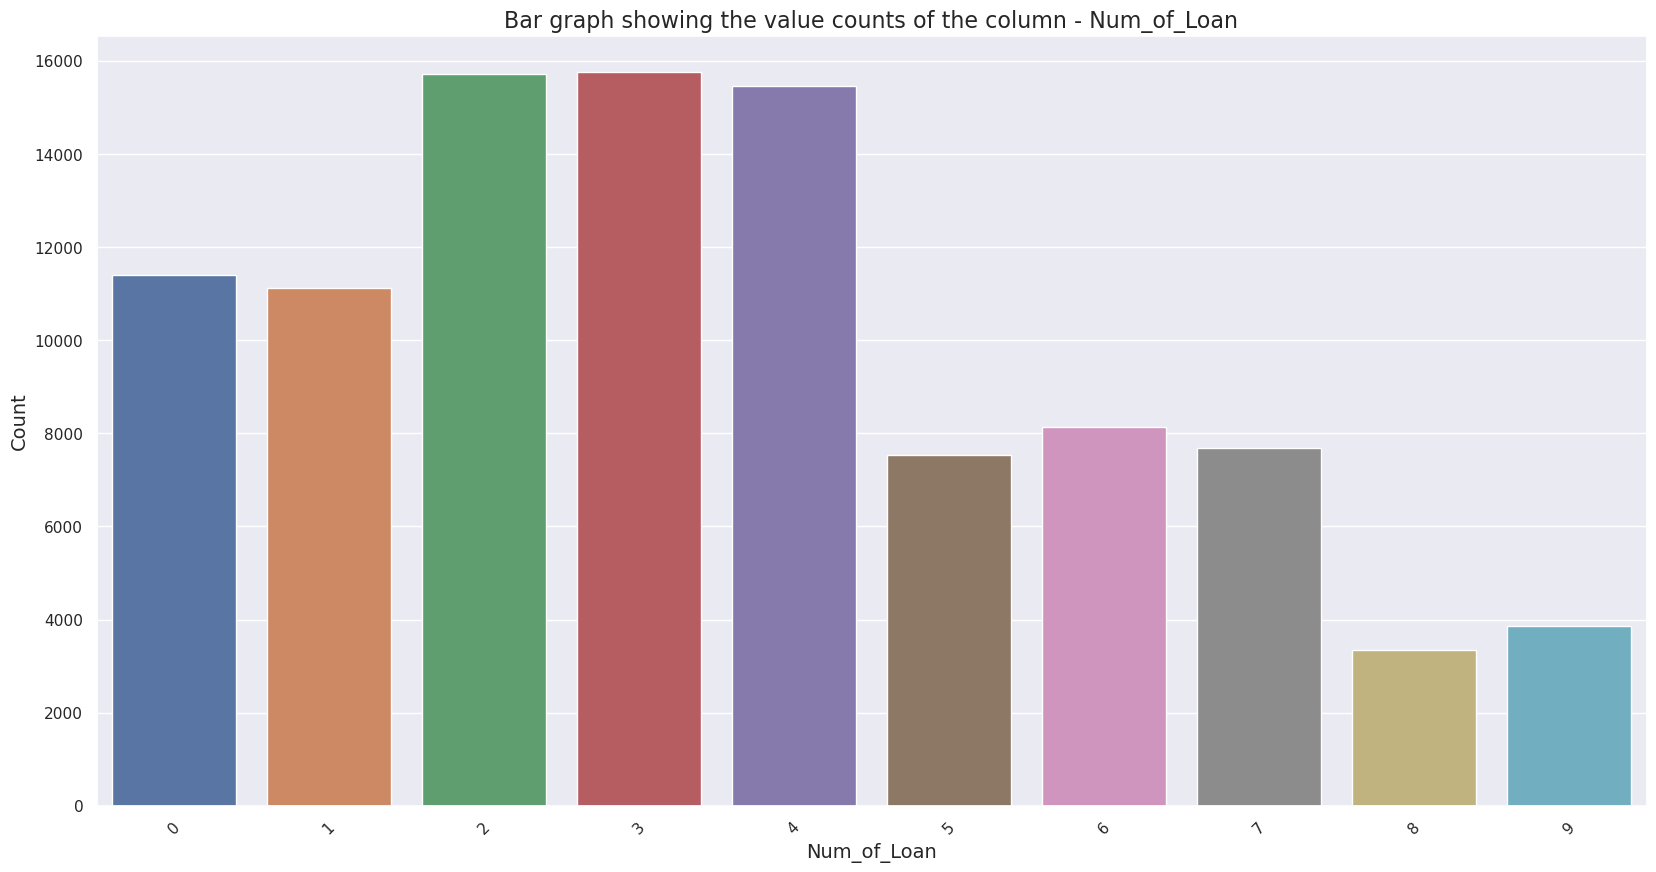

In [34]:
num_of_loan_count = train_data['Num_of_Loan'].value_counts(dropna = False)
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=num_of_loan_count.index, y=num_of_loan_count.values)
plt.title('Bar graph showing the value counts of the column - Num_of_Loan', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Num_of_Loan', fontsize=14)
plt.xticks(rotation=45)
plt.show()

График распределения количества займов говорит о том, что большинство клиентов берут от 2 до 4 займов.

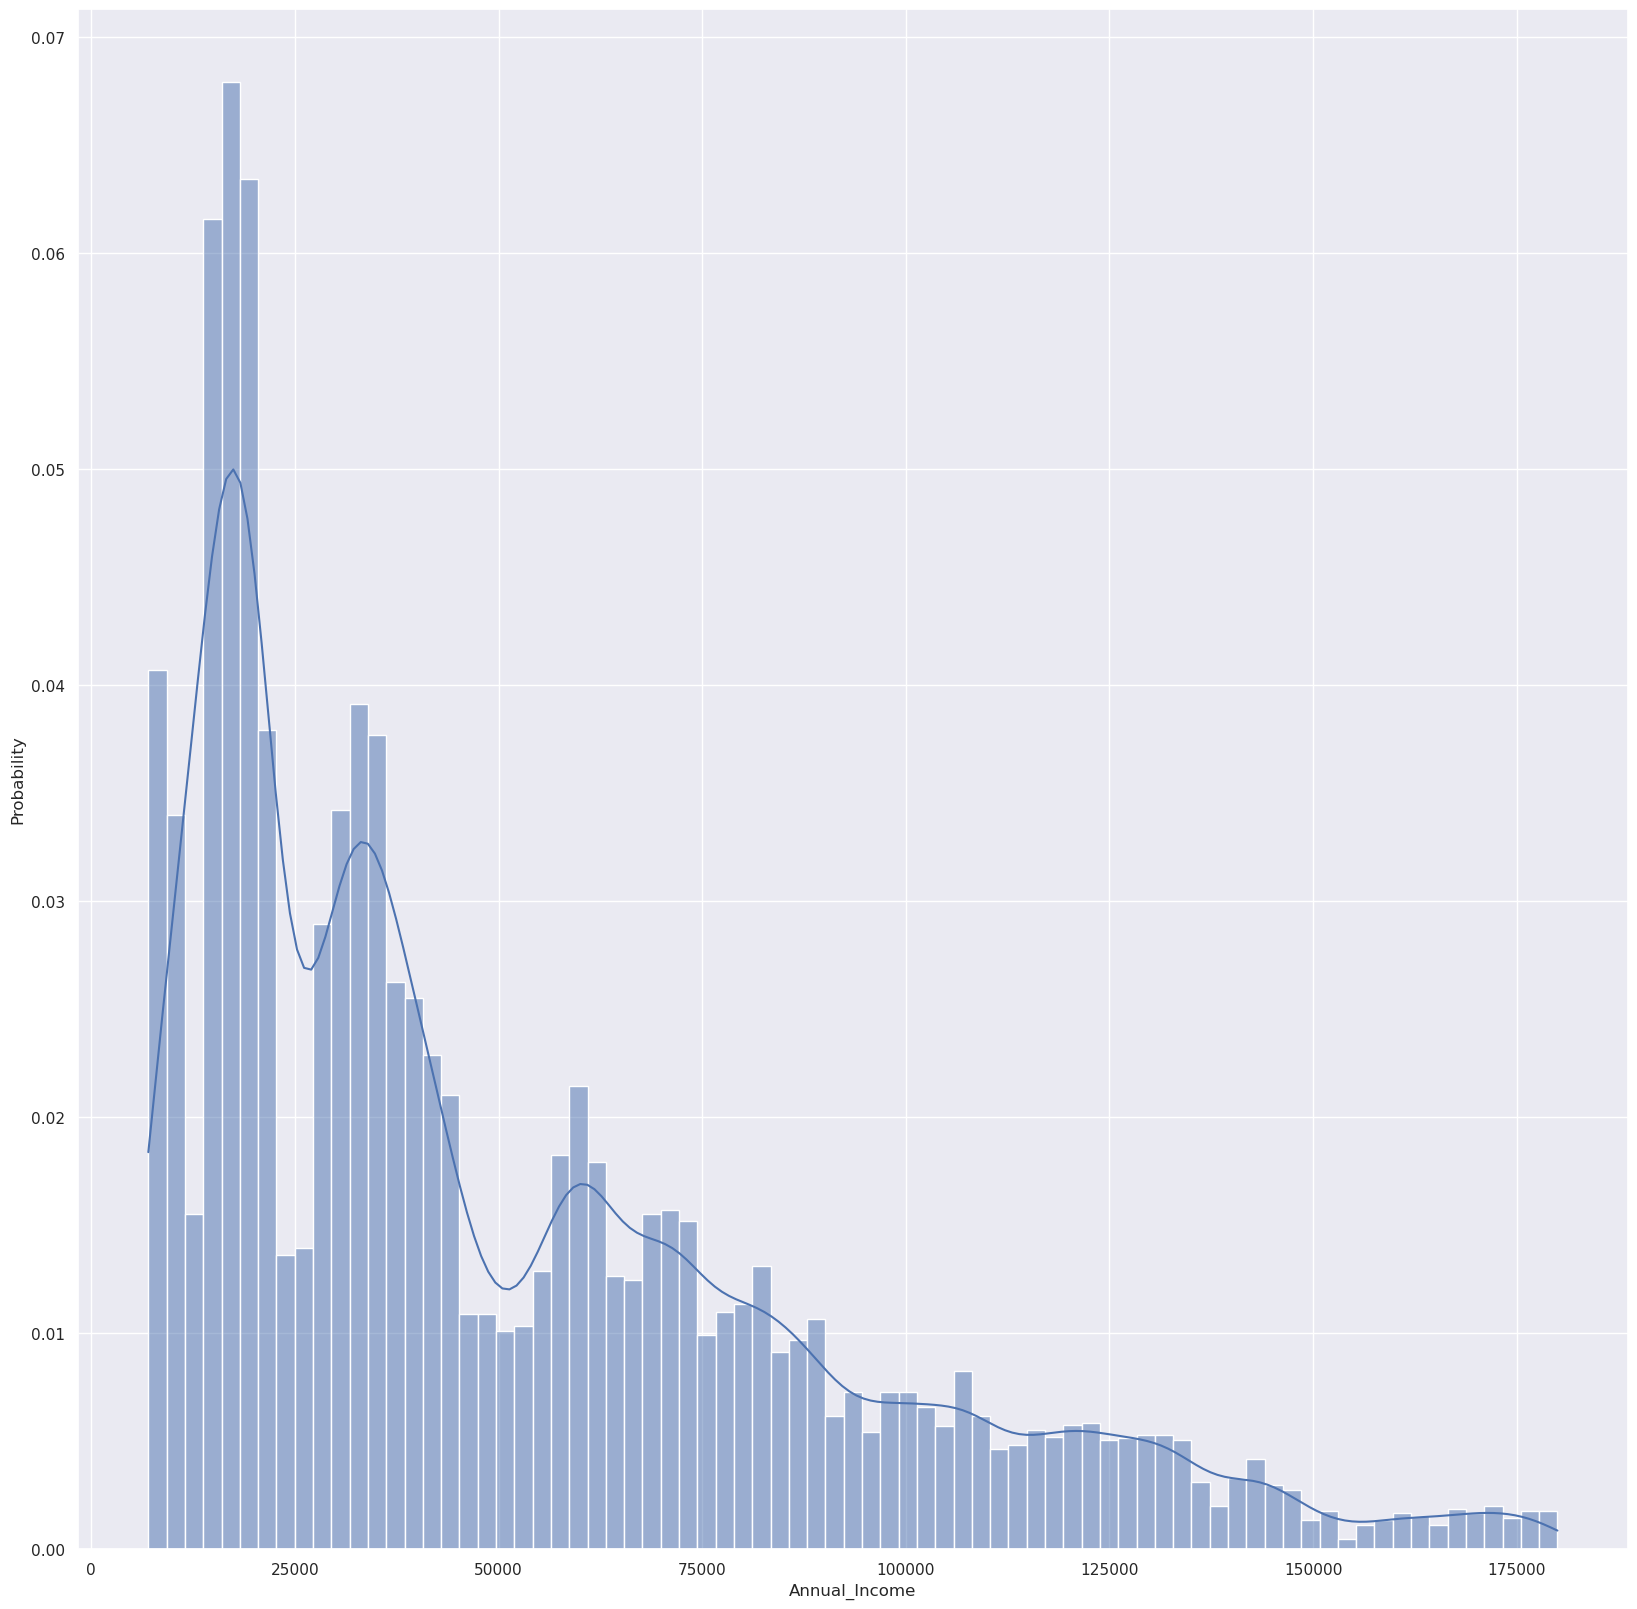

In [35]:
plt.figure(figsize = (20,20))
sns.histplot(data = train_data, x = 'Annual_Income', kde = True, stat = 'probability')
plt.show()

Распределение годового дохода не похоже на нормальное распределение, данную информацию буду использовать, когда буду обрабатывать данные для загрузки в модель.
Также распределение является экспоненциальным и тримодальным, пик приходится примерно на 25000, а также на 30000 и 60000.

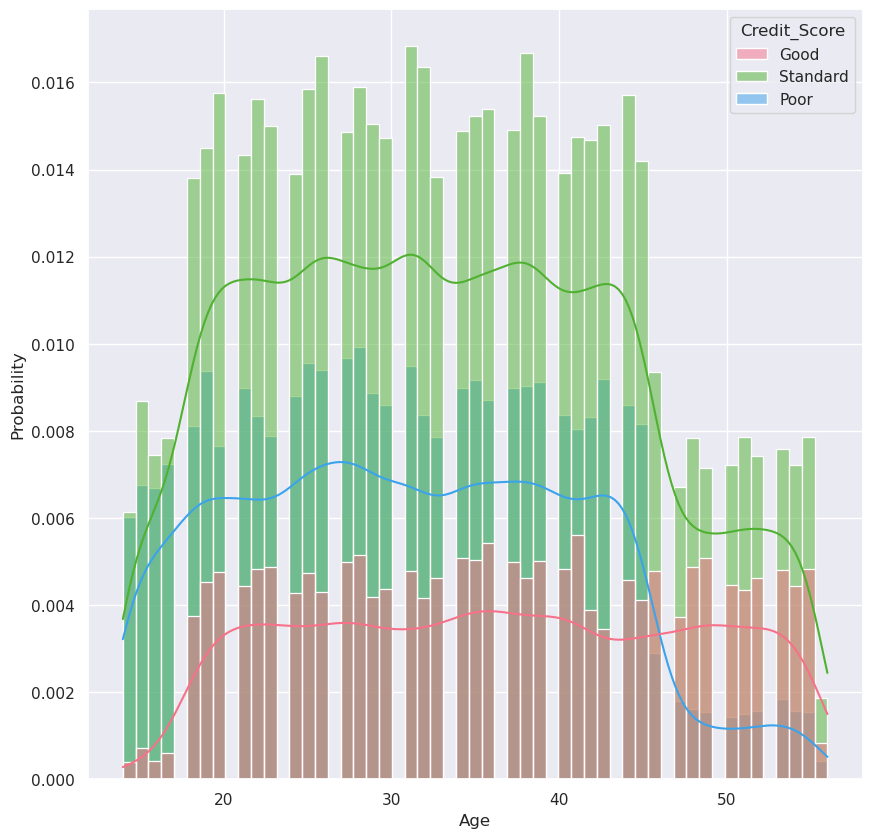

In [36]:
plt.figure(figsize = (10,10))
sns.histplot(data = train_data, x = 'Age', hue = 'Credit_Score', kde = True, stat = 'probability', palette = 'husl')
plt.show()

По данному графику делаем вывод, что клиенты с плохим кредитным рейтингом в основном молодого или среднего возраста, а большинство же клиентов имеют стандартный кредитный рейтинг.

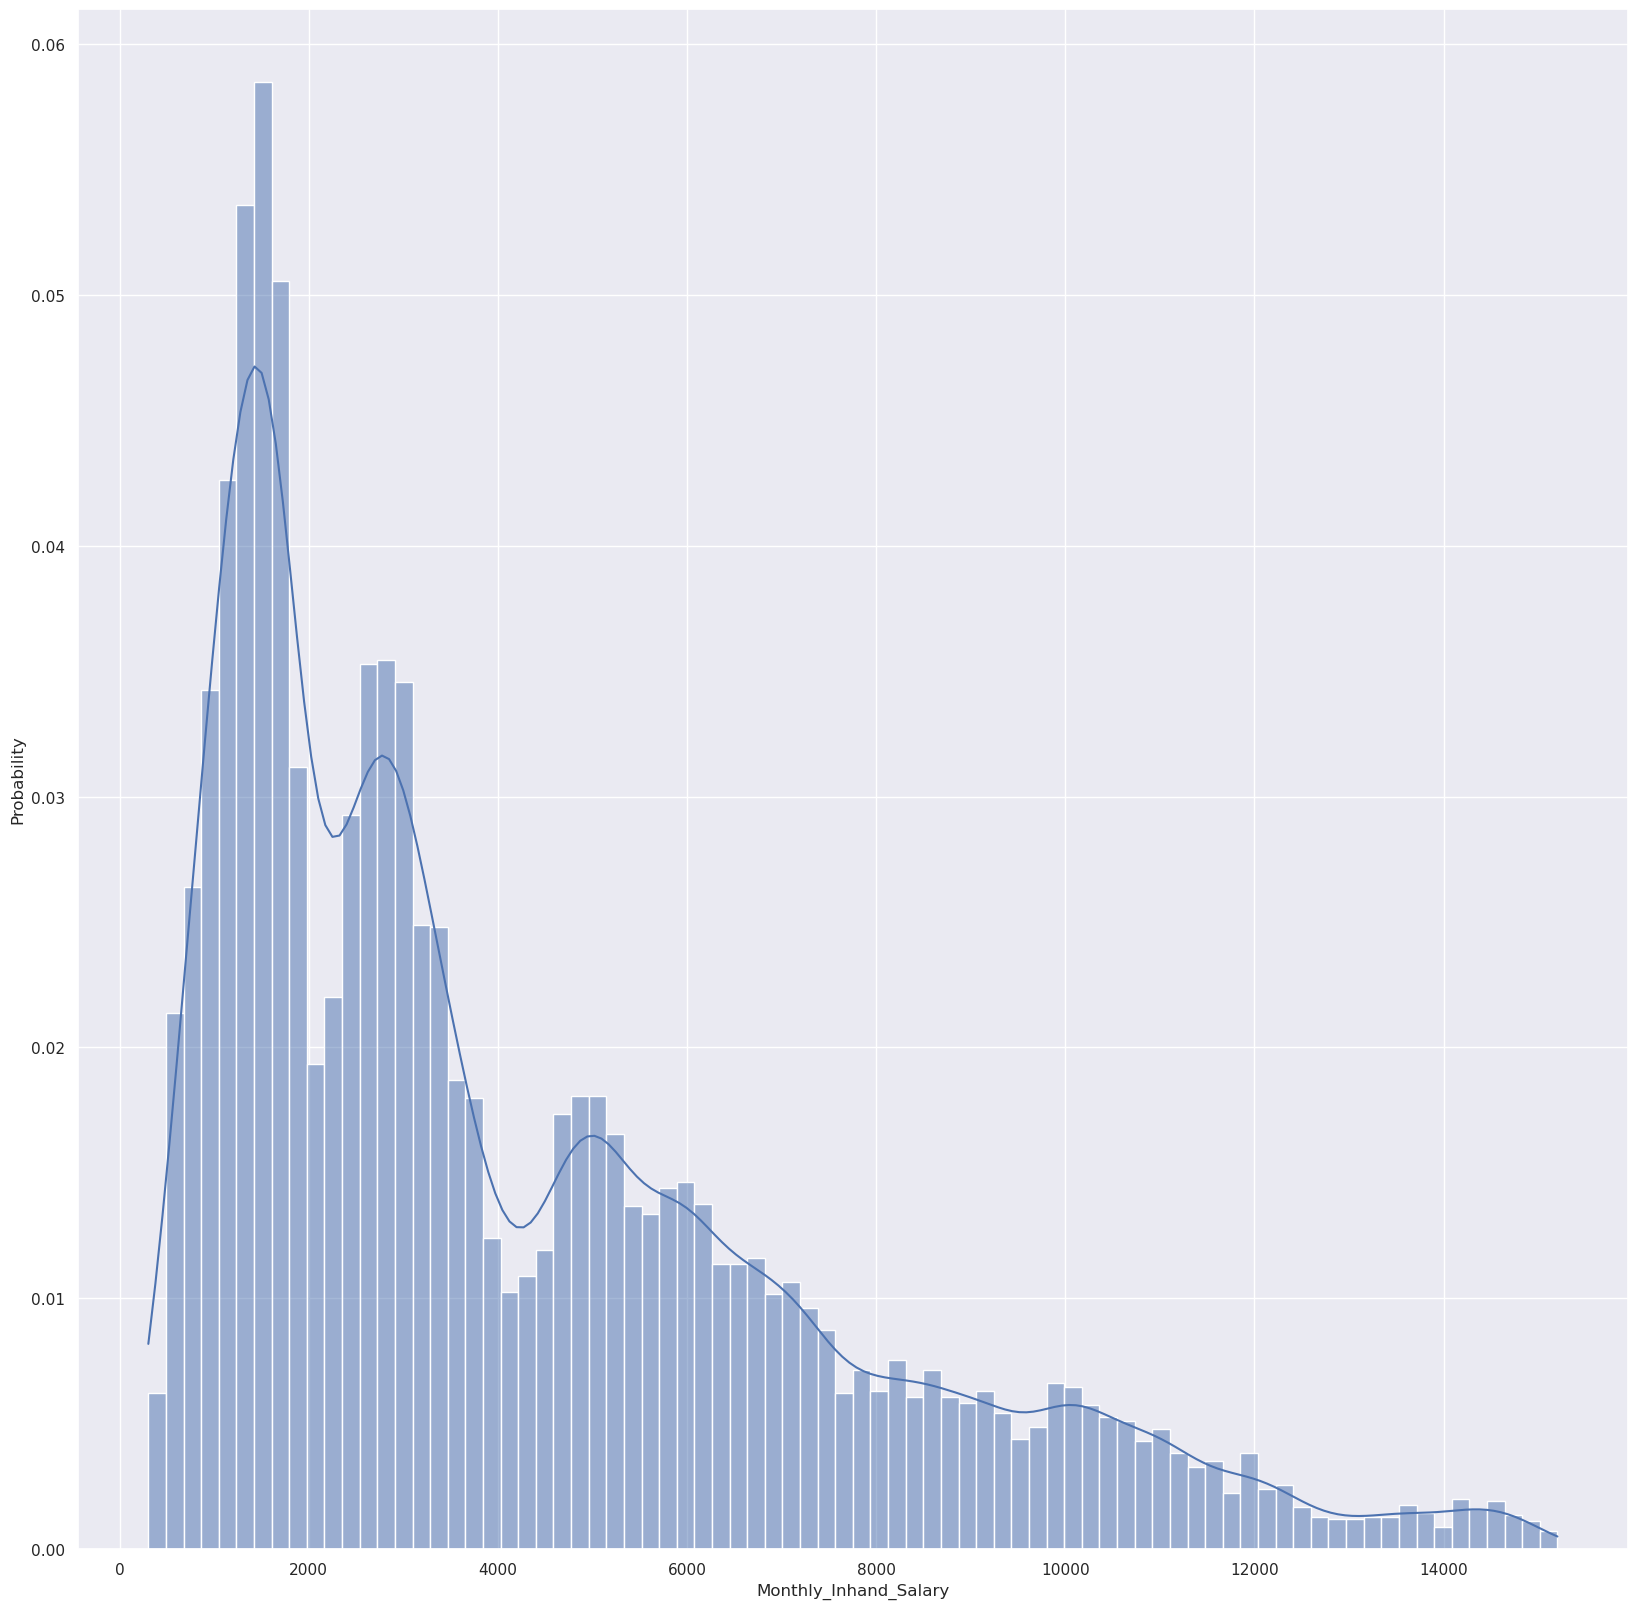

In [37]:
plt.figure(figsize = (20,20))
sns.histplot(data = train_data, x = 'Monthly_Inhand_Salary', kde = True, stat = 'probability')
plt.show()

По данному графику делаем вывод, что данные распределены не нормально.

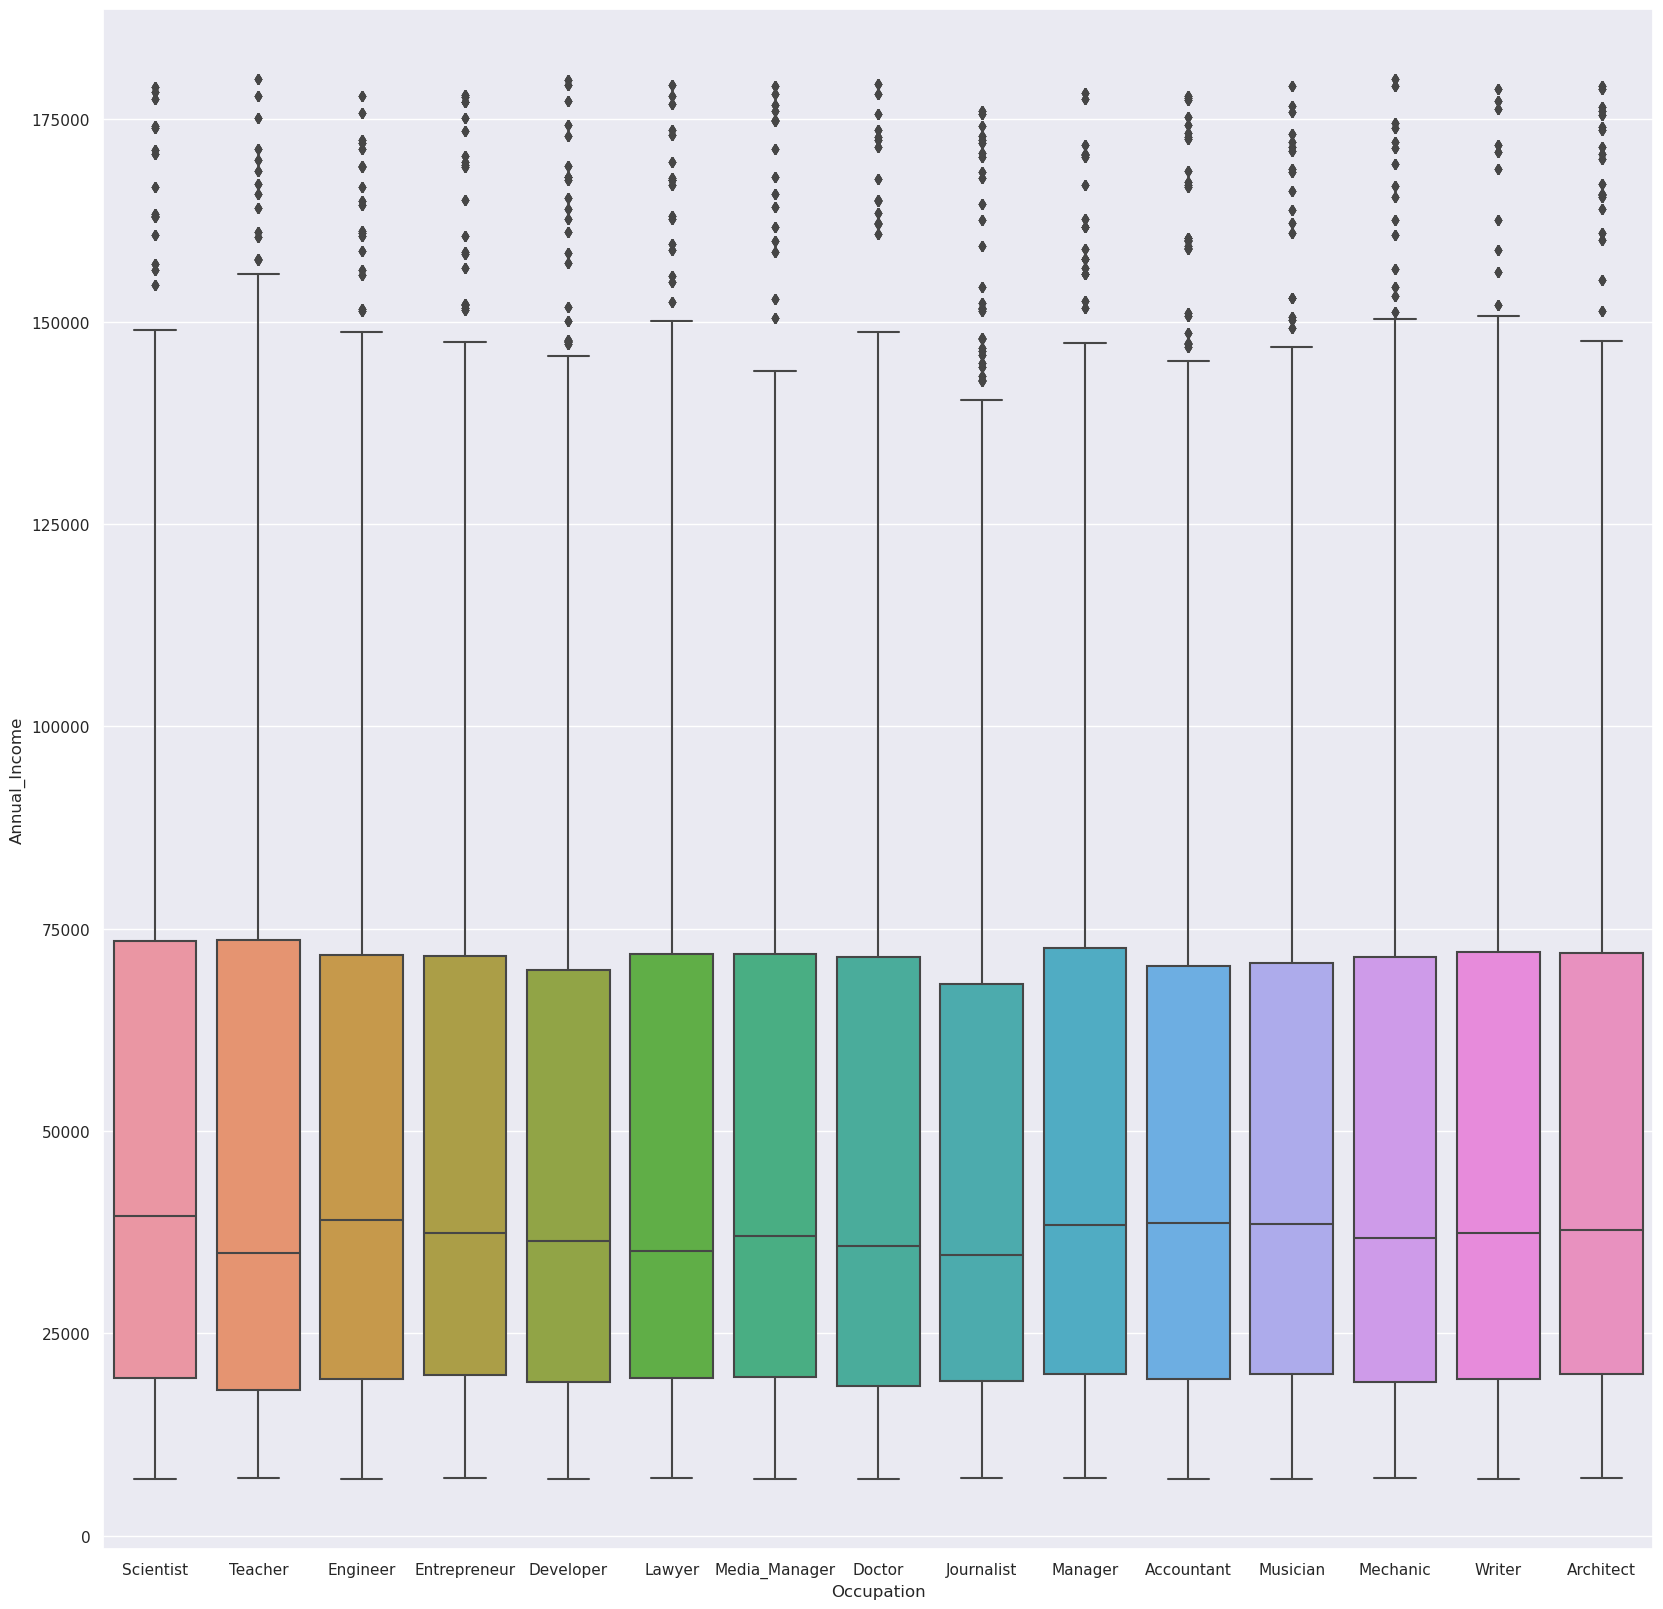

In [38]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Occupation', y = 'Annual_Income')
plt.show()

По данной диаграмме можно видеть, что годовой доход для разных родов деятельности не сильно различается.

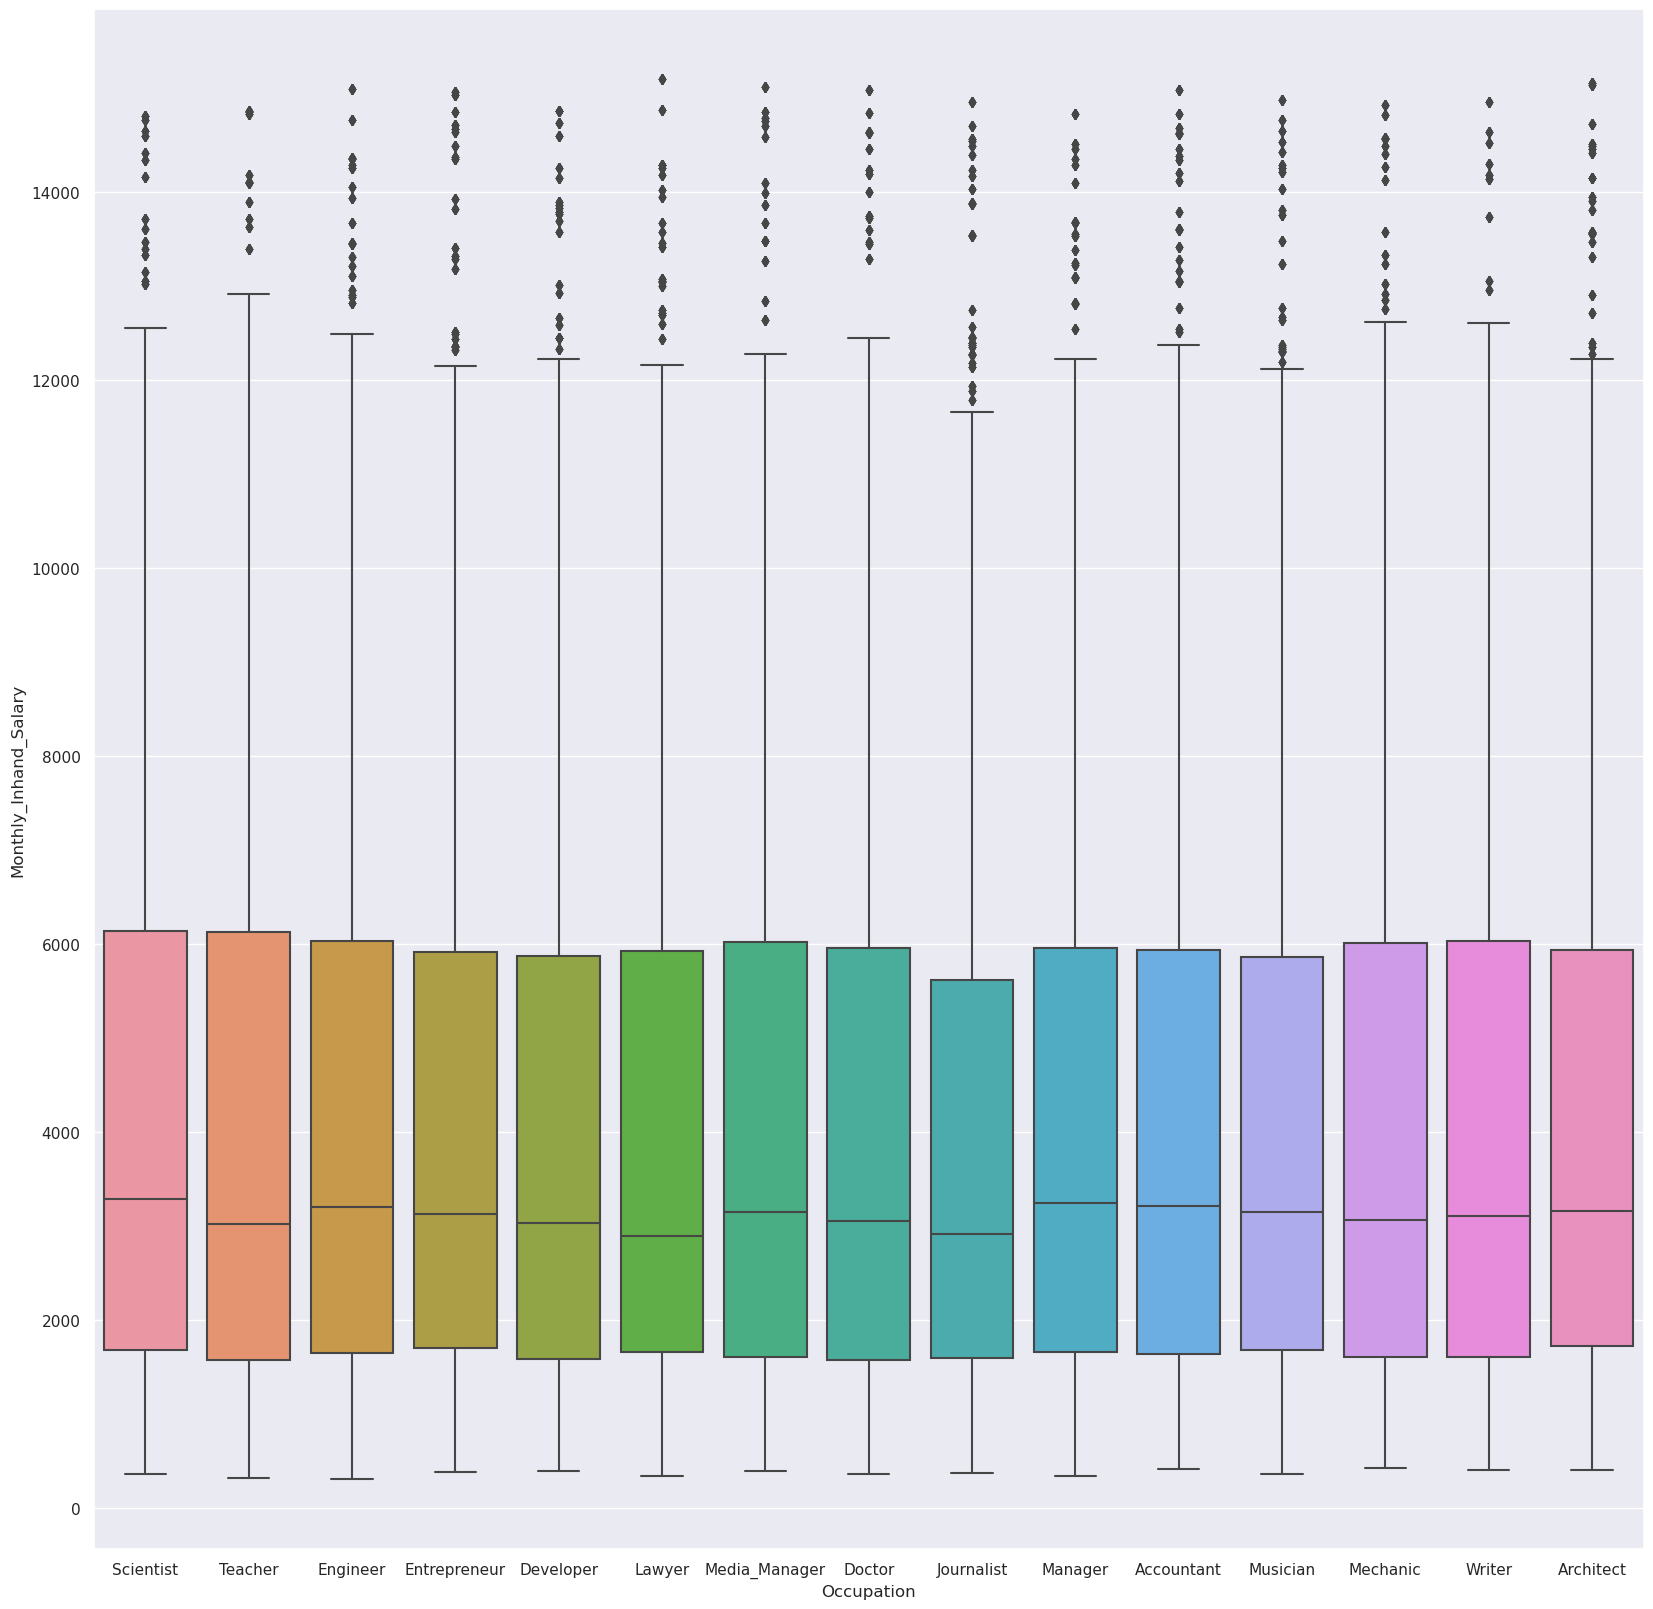

In [39]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Occupation', y = 'Monthly_Inhand_Salary')
plt.show()

Месячная заработная плата также не сильно различается для разных родов деятельности.

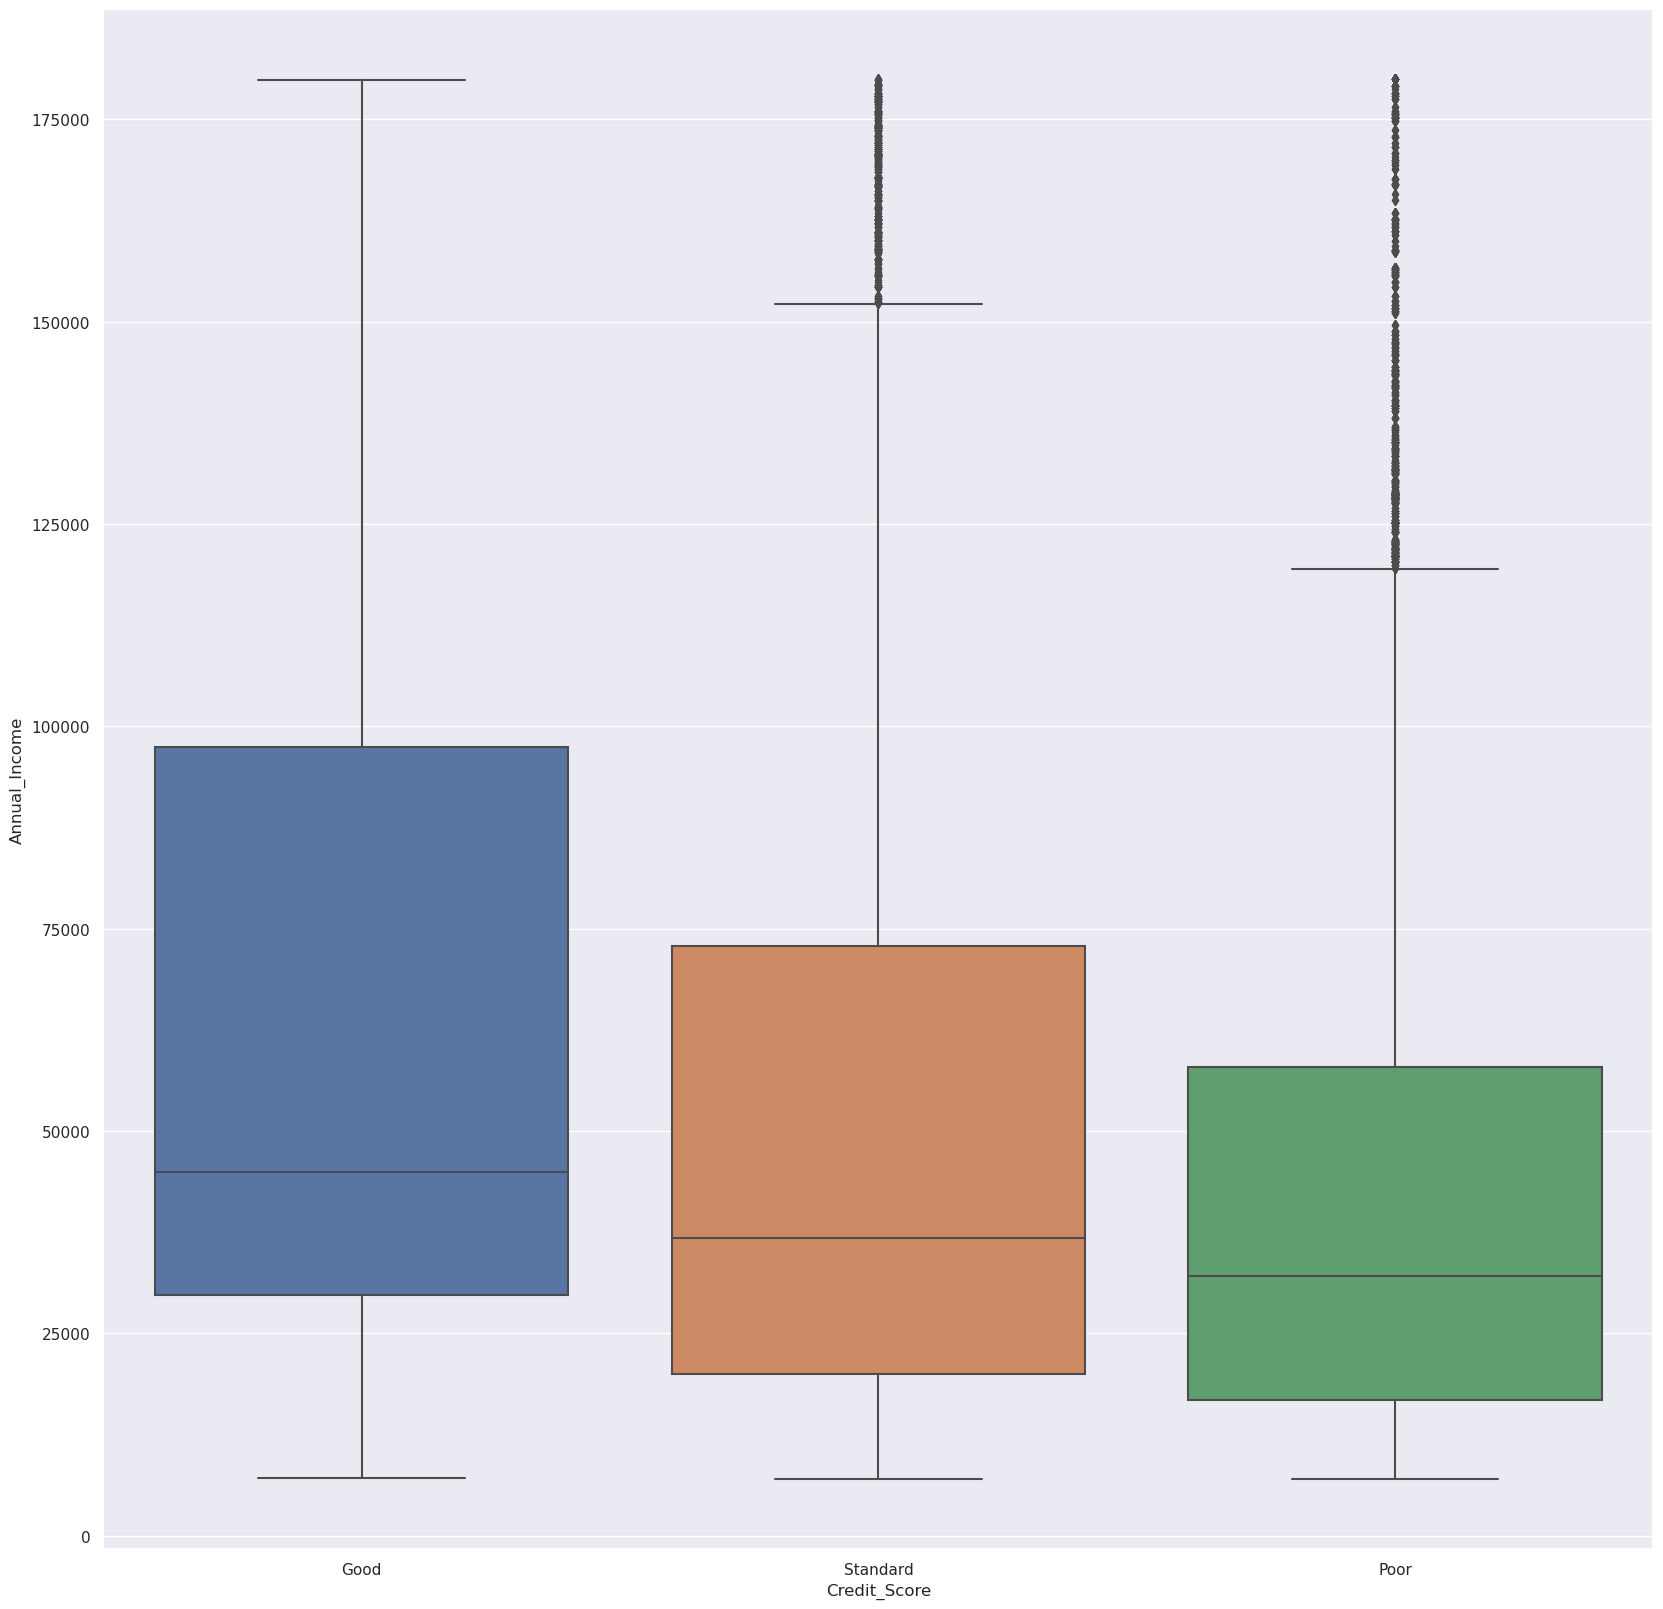

In [40]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Annual_Income')
plt.show()

По данному графику можно сделать достаточно очевидный вывод: чем больше годовой доход, тем лучше кредитный рейтинг.

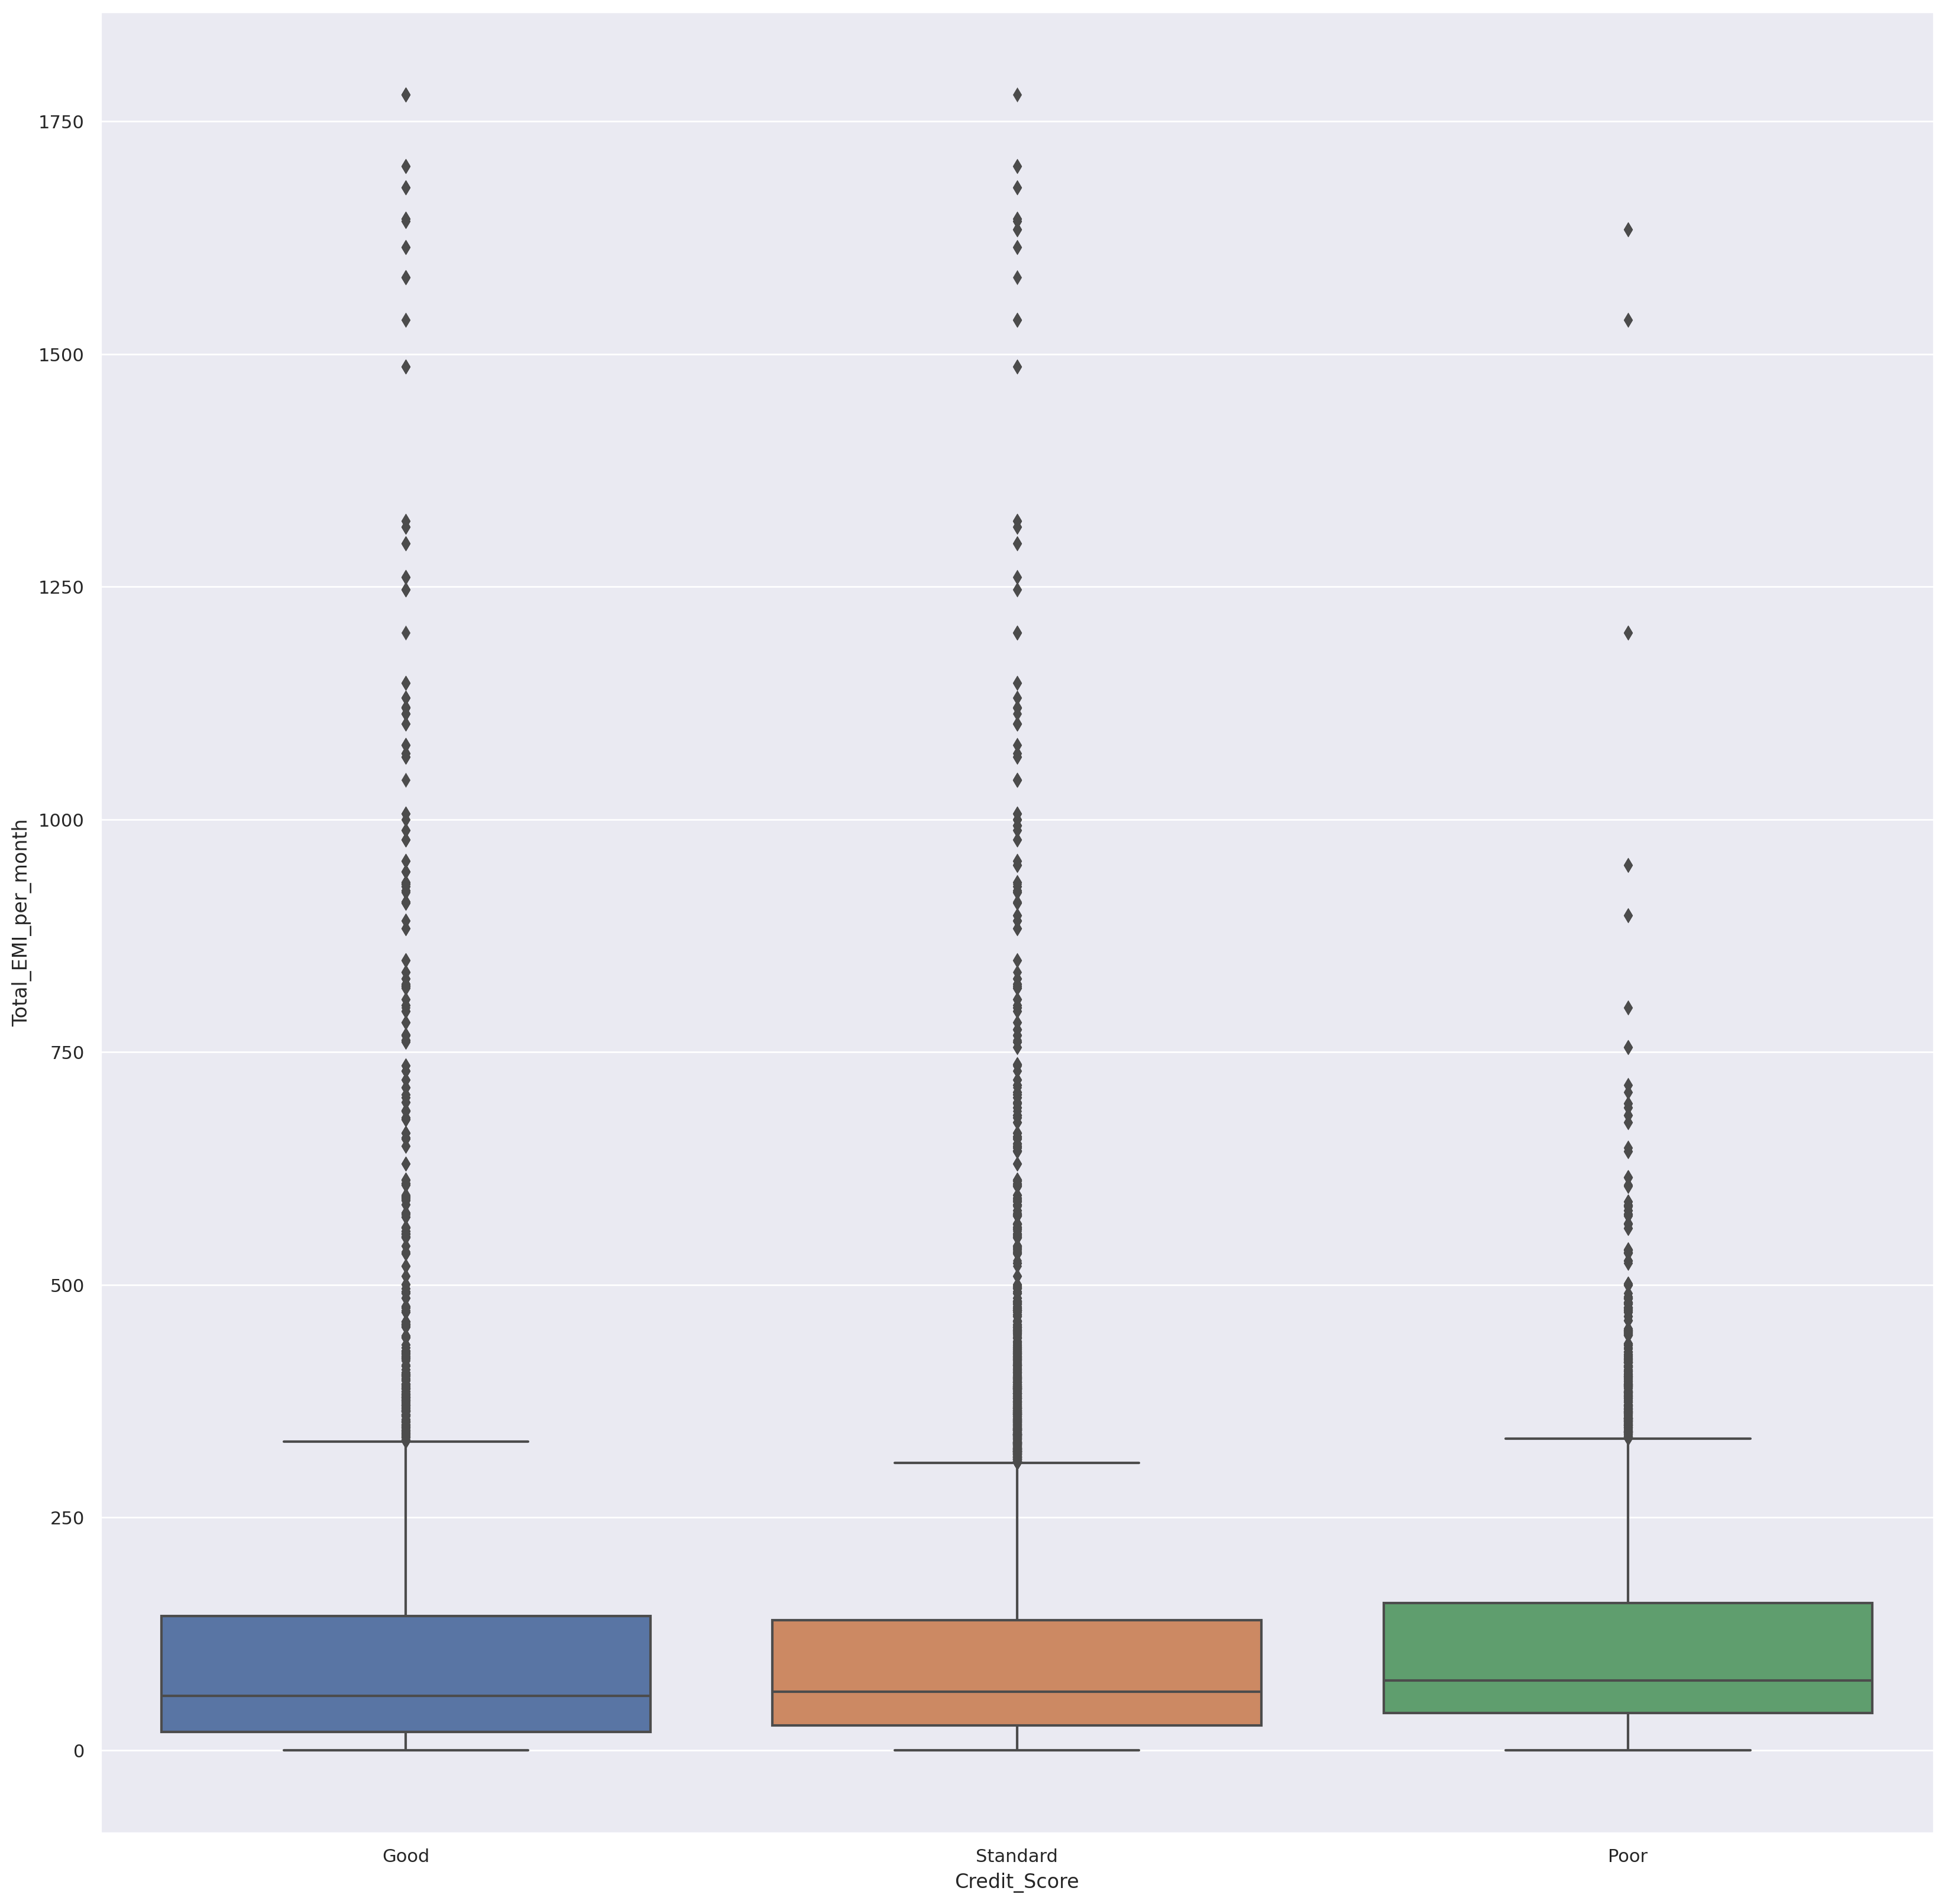

In [41]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Total_EMI_per_month')
plt.show()

Таким образом, общий EMI в месяц не влияет на кредитный рейтинг.

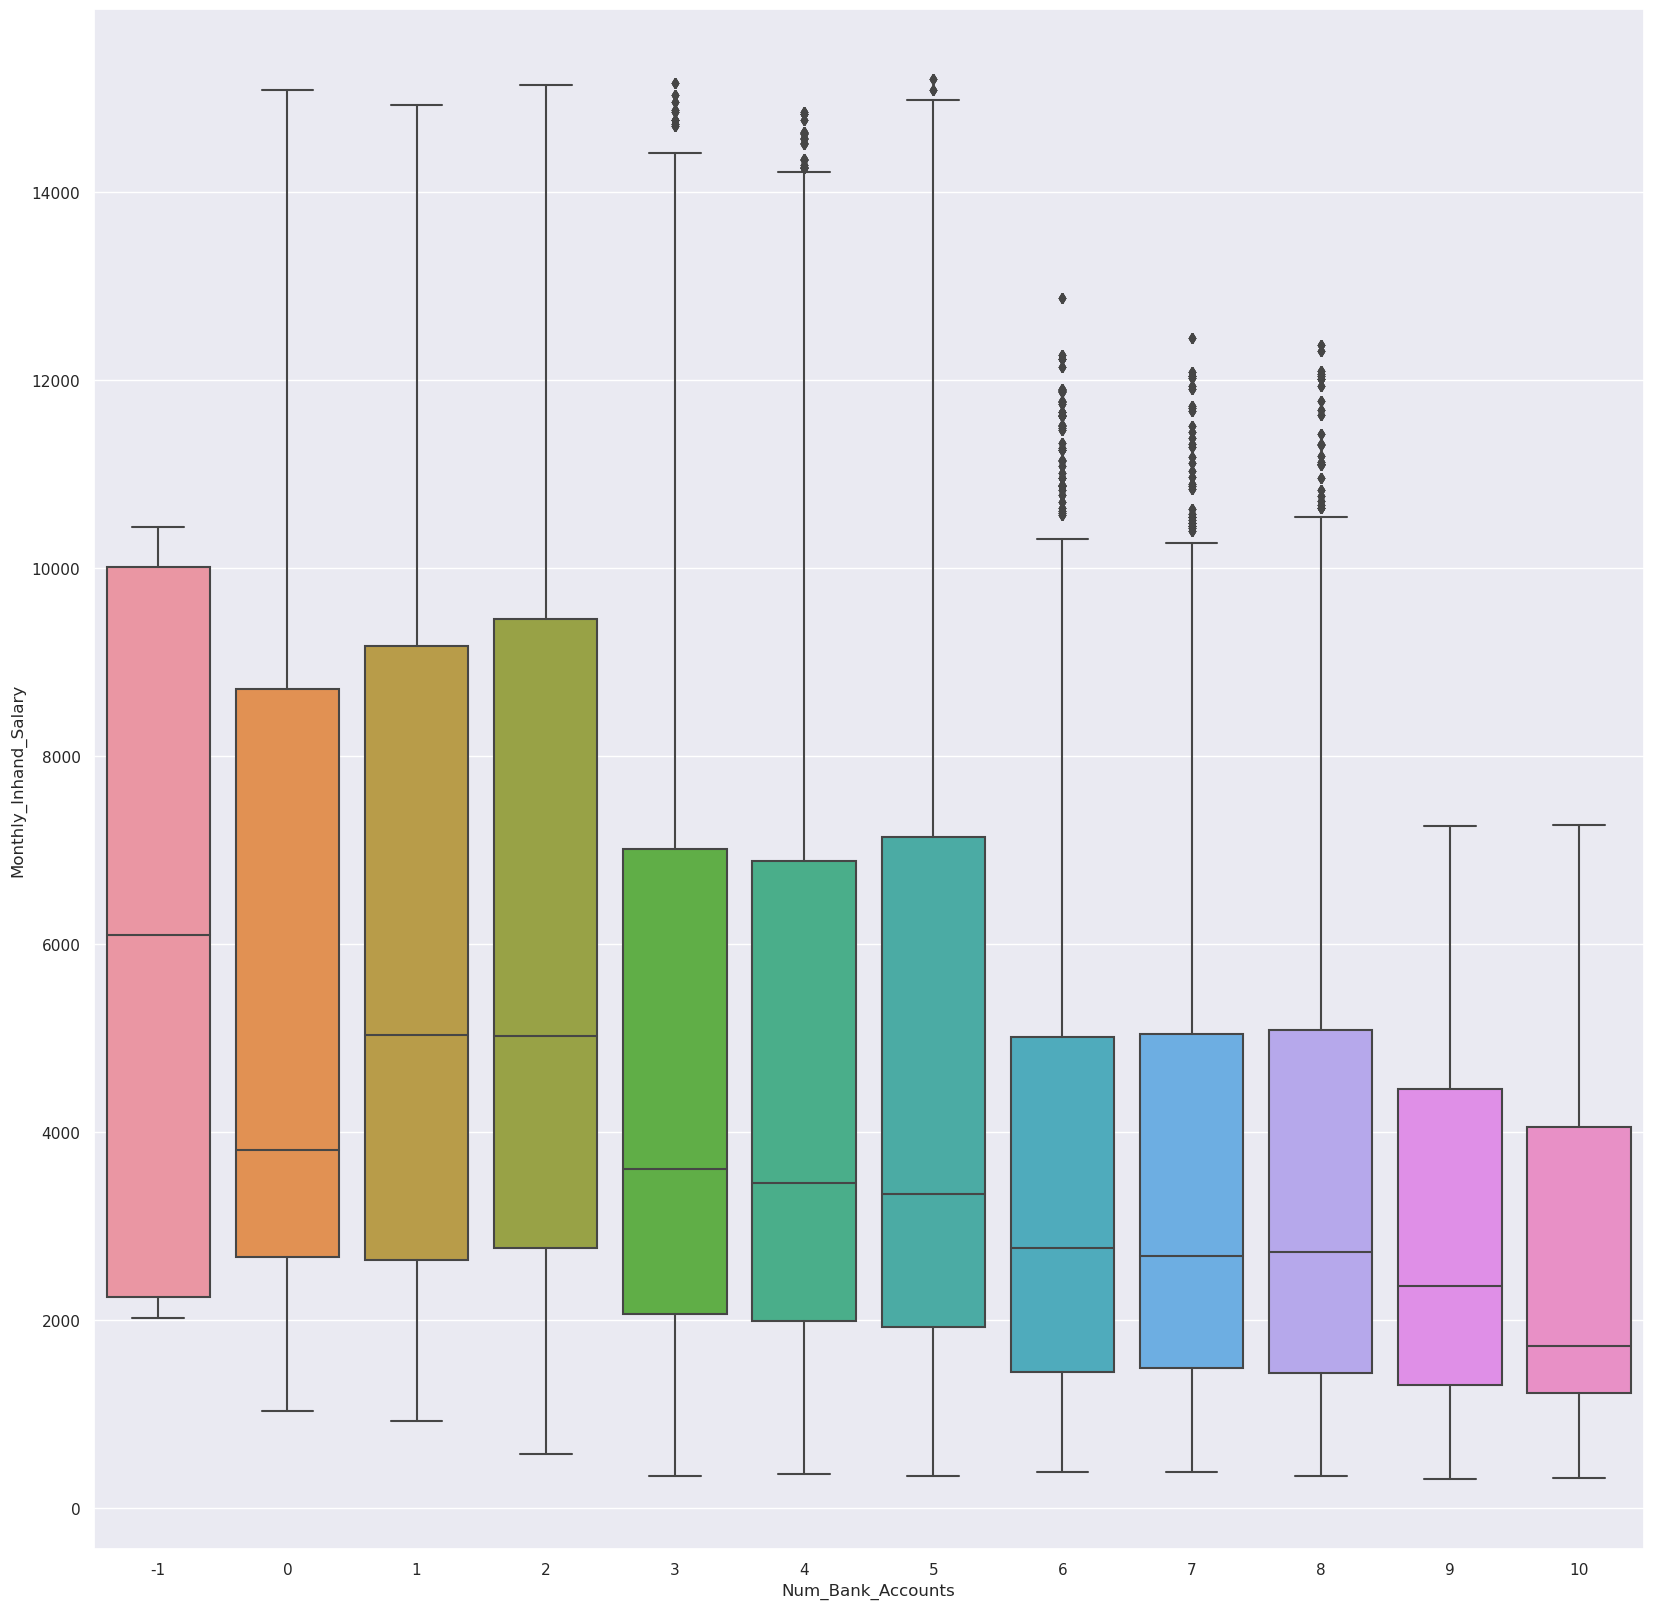

In [42]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train_data, x = 'Num_Bank_Accounts', y = 'Monthly_Inhand_Salary')
plt.show()

А вот по данной диаграмме видно, что чем меньше месячная заработная плата, тем больше число банковских аккаунтов.

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='count'>

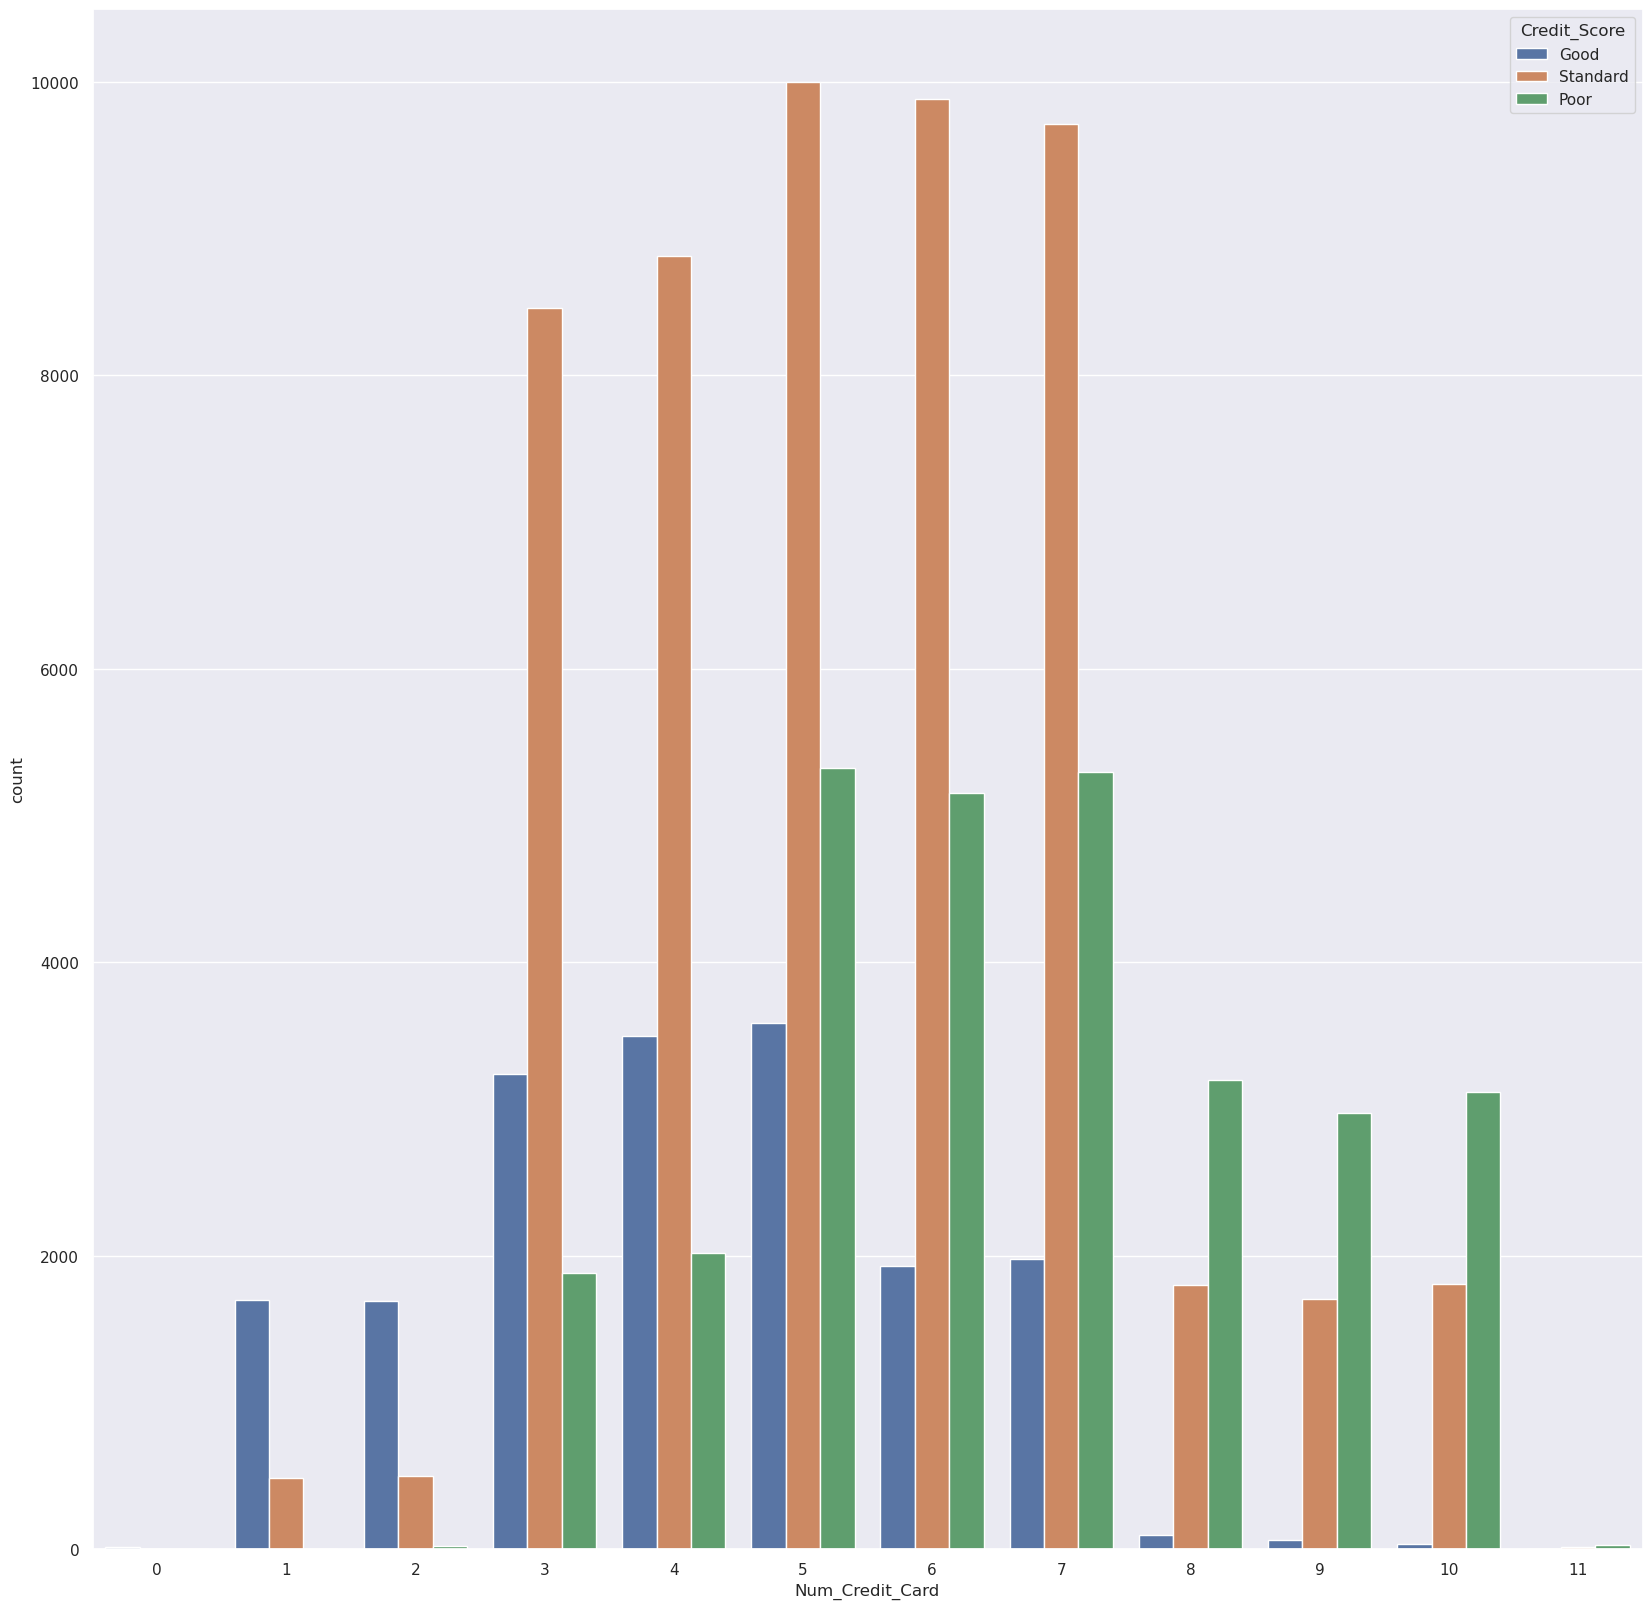

In [43]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_Credit_Card', hue = 'Credit_Score')

По данной диаграмме видно, что клиенты с плохим кредитным рейтингом имеют кредитных карт больше, чем клиенты с хорошим и стандартными кредитными рейтингами.

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='count'>

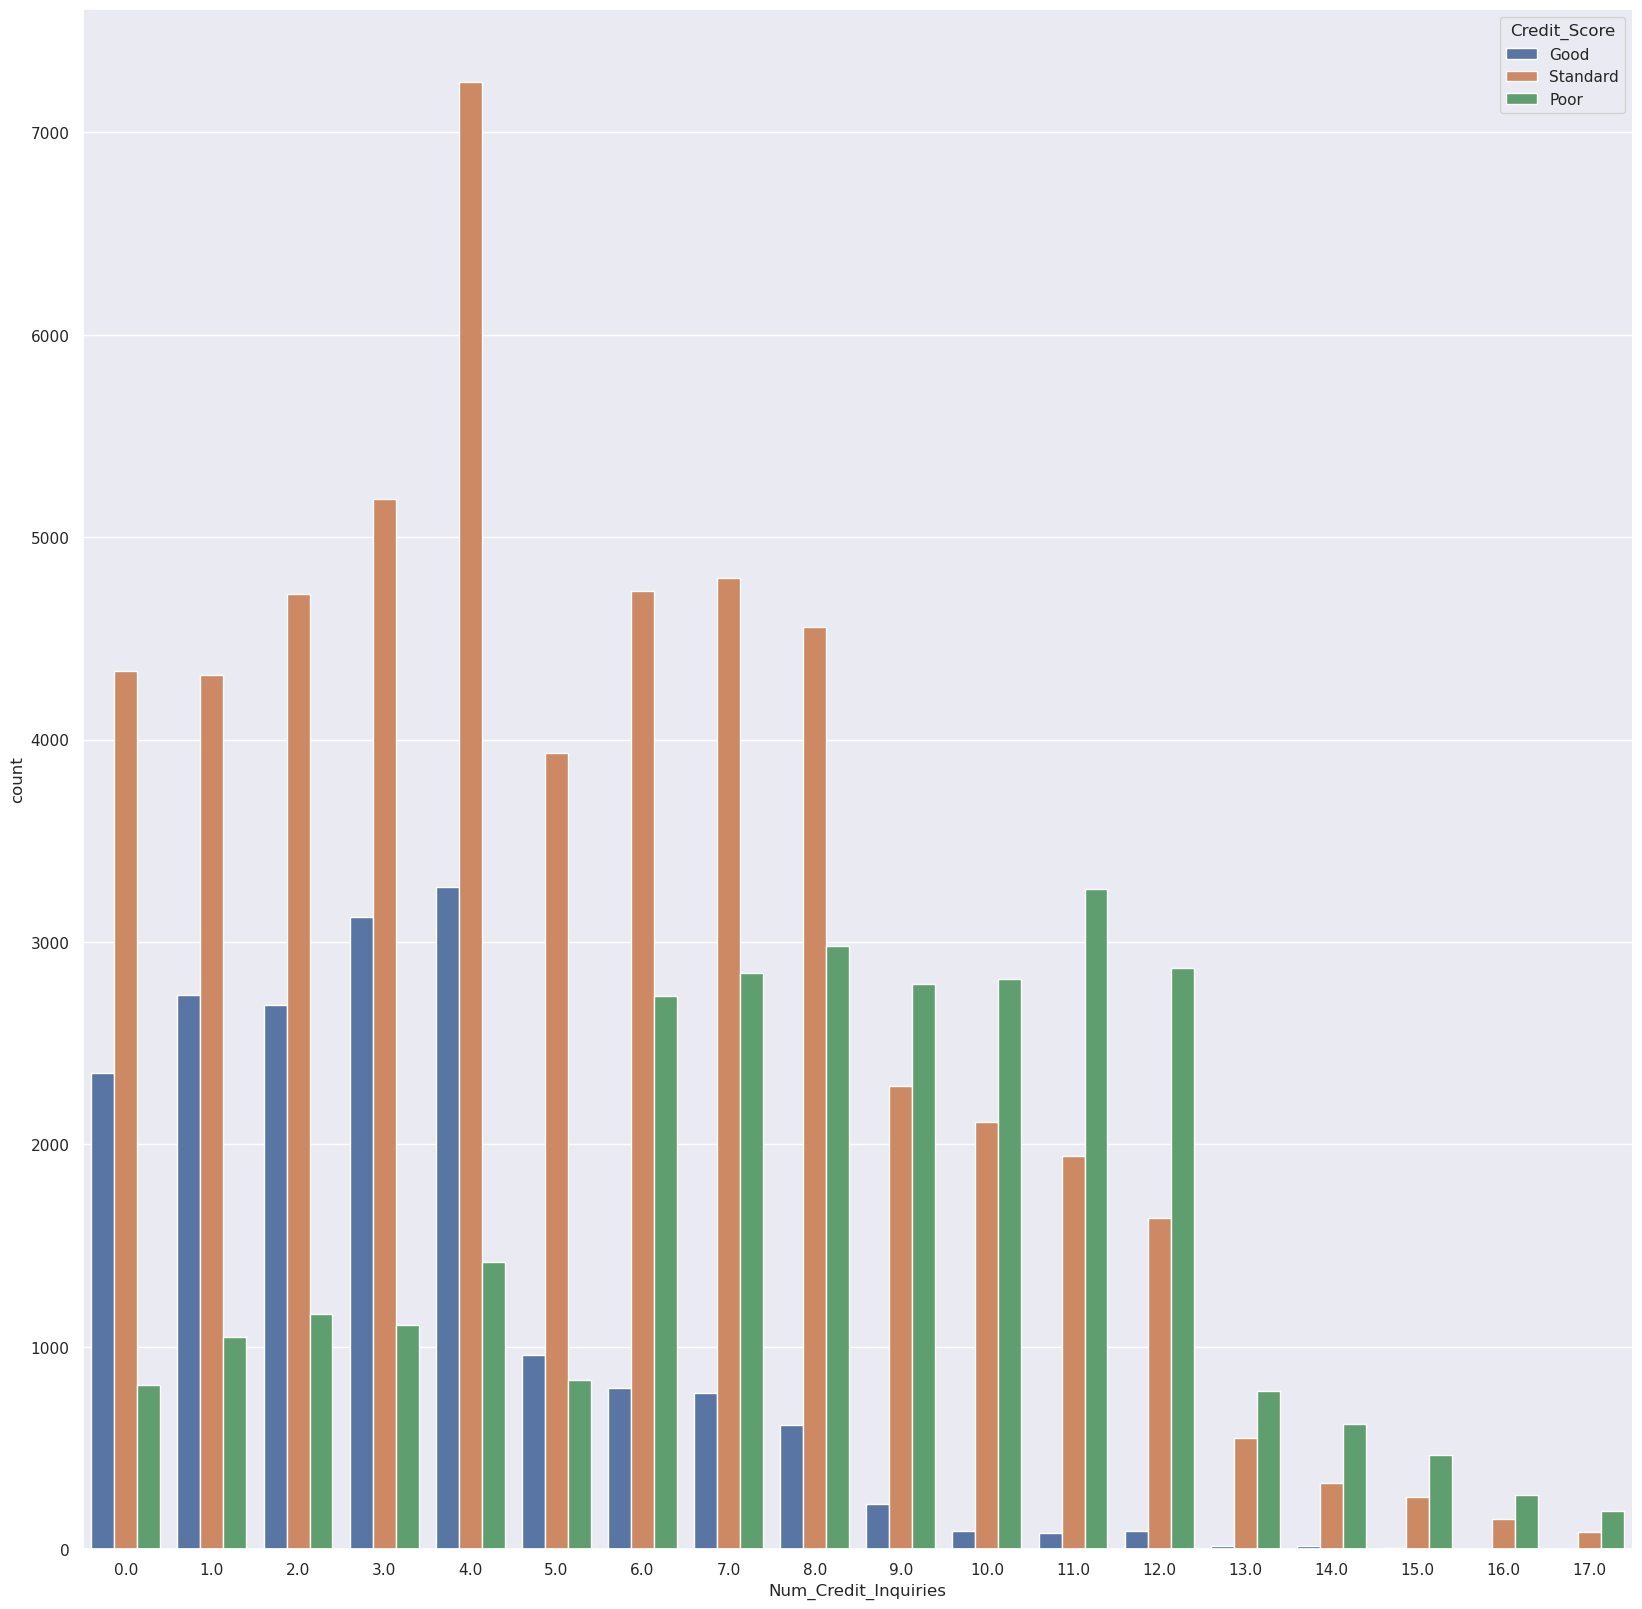

In [44]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_Credit_Inquiries', hue = 'Credit_Score')

По данному графику понятно, что клиенты с плохим кредитным рейтингом имееют больше запросов на кредитные карты по сравнению с клиентами с хорошим и стандартным кредитными рейтингами.

<AxesSubplot:xlabel='Num_of_Loan', ylabel='count'>

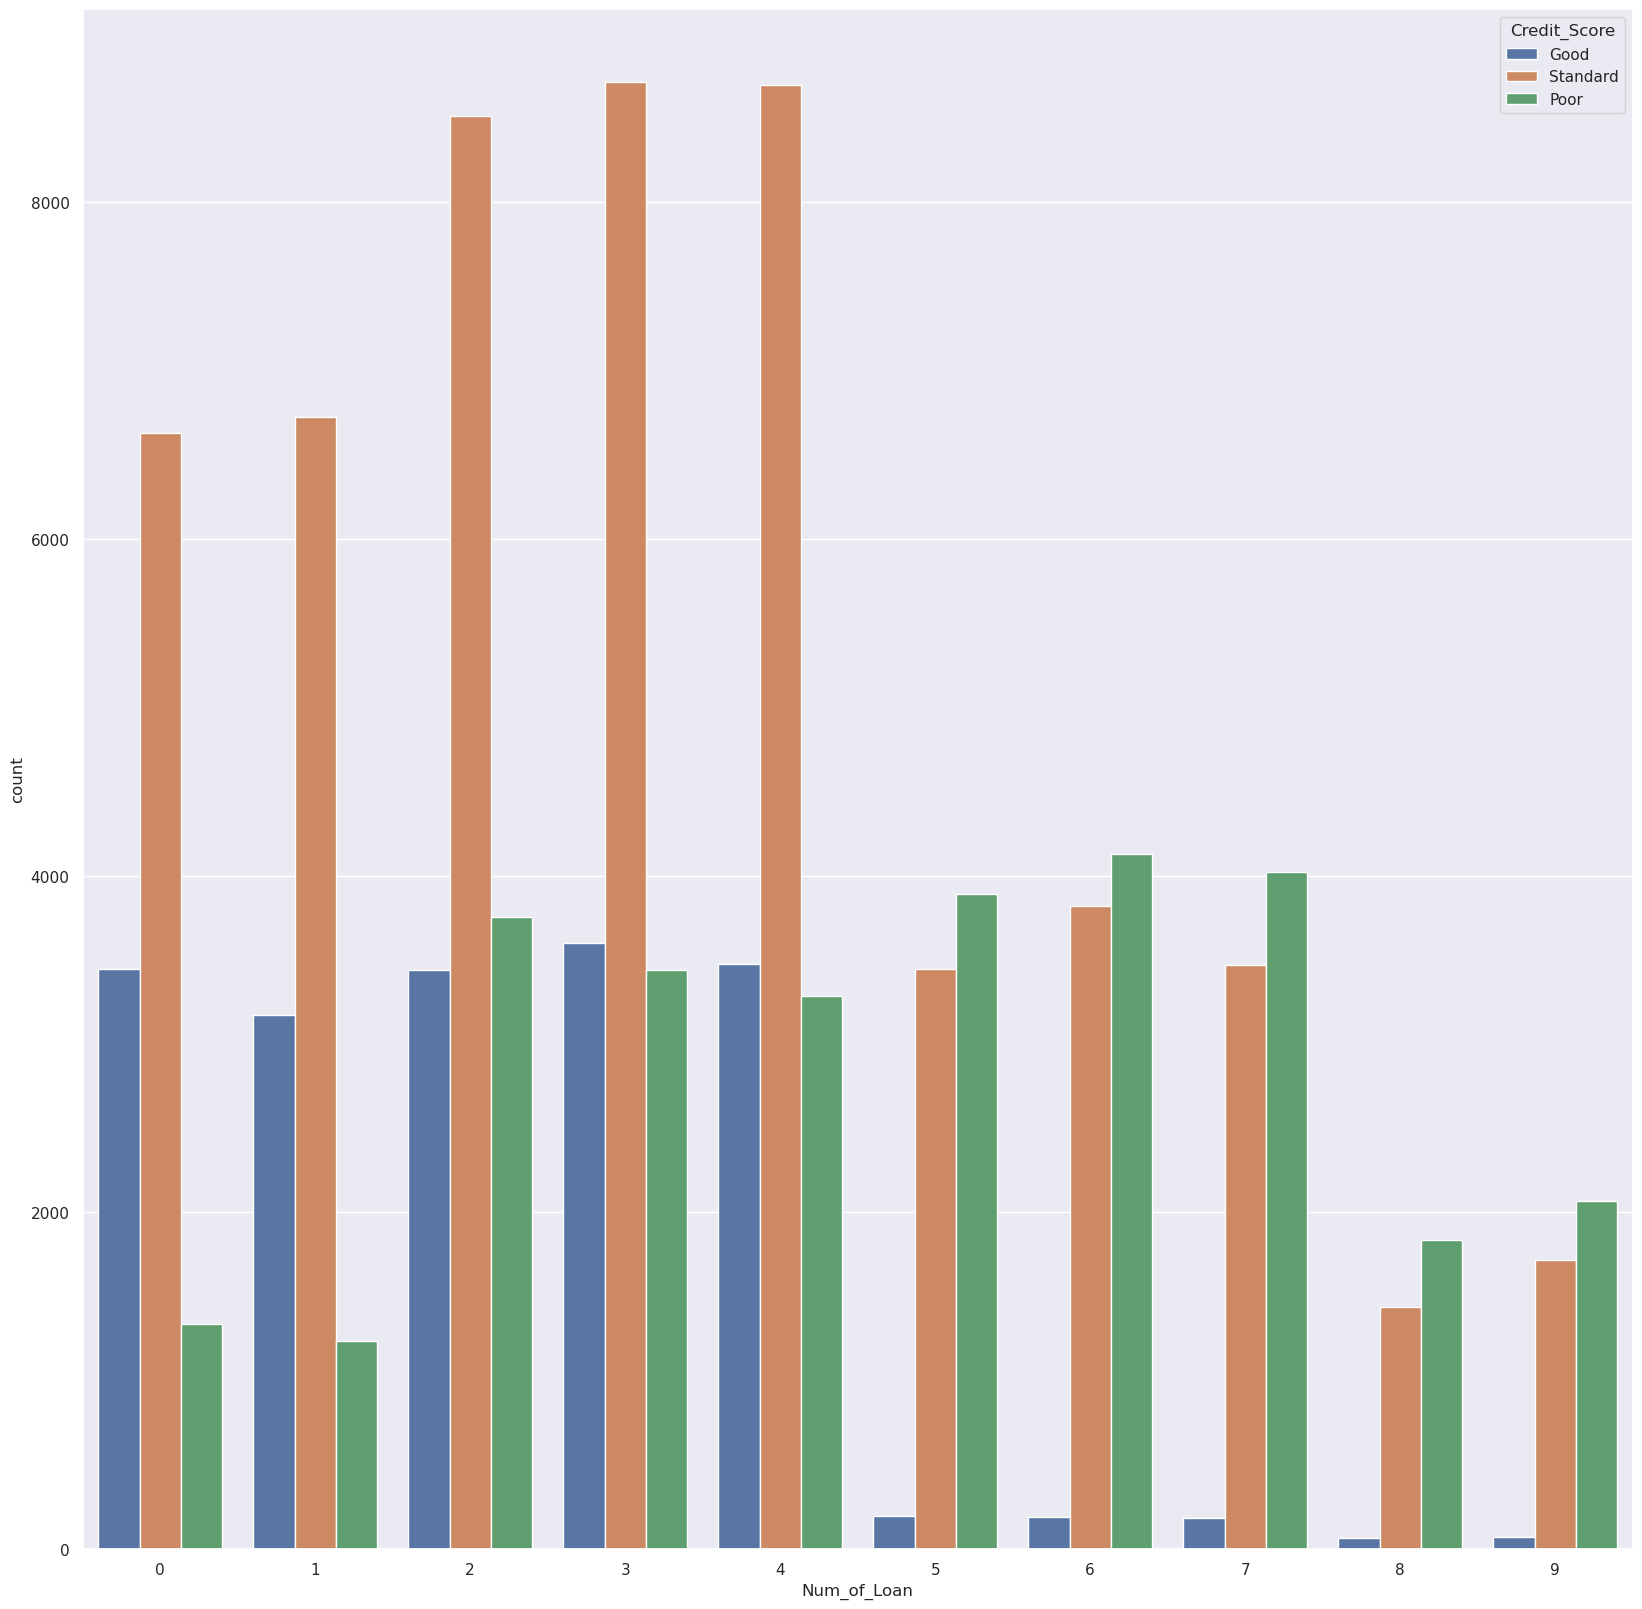

In [45]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Num_of_Loan', hue = 'Credit_Score')

По числу заемов можно сказать, что клиенты с хорошим кредитным рейтингом берут небольшое количество заемов по сравнению с остальными клиентами.

Text(0.5, 1.0, 'Credit_History_Age distribution')

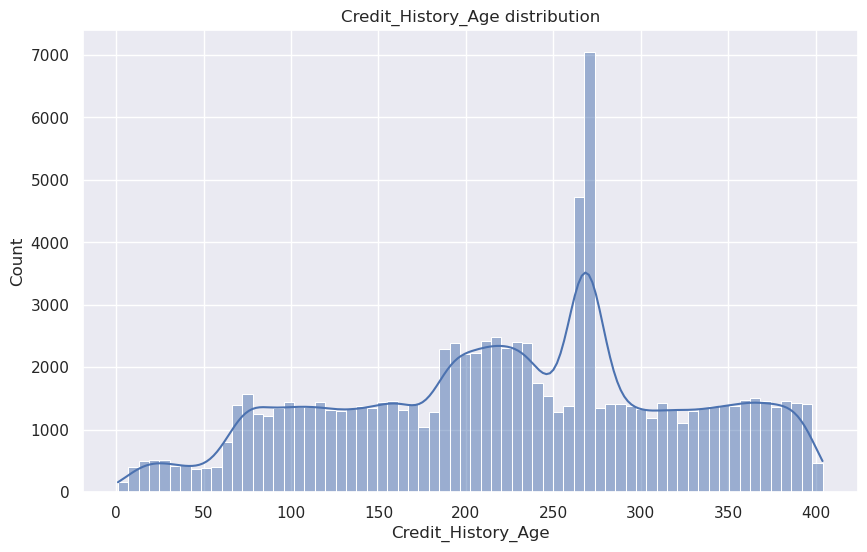

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(x=train_data['Credit_History_Age'], kde=True)
plt.title("Credit_History_Age distribution")

Опять же, распределение не является нормальным. Большой пик приходится на 260-270 количнство месяцев, это примерно 21-22 года.

Text(0.5, 1.0, 'Outstanding debit distribution')

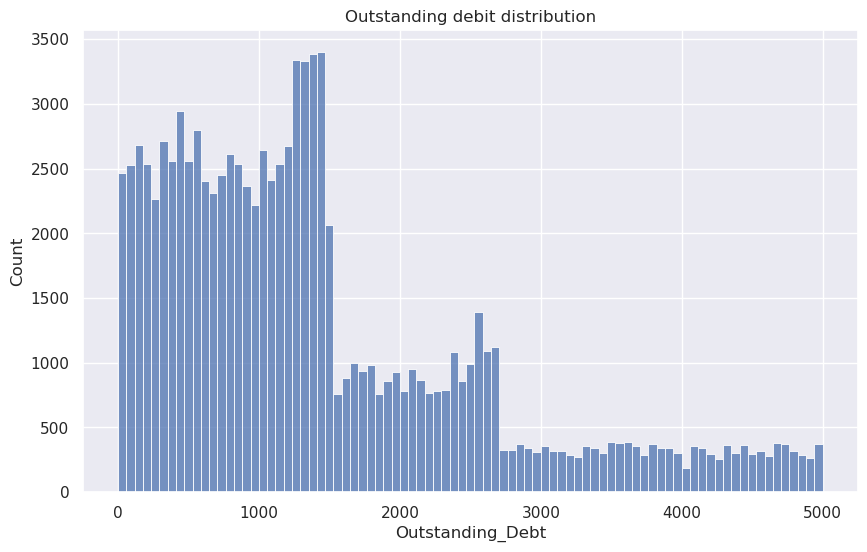

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(x=train_data['Outstanding_Debt'])
plt.title("Outstanding debit distribution")

Распределение не нормально, пик приходится на 1500, далее следует сильный спад.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

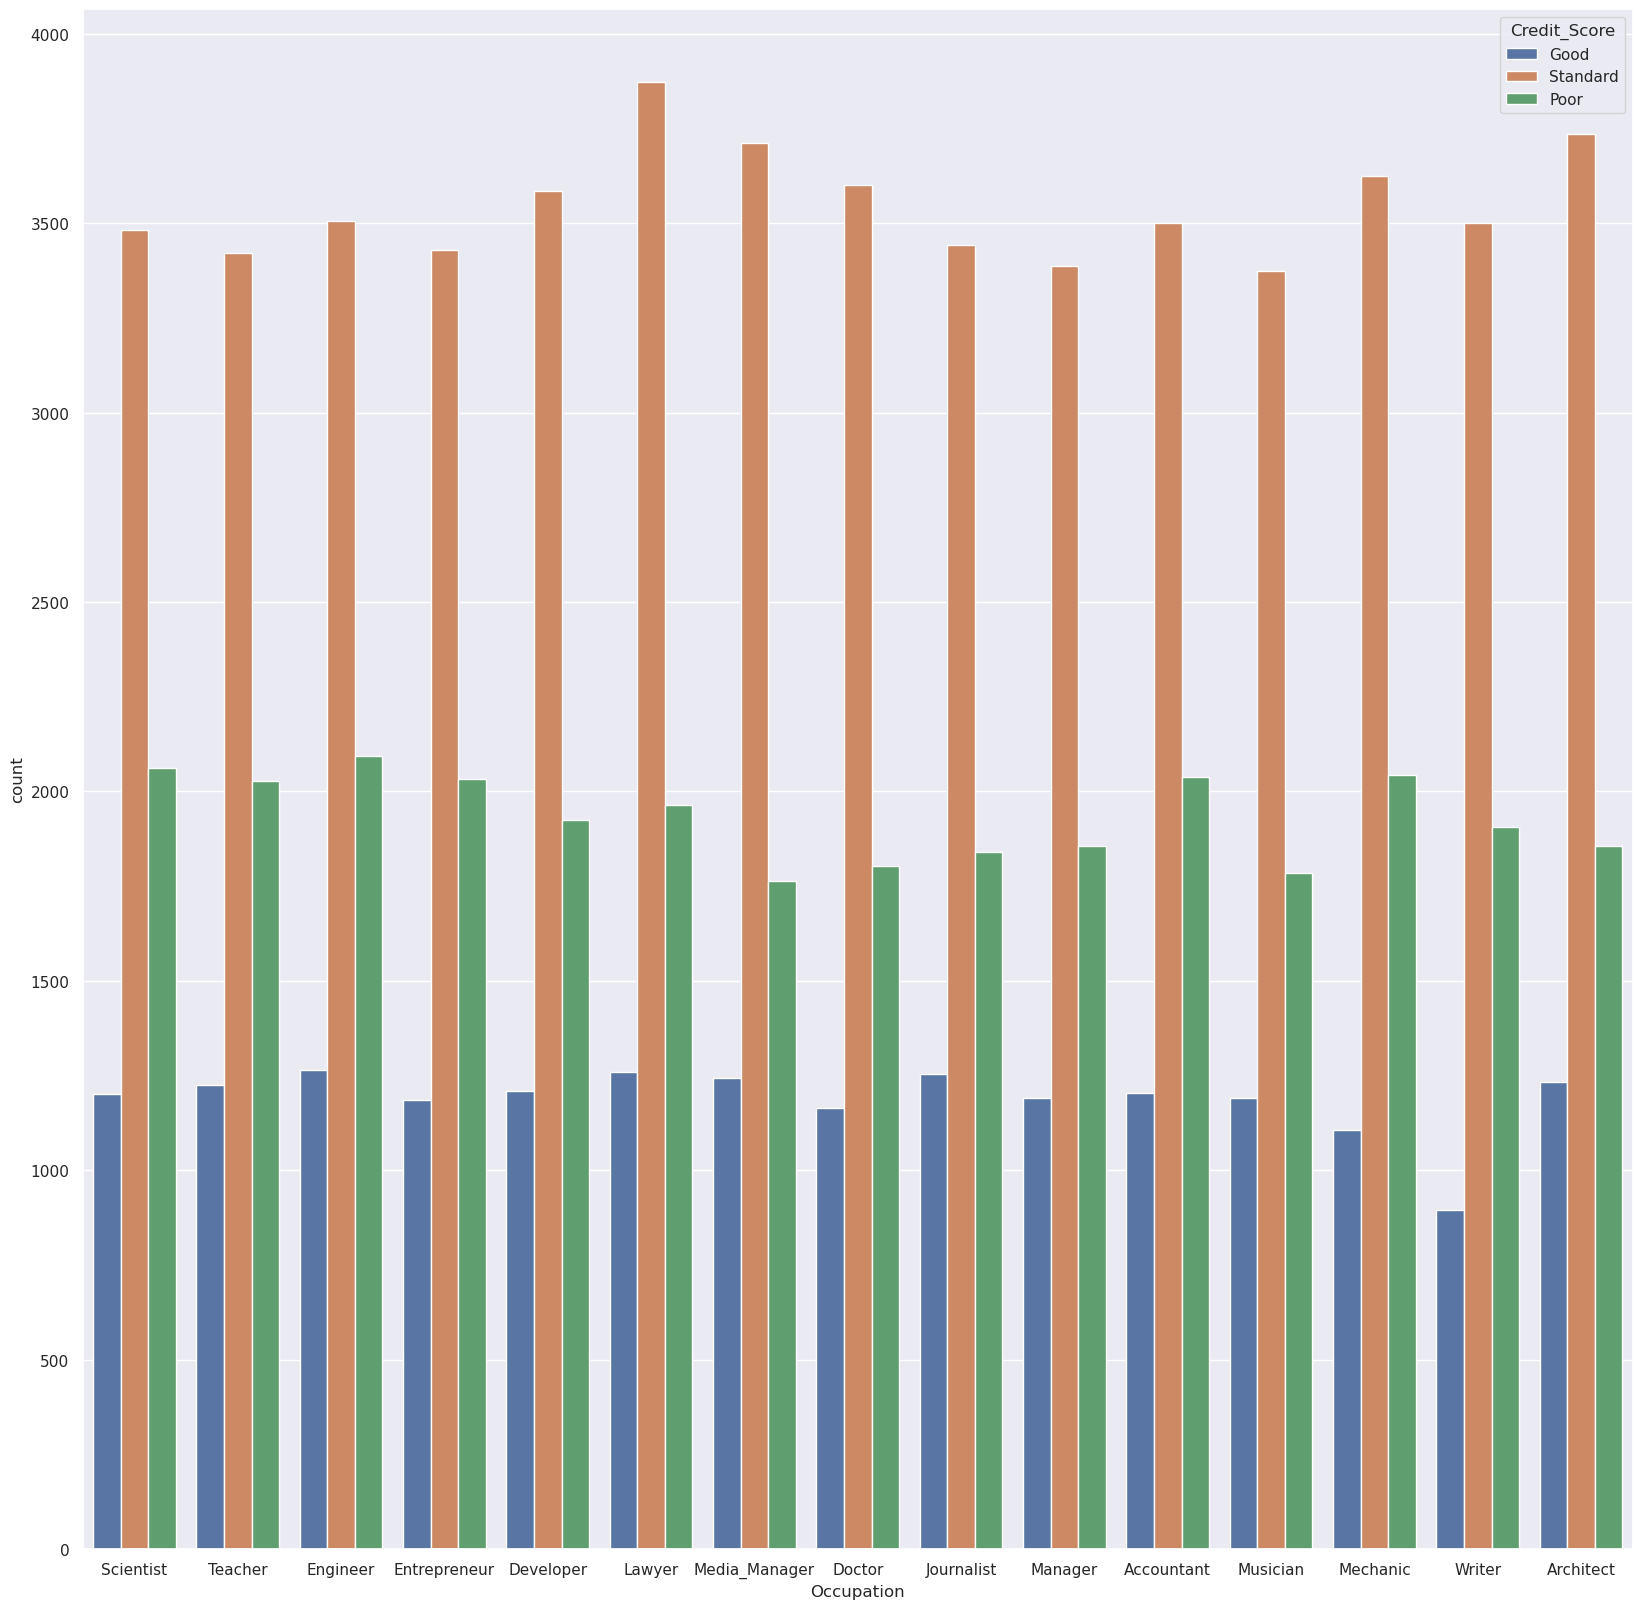

In [48]:
plt.figure(figsize = (20, 20))
sns.countplot(data = train_data, x = 'Occupation', hue = 'Credit_Score')

Опять же, по данному графику можно предположить, что род деятельности не сильно влияет на кредитный рейтинг.

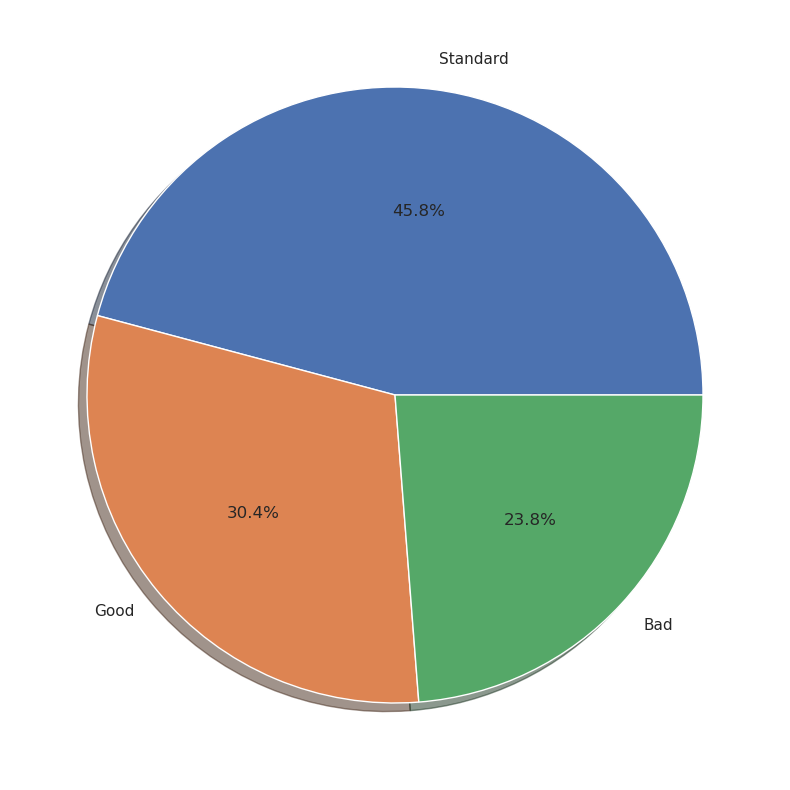

In [49]:
label = train_data.Credit_Mix.value_counts().index
label_count = train_data.Credit_Mix.value_counts().values
plt.pie(data=train_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

По данной диаграмме видно, что большинство клиентов имеют стандартный кредитный портфель.

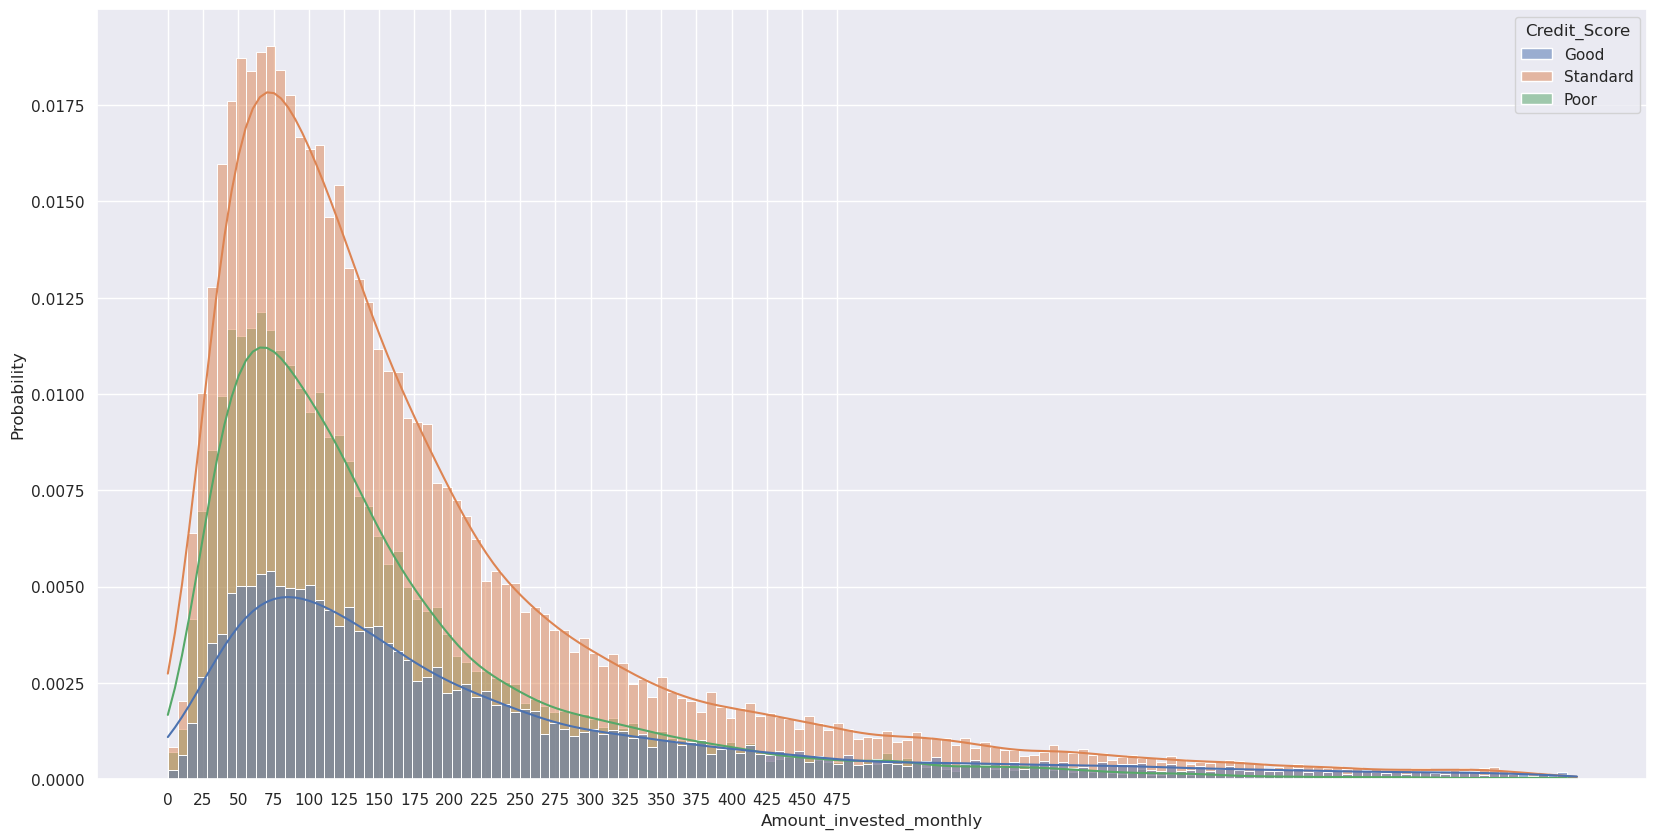

In [50]:
mask = train_data[train_data['Amount_invested_monthly'] < 1000]
plt.figure(figsize = (20,10))
sns.histplot(data = mask, x = 'Amount_invested_monthly', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.xticks(np.arange(0, 500, 25))
plt.show()

Из приведенного выше графика ясно, что большинство клиентов, которые инвестируют, имеют стандартный кредитный рейтинг.

Text(0.5, 21.249999999999993, 'Num_of_Loan')

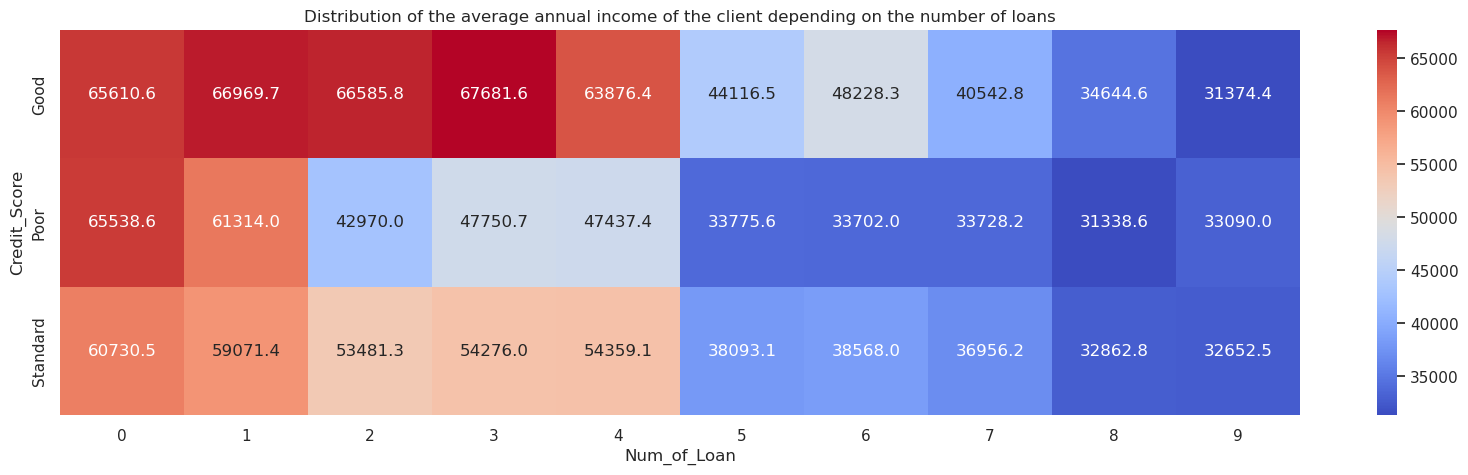

In [51]:
pivot_data = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Num_of_Loan', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the number of loans')
ax.set_ylabel('Credit_Score') 
ax.set_xlabel('Num_of_Loan')

А вот по данной тепловой карте понятно, что клипенты с высоким годовым доходом предпочитают брать небольшое число заемов, что достаточно понятно.

Text(0.5, 1.0, 'Distribution of the average annual income of the client depending on the number of bank accounts')

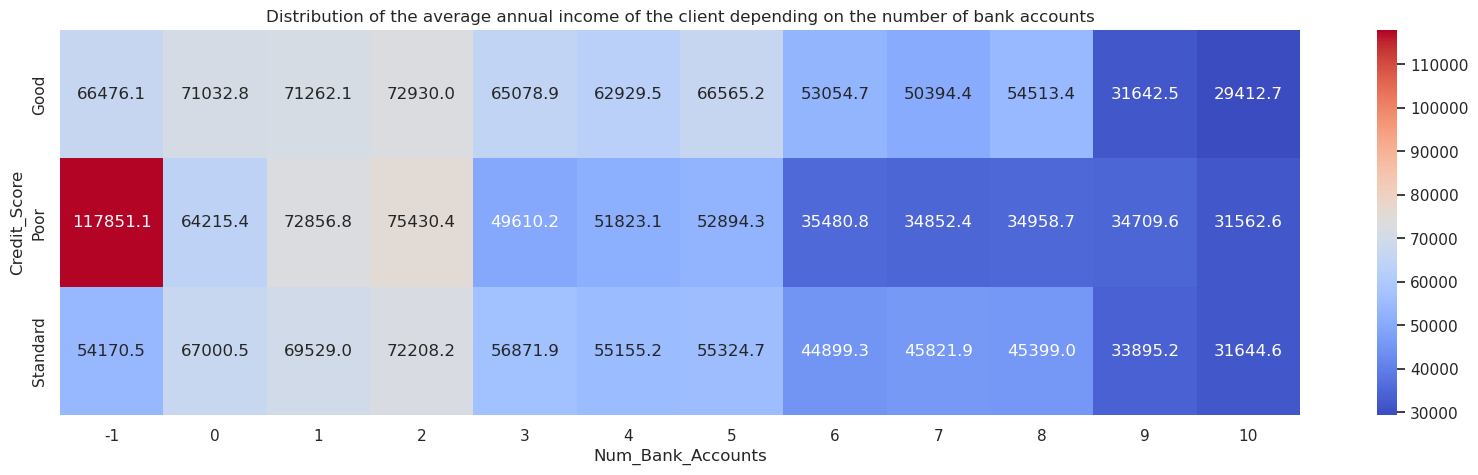

In [52]:
pivot_data_bank = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Num_Bank_Accounts', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data_bank, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the number of bank accounts')

По данной диаграмме также отмечу, что клиенты с низким годовым доходом имею много банковских аккаунтов.

Text(0.5, 1.0, 'Distribution of the average annual income of the client depending on the occupation')

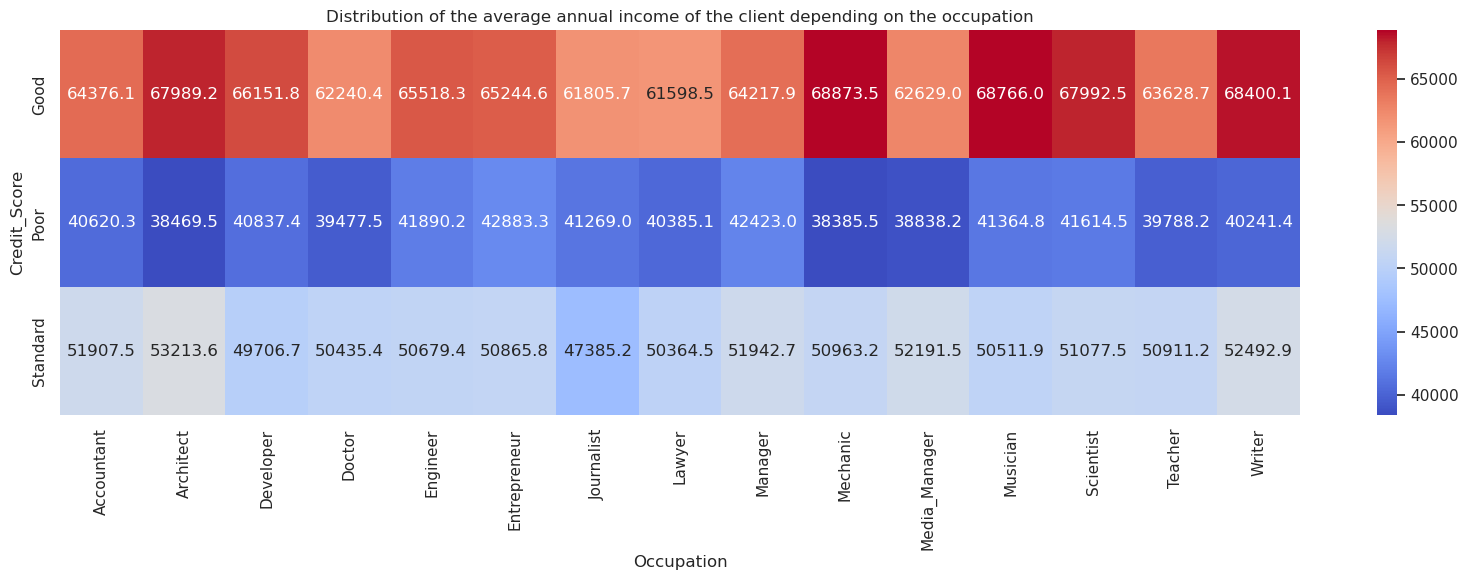

In [53]:
pivot_data_occupation = train_data.pivot_table(
    index='Credit_Score', 
    values='Annual_Income', 
    columns='Occupation', 
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data=pivot_data_occupation, annot=True, fmt=".1f", cmap='coolwarm',ax=ax)
ax.set_title('Distribution of the average annual income of the client depending on the occupation')

Очевидно, что люди любой профессии со средним годовым доходом более 60000 долларов имеют хороший кредитный рейтинг
Люди со средним годовым доходом 50000 имеют стандартный кредитный рейтинг
Люди со средним годовым доходом в 40000 долларов имеют плохой кредитный рейтинг

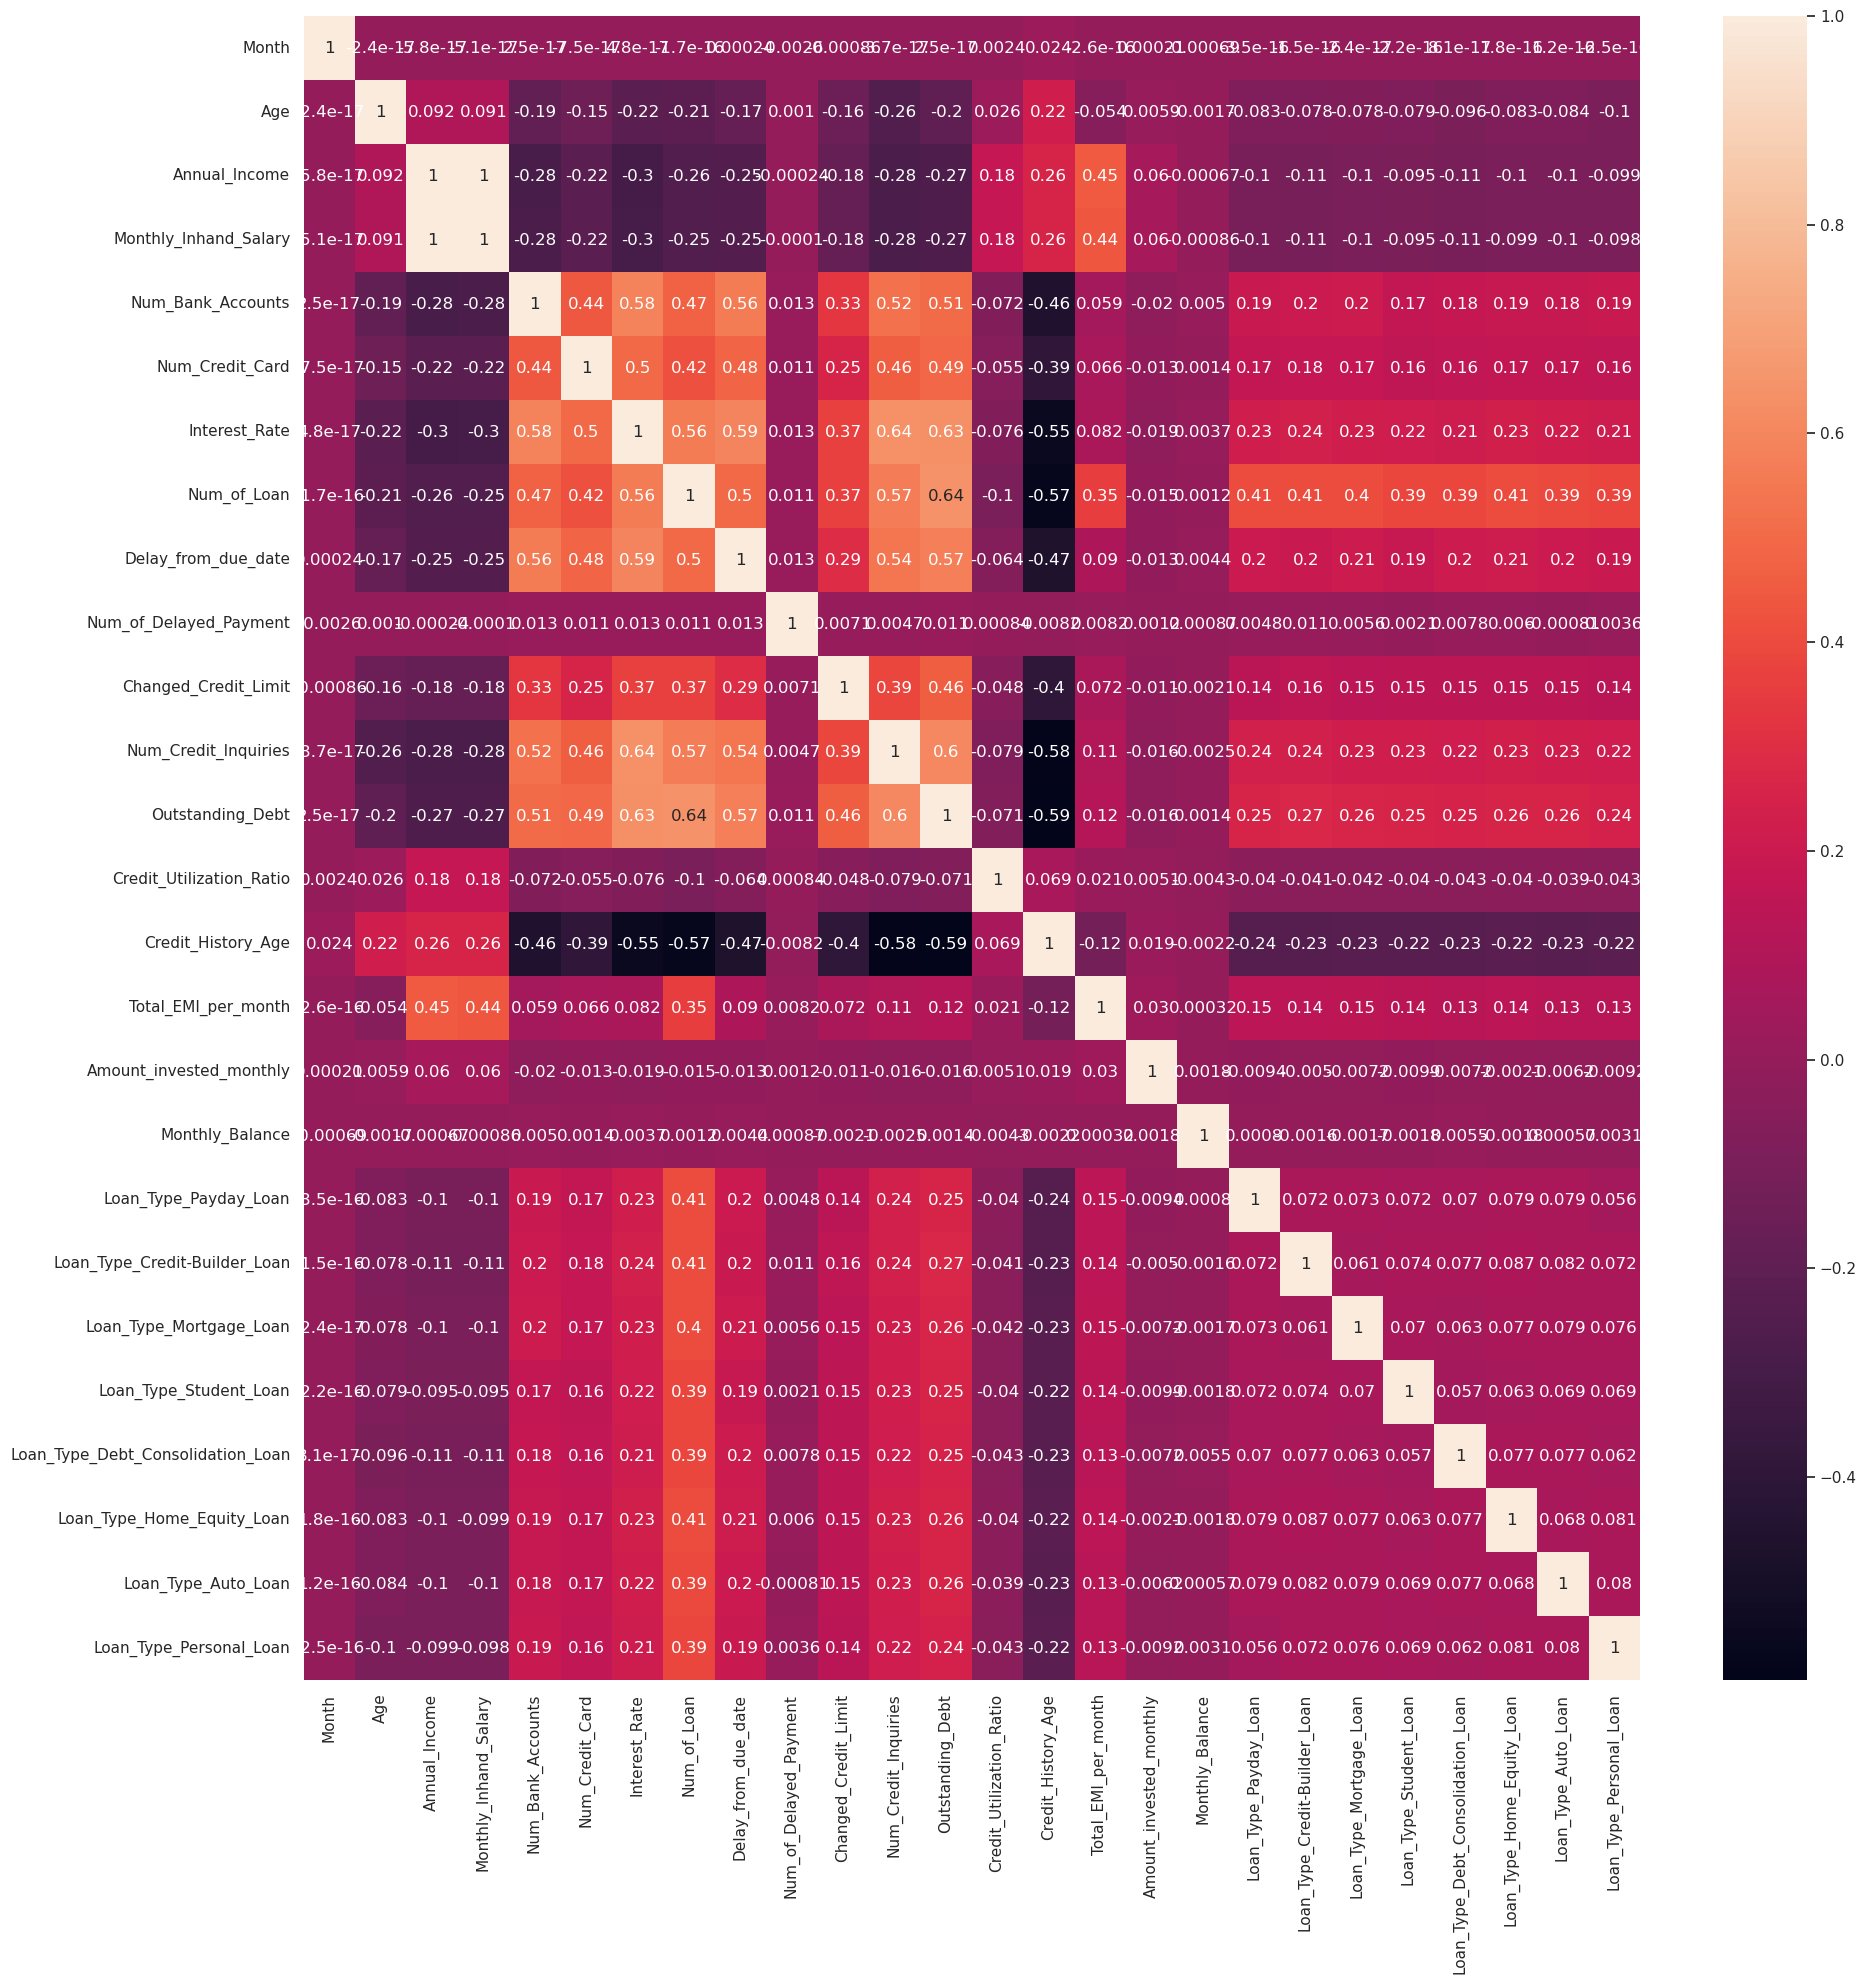

In [54]:
plt.figure(figsize = (20, 20))
sns.heatmap(train_data.corr(), annot = True)
plt.tight_layout()

По данной тепловой диаграмме видно, что признаки 'Annual_Income' и 'Monthly_Inhand_Salary' имеют коэффициент корреляции 1, этот факт может привести к утечке данных. Также важно отметить, что такие признаки как 'Occupation' и 'Month' не влияют на значение кредитного рейтинга клиента. Многие числовые данные не подчиняются нормальному распределению и имеют большой разброс значений, поэтому делаю вывод, что такие данные требуют обработки в следующем разделе.

# 4. Преобразование данных

In [55]:
# Сделаем копии датасетов, чтобы преоразовать их для передачи в модель
copy_train = train_data.copy()
copy_test = test_data.copy()

In [56]:
# удаляем месяц, так как он слабо влияет на кредитный рейтинг
del copy_train['Month']
del copy_test['Month']

In [57]:
# На мой взгляд, род деятельности не сильно коррелирует с остальными данными, этот признак можно удалить
del copy_train['Occupation']
del copy_test['Occupation']

In [58]:
# закодируем признаки 'Credit_Score' и 'Credit_Mix'
def cod_score(x):
    if x == "Good":
        return 1
    elif x == "Standard":
        return 0
    else:
        return -1

copy_train['Credit_Score'] = copy_train['Credit_Score'].apply(cod_score)
copy_train['Credit_Mix'] = copy_train['Credit_Mix'].apply(cod_score)
copy_test['Credit_Mix'] = copy_test['Credit_Mix'].apply(cod_score)

In [59]:
# также закодируем следующие признаки однократным кодированием
cols_to_onehot = ['Payment_of_Min_Amount', 'Payment_Behaviour_Spent', 'Payment_Behaviour_Value']

for data in [copy_train, copy_test]:
    for col in cols_to_onehot:
        unique_values = data[col].unique()
        
        for uniq in unique_values:
            data[col + '_' + uniq] = data[col].apply(lambda x: 1.0 if x == uniq else 0.0)
            
copy_train = copy_train.drop(columns = cols_to_onehot)
copy_test  = copy_test.drop(columns = cols_to_onehot)

In [60]:
# удаляем 'Monthly_Inhand_Salary', чтобы избежать утечки данных
del copy_train['Monthly_Inhand_Salary']
del copy_test['Monthly_Inhand_Salary']

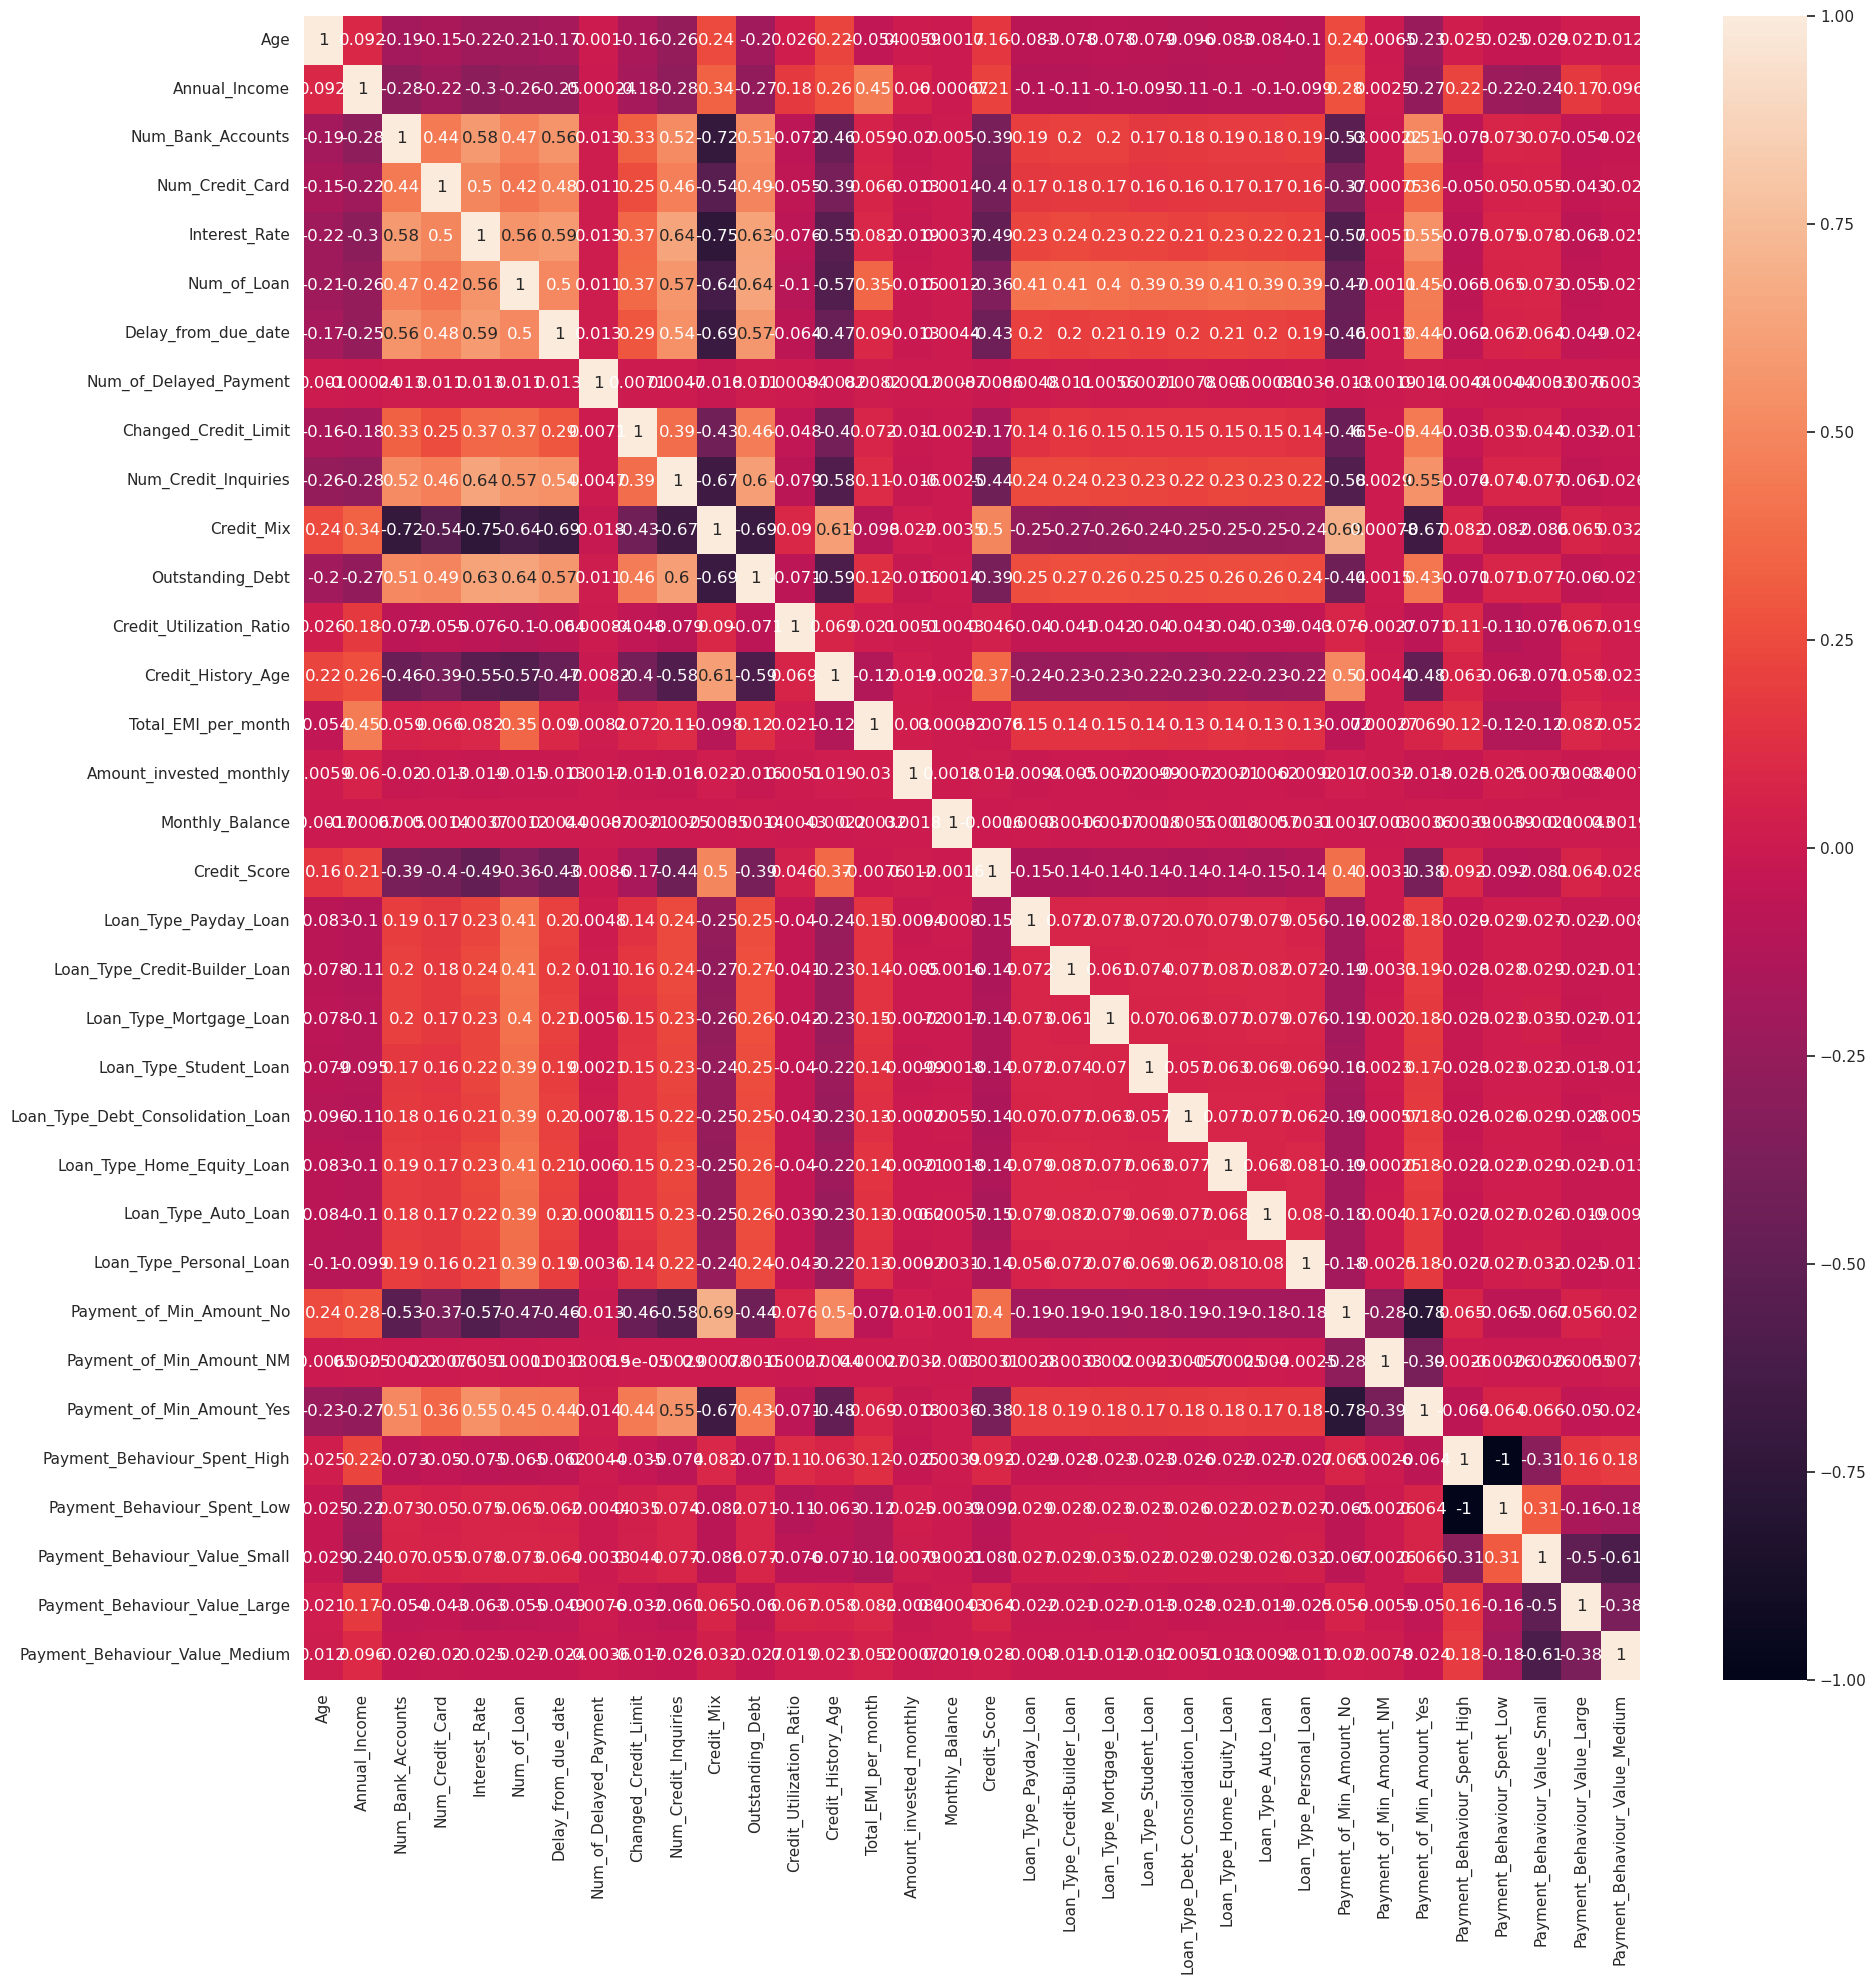

In [61]:
# проверяем тепловую диаграмму
plt.figure(figsize = (20, 20))
sns.heatmap(copy_train.corr(), annot = True)
plt.tight_layout()

In [62]:
# используем логарифмическое преобразование для следующих признаков, чтобы их распределение приблизилось к нормальному
cols_to_log = ['Annual_Income', 'Total_EMI_per_month', 'Amount_invested_monthly']

train_mean = {}
train_std  = {}

for col in cols_to_log:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train, copy_test]:
    for col in cols_to_log:
        data[col] = data[col].apply(lambda x: np.log(x + 1.0))
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

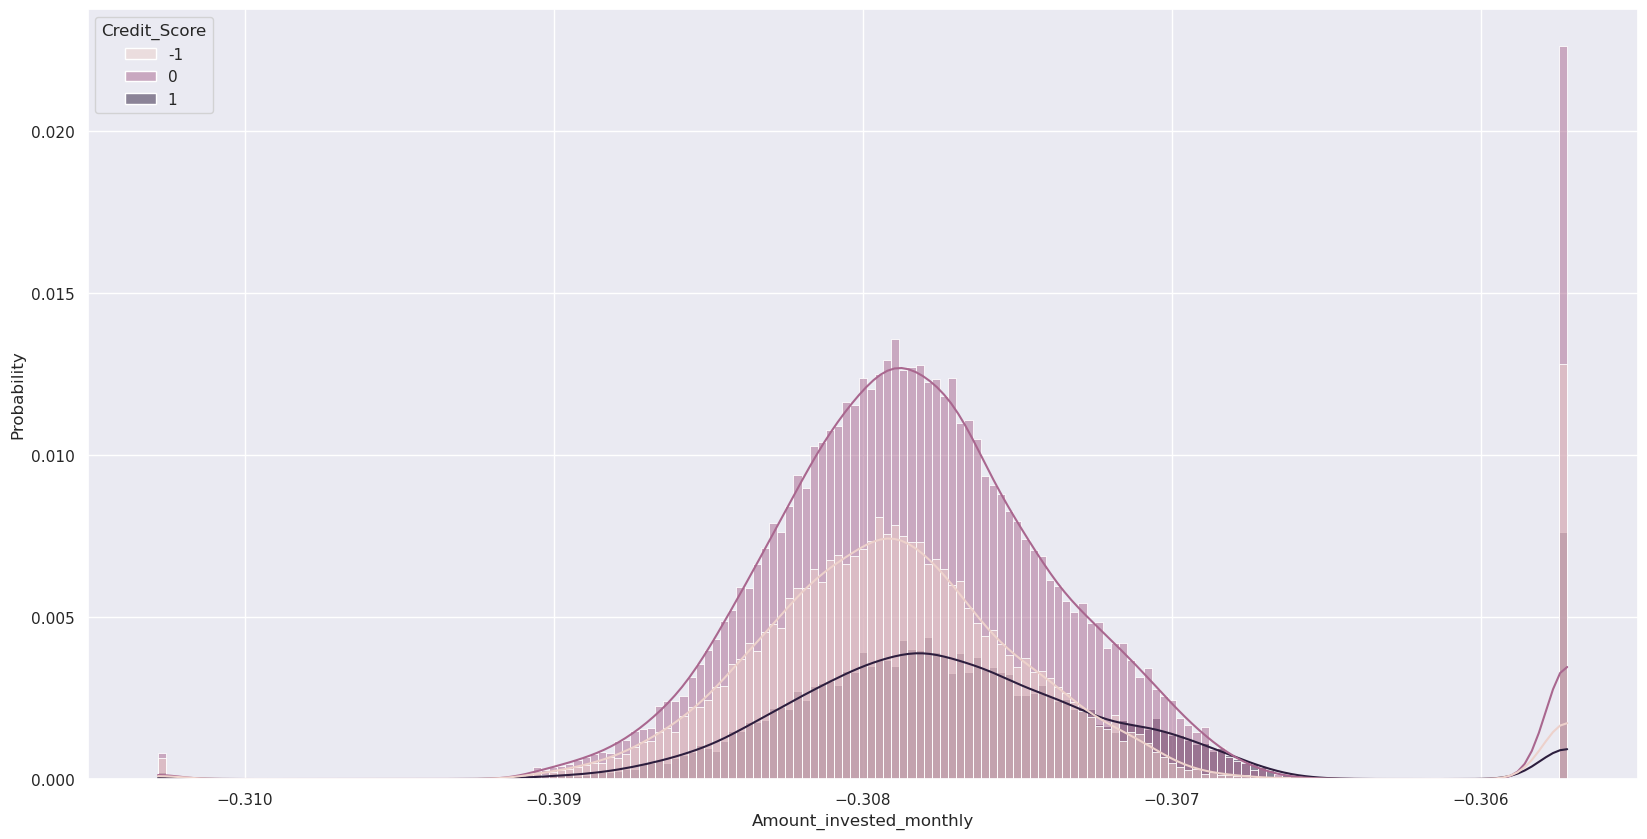

In [63]:
plt.figure(figsize = (20,10))
sns.histplot(data = copy_train, x = 'Amount_invested_monthly', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.show()

Действительно, распределение признака больше напоминает нормальное.

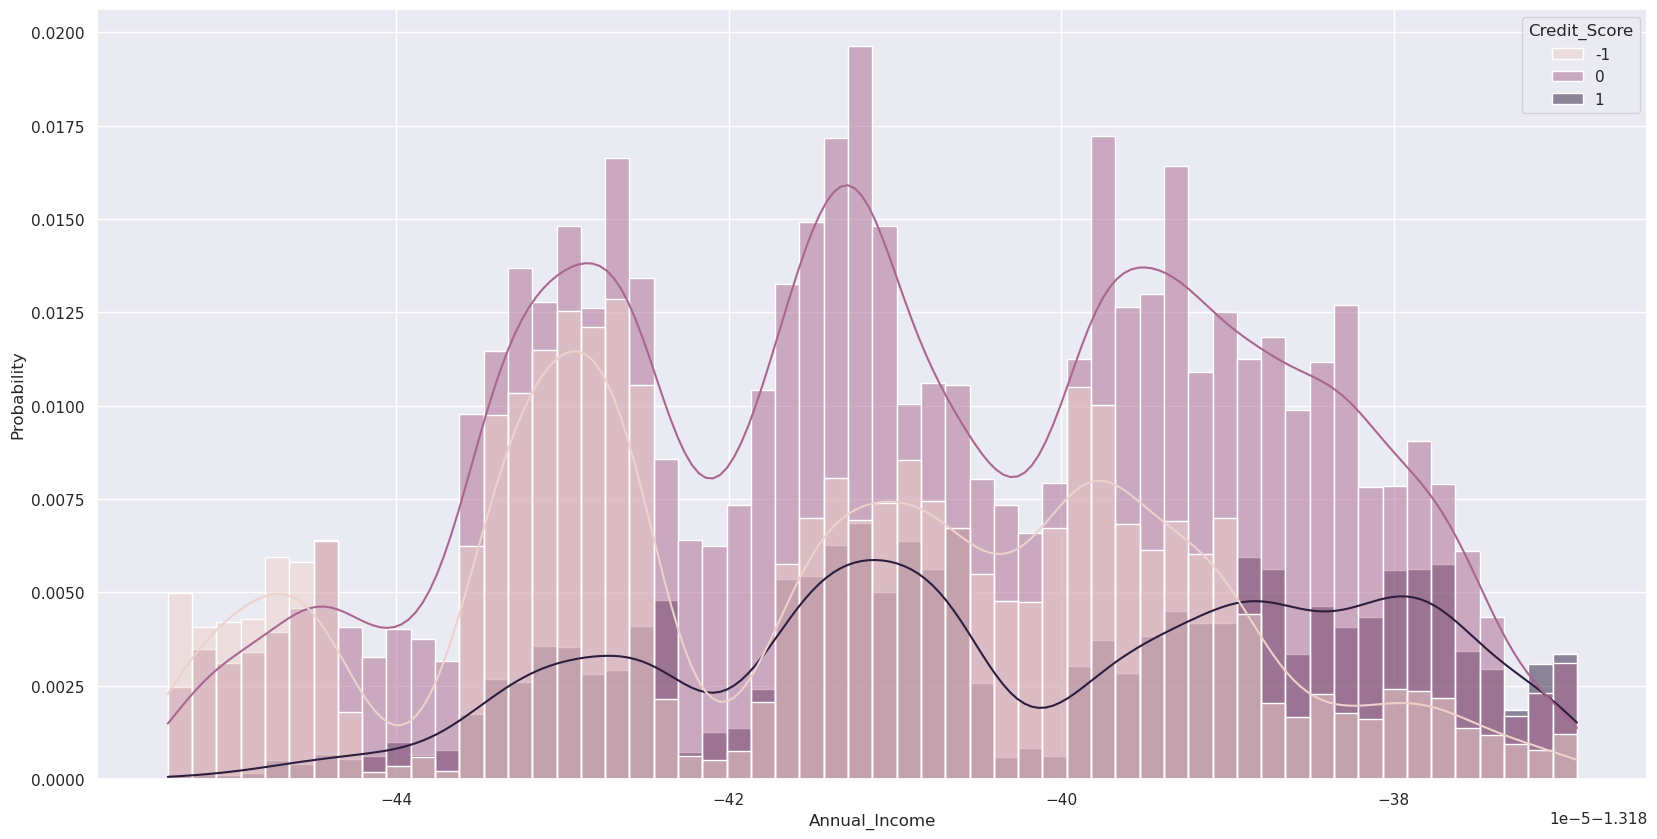

In [64]:
plt.figure(figsize = (20,10))
sns.histplot(data = copy_train, x = 'Annual_Income', kde = True, hue = 'Credit_Score', stat = 'probability')
plt.show()

Годовой доход сохранил три пика даже после логарифмического преобразования.

In [65]:
# Нормализуем остальные признаки
names_to_norm = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries', 
                 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance']

train_mean = {}
train_std  = {}

for col in names_to_norm:
    train_mean[col] = data[col].mean()
    train_std [col] = data[col].std()

for data in [copy_train, copy_test]:
    for col in names_to_norm:
        data[col] = data[col].apply(lambda x: (x - train_mean[col]) / train_std[col])

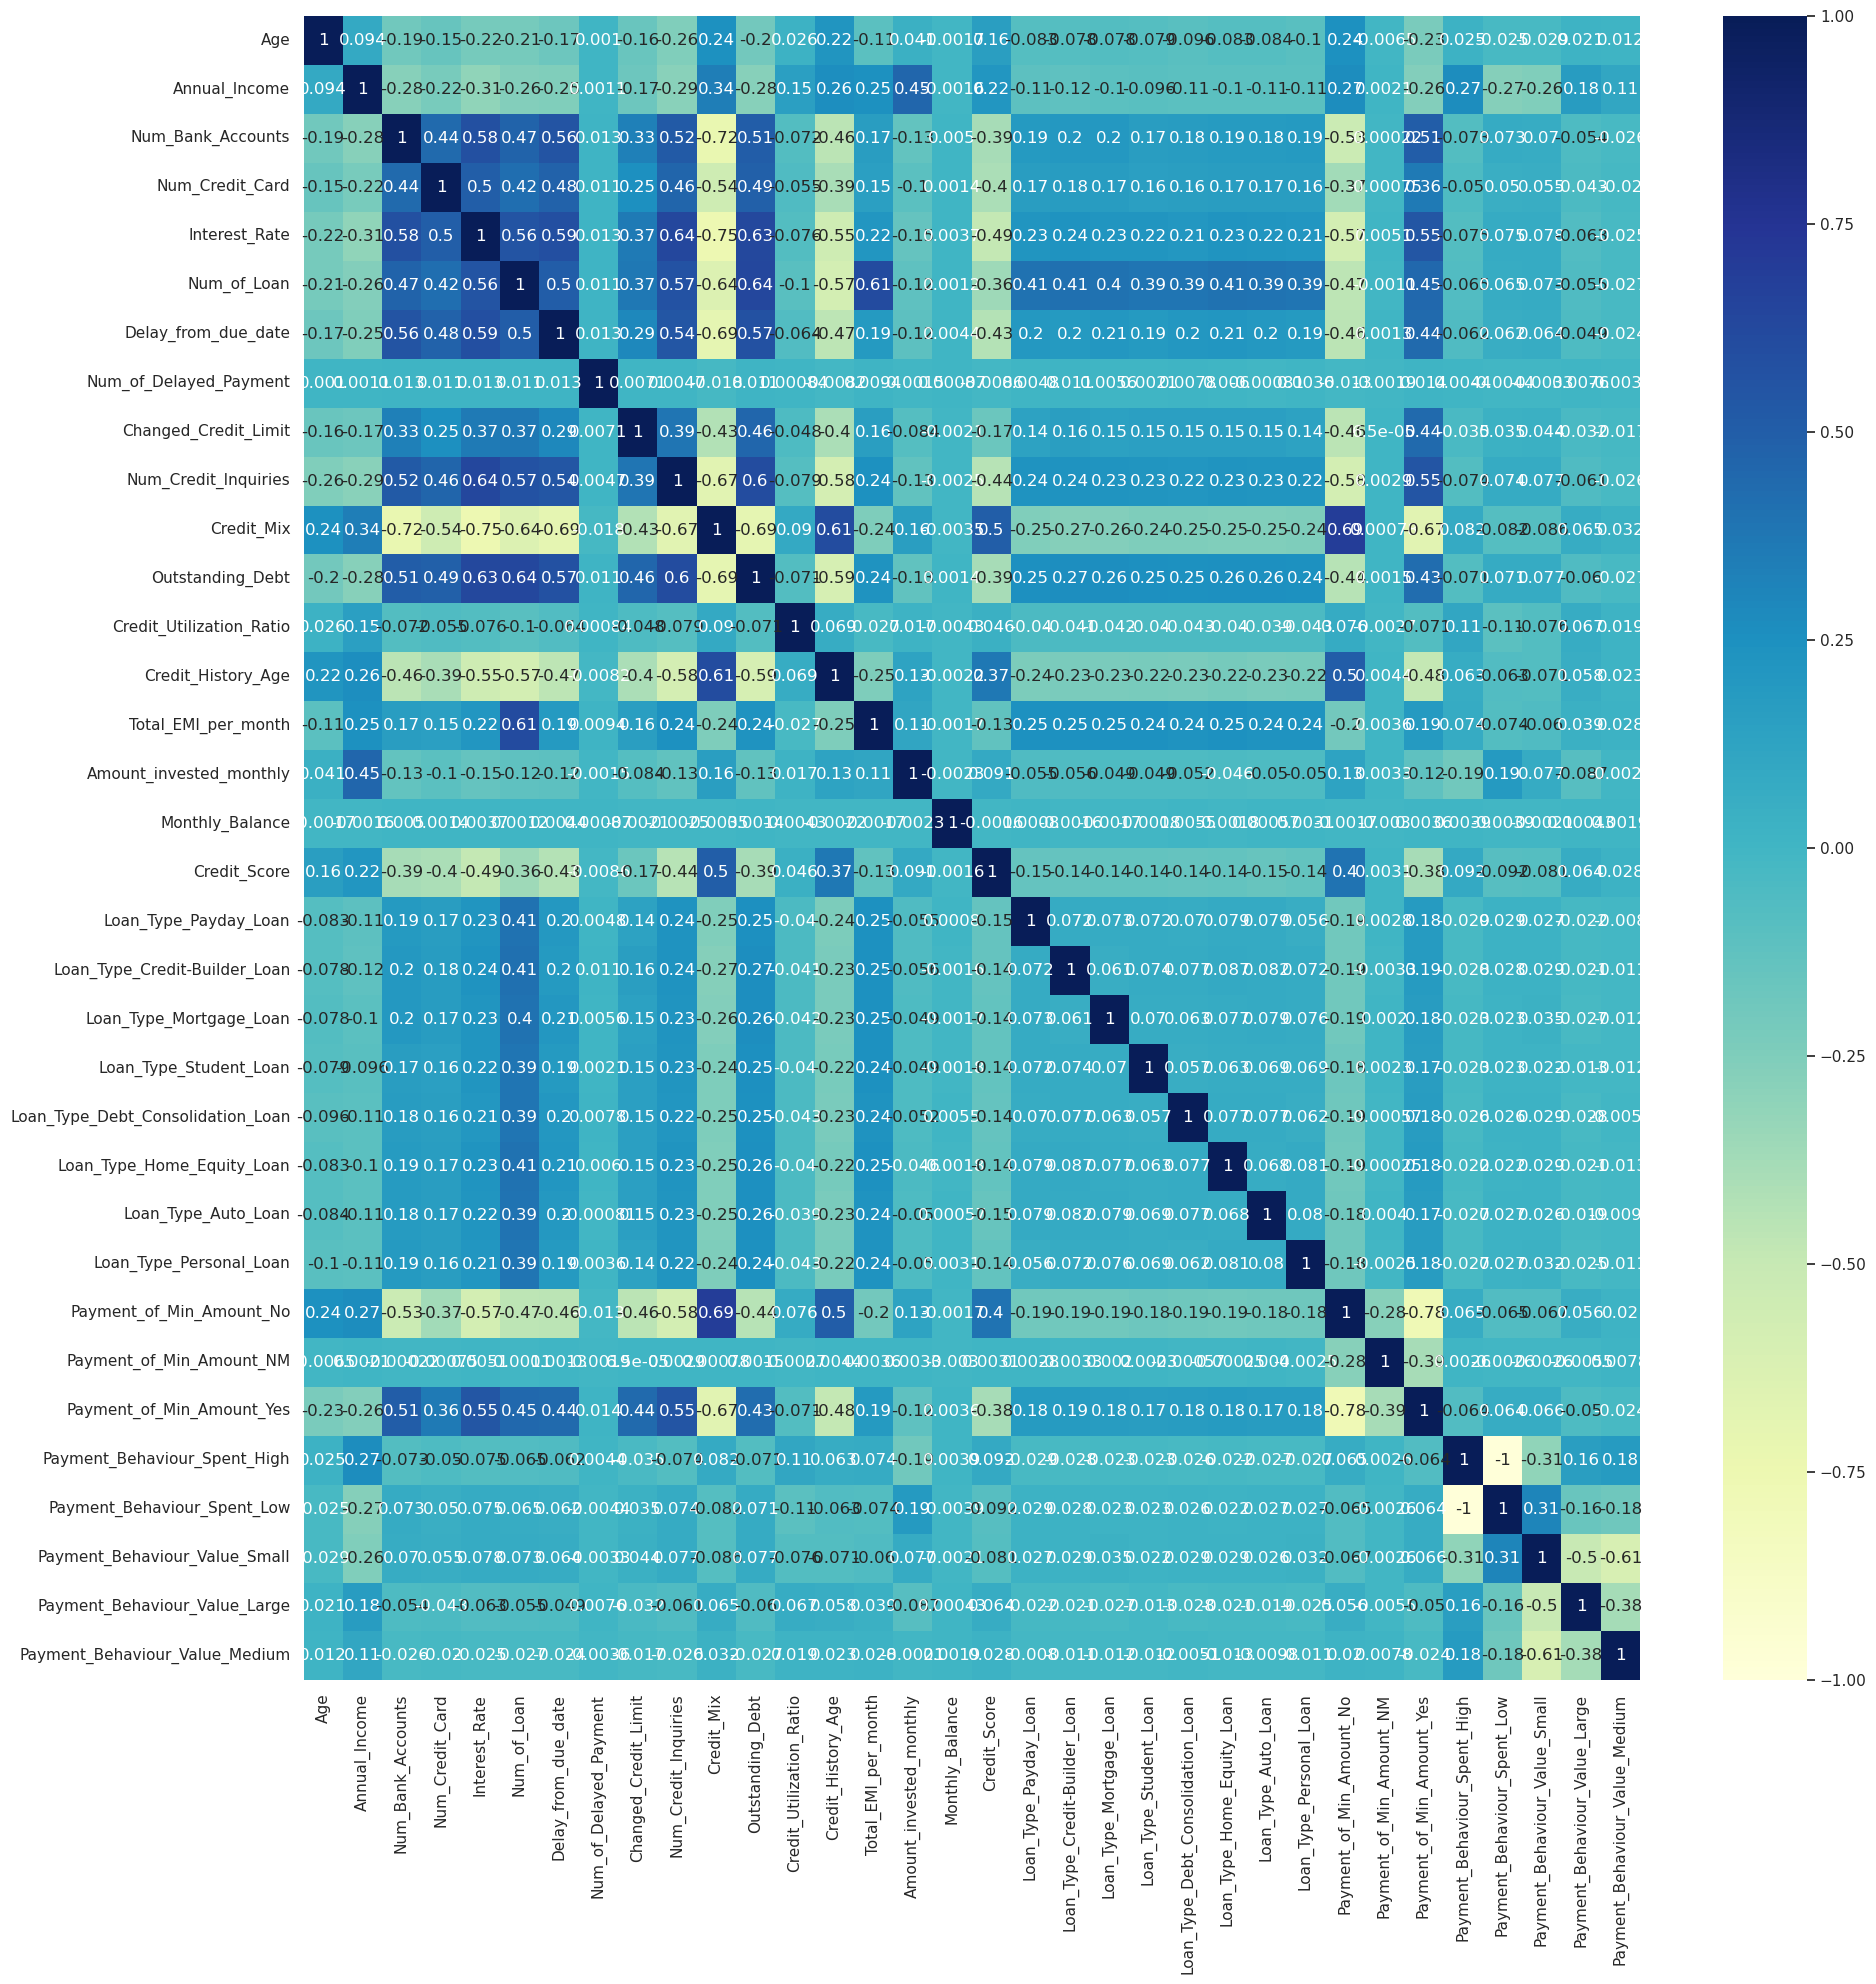

In [66]:
# проверяем тепловую диаграмму
plt.figure(figsize = (20, 20))
sns.heatmap(copy_train.corr(), annot = True, cmap="YlGnBu")
plt.tight_layout()

После нормализации и логарифмирования данных можно отметить, что распределение числовых признаков стало больше напоминать нормальное, нечисловые признаки были закодированы для передачи в модель.

# 5. Обучение модели

Определяем целевой признак, т.е. "Credit_Score". Разделяем тренинговый датасет: 75% на обучение, 25% на валидацию

In [67]:
y = copy_train["Credit_Score"]
X = copy_train
del copy_train["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

## 5.1. Логистическая регрессия

Для начала я применяю самую простую модель со стандартными параметрами.

In [68]:
log_reg = LogisticRegression(random_state=42)
log_reg = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59      7313
           0       0.68      0.74      0.71     13265
           1       0.56      0.62      0.59      4422

    accuracy                           0.66     25000
   macro avg       0.64      0.63      0.63     25000
weighted avg       0.66      0.66      0.65     25000



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Резултьтат слабый, логистическая регрессия слабо предсказывает "Credit_Score".

## 5.2. Ближайшие соседи

In [69]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.65      0.64      0.64      7313
           0       0.70      0.75      0.72     13265
           1       0.56      0.45      0.50      4422

    accuracy                           0.66     25000
   macro avg       0.64      0.61      0.62     25000
weighted avg       0.66      0.66      0.66     25000



Результат также слабый, использовала стандартные параметры.

## 5.3. Деревья решений

In [70]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.71      0.69      0.70      7313
           0       0.74      0.75      0.74     13265
           1       0.65      0.66      0.65      4422

    accuracy                           0.72     25000
   macro avg       0.70      0.70      0.70     25000
weighted avg       0.72      0.72      0.72     25000



Уже несколько лучший результат, использовала стандартные параметры.

## 5.4. Леса рандомизированных деревьев (Рандомный лес)

In [71]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.79      0.82      0.81      7313
           0       0.82      0.81      0.82     13265
           1       0.77      0.74      0.76      4422

    accuracy                           0.80     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.80      0.80      0.80     25000



In [72]:
# вывводим самые важные признаки для модели
fi = pd.DataFrame(rfc.feature_importances_,
                  index=rfc.feature_names_in_,
                  columns=['importance']).sort_values(['importance'], ascending=False)
fi

importance
Outstanding_Debt                     0.103133
Interest_Rate                        0.079068
Credit_History_Age                   0.071147
Credit_Mix                           0.071080
Delay_from_due_date                  0.066125
Changed_Credit_Limit                 0.062173
Credit_Utilization_Ratio             0.055343
Amount_invested_monthly              0.055239
Num_of_Delayed_Payment               0.044564
Annual_Income                        0.043920
Num_Credit_Card                      0.042687
Total_EMI_per_month                  0.042222
Num_Credit_Inquiries                 0.041386
Age                                  0.038363
Num_Bank_Accounts                    0.033236
Num_of_Loan                          0.027112
Payment_of_Min_Amount_Yes            0.019893
Payment_of_Min_Amount_No             0.010135
Payment_Behaviour_Value_Small        0.008955
Payment_Behaviour_Value_Medium       0.008714
Payment_Behaviour_Value_Large        0.007986
Payment_Behaviour_Spent_High         0.007238
Payment_Behaviour_Spent_Low          0.007177
Loan_Type_Auto_Loan                  0.006337
Loan_Type_Student_Loan               0.006198
Loan_Type_Debt_Consolidation_Loan    0.006123
Loan_Type_Payday_Loan                0.006098
Loan_Type_Personal_Loan              0.006050
Loan_Type_Mortgage_Loan              0.005986
Loan_Type_Credit-Builder_Loan        0.005984
Loan_Type_Home_Equity_Loan           0.005903
Payment_of_Min_Amount_NM             0.004402
Monthly_Balance                      0.000023

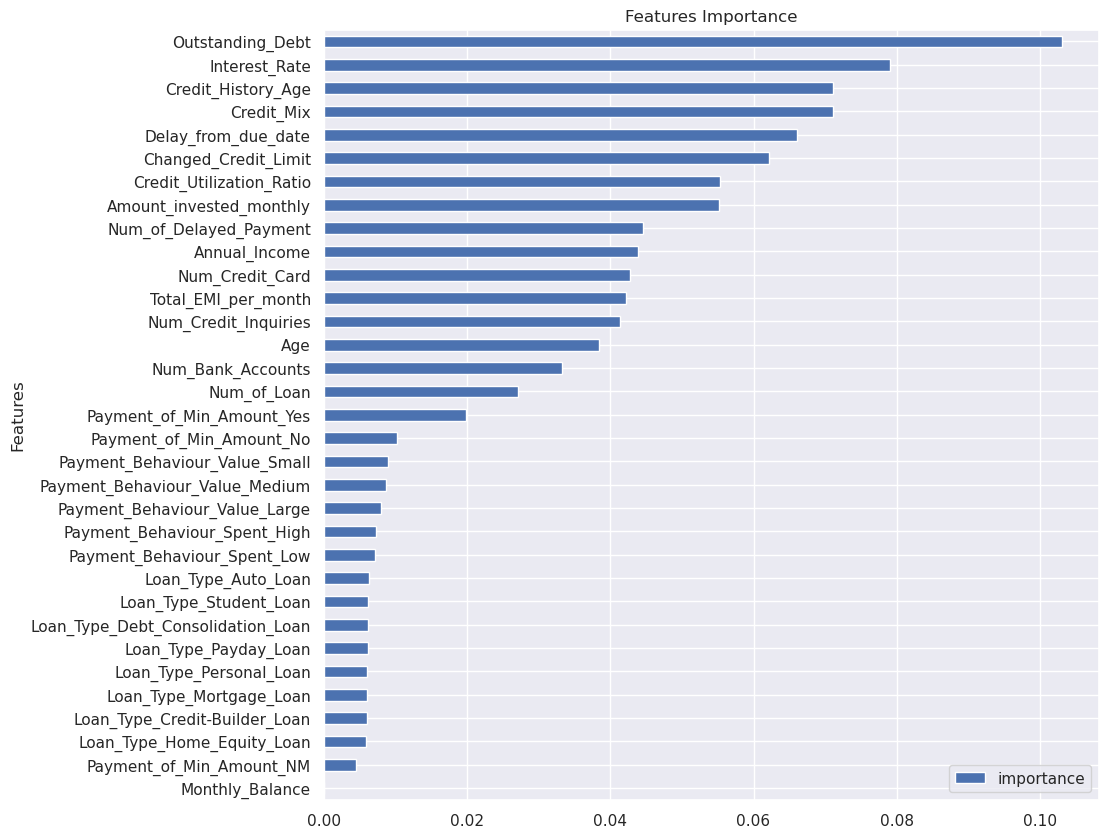

In [73]:
# также отражаем их на графике
ax = fi.sort_values('importance').plot(kind='barh', title='Features Importance', figsize=(10,10))
ax.set_ylabel('Features')
plt.show()

Получается, что самый важный признак - Outstanding_Deb, что достаточно логично. Важное значение также имеют: Interest_Rate, Gredit_Mix и Credit_History_Age.

## 5.5. Наивные методы Байеса

In [74]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.73      0.65      7313
           0       0.83      0.41      0.55     13265
           1       0.41      0.86      0.55      4422

    accuracy                           0.58     25000
   macro avg       0.61      0.67      0.59     25000
weighted avg       0.68      0.58      0.58     25000



Результат слабый. Дааная модель достаточно посредственно предсказывает результаты.

## 5.6. AdaBoost

In [75]:
clf = AdaBoostClassifier(n_estimators=120, random_state=42, learning_rate=0.5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.59      0.63      7313
           0       0.71      0.72      0.72     13265
           1       0.56      0.63      0.59      4422

    accuracy                           0.67     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.67      0.67      0.67     25000



Значение метрик не очень большое, тут я не стала оставлять стандартные параметры, так как они показывали плохой результат.

## 5.7. GridSearchCV

В данном разделе я использовала три модели с различными параметрами, чтобы найти наилучший результат.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

base_estimator = ensemble.RandomForestClassifier(random_state=42) 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)
Accuracy на тренировочной выборке: 0.822
Accuracy на тестовой выборке: 0.758


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'max_depth': range(3, 15),
    'criterion': ['gini', 'entropy']
}
base_estimator = tree.DecisionTreeClassifier(random_state=42) 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

DecisionTreeClassifier(max_depth=14, random_state=42)
Accuracy на тренировочной выборке: 0.801
Accuracy на тестовой выборке: 0.727


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

param_grid = {
    'n_neighbors': range(3, 15),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
base_estimator = neighbors.KNeighborsClassifier() 
model = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)

y_train_pred = model.predict(X_train)
print("Accuracy на тренировочной выборке: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
print("Accuracy на тестовой выборке: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

KNeighborsClassifier(n_neighbors=12)
Accuracy на тренировочной выборке: 0.734
Accuracy на тестовой выборке: 0.680


В результе можно отметить, что стандартные методы с параметрами по умолчанию имеют значения метрики Accuracy ниже, чем 
результаты, полученные с помощью поиска по сетке GridSearchCV. А лучший результат на этом датасете показывает рандомный лес со следующими параметрами max_depth=14, n_estimators=500.

А именно:
RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)

Accuracy на тренировочной выборке: 0.822

Accuracy на тестовой выборке: 0.758

# 6. Optuna

## 6.1 RandomForestClassifier

Настрою оптимизацию гиперпараметров для алгоритма случайного леса.

In [79]:
!pip install optuna

In [80]:
import optuna
import catboost as cb

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.accuracy_score(y_train, model.predict(X_train))

  return score

In [81]:
# cоздаем объект исследования
# необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-04-14 17:15:53,909] A new study created in memory with name: RandomForestClassifier
[I 2023-04-14 17:16:20,601] Trial 0 finished with value: 0.8375866666666667 and parameters: {'n_estimators': 120, 'max_depth': 29, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8375866666666667.
[I 2023-04-14 17:16:57,070] Trial 1 finished with value: 0.8443333333333334 and parameters: {'n_estimators': 171, 'max_depth': 18, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8443333333333334.
[I 2023-04-14 17:17:24,857] Trial 2 finished with value: 0.74916 and parameters: {'n_estimators': 197, 'max_depth': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8443333333333334.
[I 2023-04-14 17:18:05,416] Trial 3 finished with value: 0.8861466666666666 and parameters: {'n_estimators': 163, 'max_depth': 24, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8861466666666666.
[I 2023-04-14 17:18:36,290] Trial 4 finished with value: 0.8687466666666667 and parameters: {'n_estimators

In [82]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("accuracy на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 181, 'max_depth': 30, 'min_samples_leaf': 2}
accuracy на обучающем наборе: 0.96


In [83]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

accuracy на тестовом наборе: 0.80


In [84]:
study.optimize(optuna_rf, n_trials=10)

[I 2023-04-14 17:30:00,488] Trial 20 finished with value: 0.8960533333333334 and parameters: {'n_estimators': 185, 'max_depth': 22, 'min_samples_leaf': 3}. Best is trial 13 with value: 0.9564266666666666.
[I 2023-04-14 17:30:50,648] Trial 21 finished with value: 0.9509733333333333 and parameters: {'n_estimators': 187, 'max_depth': 27, 'min_samples_leaf': 2}. Best is trial 13 with value: 0.9564266666666666.
[I 2023-04-14 17:31:41,334] Trial 22 finished with value: 0.9509866666666666 and parameters: {'n_estimators': 191, 'max_depth': 27, 'min_samples_leaf': 2}. Best is trial 13 with value: 0.9564266666666666.
[I 2023-04-14 17:32:27,965] Trial 23 finished with value: 0.95616 and parameters: {'n_estimators': 172, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 13 with value: 0.9564266666666666.
[I 2023-04-14 17:33:13,258] Trial 24 finished with value: 0.91612 and parameters: {'n_estimators': 173, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 13 with value: 0.956426666666666

In [85]:
optuna.visualization.plot_optimization_history(study, target_name="accuracy_score")

График важности гиперпараметров - помогает понять, какие гиперпараметры вносят больший вклад в минимизацию/максимизацию метрики.

In [86]:
optuna.visualization.plot_param_importances(study, target_name="accuracy_score")

Из этого графика можно сделать вывод, что стоит обратить большее внимание на настройку гиперпараметра max_depth

In [87]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="accuracy_score")

Точки с белым фоном это и есть лучшии комбинации n_estimator, max_depth.

## 6.2 CatBoostClassifier

Настрою оптимизацию CatBoostClassifier, для это я повторю обработку исходного датасета, но по другому закодирую целевой признак.

In [88]:
from catboost import CatBoostClassifier, Pool

def optuna_cb(trial):
  # задаем пространства поиска гиперпараметров
  iterations = trial.suggest_int('iterations', 2, 5, 1)
  depth = trial.suggest_int('depth', 1, 5, 1)
  learning_rate = trial.suggest_float('learning_rate', 0.1, 1)

  # создаем модель
  model = CatBoostClassifier(iterations=iterations,
                             depth=depth,
                             learning_rate=learning_rate,
                             loss_function='MultiClass',
                             verbose=True)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.accuracy_score(y_train, model.predict(X_train))

  return score

In [89]:
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="CatBoostClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_cb, n_trials=20)

[I 2023-04-14 17:36:37,973] A new study created in memory with name: CatBoostClassifier
[I 2023-04-14 17:36:38,358] Trial 0 finished with value: 0.6961333333333334 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.96773284836882}. Best is trial 0 with value: 0.6961333333333334.


0:	learn: 0.7468559	total: 91.4ms	remaining: 274ms
1:	learn: 0.7093464	total: 121ms	remaining: 121ms
2:	learn: 0.6952294	total: 158ms	remaining: 52.5ms
3:	learn: 0.6891774	total: 185ms	remaining: 0us


[I 2023-04-14 17:36:38,571] Trial 1 finished with value: 0.6785466666666666 and parameters: {'iterations': 4, 'depth': 3, 'learning_rate': 0.5923669747850705}. Best is trial 0 with value: 0.6961333333333334.


0:	learn: 0.8334392	total: 21.2ms	remaining: 63.5ms
1:	learn: 0.7686514	total: 42.1ms	remaining: 42.1ms
2:	learn: 0.7317375	total: 64.2ms	remaining: 21.4ms
3:	learn: 0.7136452	total: 85.5ms	remaining: 0us


[I 2023-04-14 17:36:38,758] Trial 2 finished with value: 0.6787733333333333 and parameters: {'iterations': 2, 'depth': 5, 'learning_rate': 0.4465970967895452}. Best is trial 0 with value: 0.6961333333333334.


0:	learn: 0.8543761	total: 32.4ms	remaining: 32.4ms
1:	learn: 0.7727097	total: 63.8ms	remaining: 0us
0:	learn: 0.7766895	total: 21.3ms	remaining: 63.8ms
1:	learn: 0.7385169	total: 39.2ms	remaining: 39.2ms


[I 2023-04-14 17:36:38,965] Trial 3 finished with value: 0.6811066666666666 and parameters: {'iterations': 4, 'depth': 3, 'learning_rate': 0.9811804967392073}. Best is trial 0 with value: 0.6961333333333334.


2:	learn: 0.7208461	total: 63.8ms	remaining: 21.3ms
3:	learn: 0.7096702	total: 85.4ms	remaining: 0us
0:	learn: 1.0265426	total: 24.3ms	remaining: 24.3ms
1:	learn: 0.9722968	total: 48.7ms	remaining: 0us


[I 2023-04-14 17:36:39,137] Trial 4 finished with value: 0.6606533333333333 and parameters: {'iterations': 2, 'depth': 4, 'learning_rate': 0.11242927452036194}. Best is trial 0 with value: 0.6961333333333334.
[I 2023-04-14 17:36:39,313] Trial 5 finished with value: 0.6541333333333333 and parameters: {'iterations': 2, 'depth': 4, 'learning_rate': 0.5757684686982969}. Best is trial 0 with value: 0.6961333333333334.


0:	learn: 0.8242041	total: 23.4ms	remaining: 23.4ms
1:	learn: 0.7555914	total: 46.3ms	remaining: 0us
0:	learn: 1.0067392	total: 14.2ms	remaining: 42.6ms
1:	learn: 0.9400386	total: 28.7ms	remaining: 28.7ms
2:	learn: 0.9020778	total: 43.3ms	remaining: 14.4ms


[I 2023-04-14 17:36:39,496] Trial 6 finished with value: 0.59004 and parameters: {'iterations': 4, 'depth': 1, 'learning_rate': 0.25826748688837997}. Best is trial 0 with value: 0.6961333333333334.


3:	learn: 0.8675276	total: 59.9ms	remaining: 0us
0:	learn: 0.8646755	total: 17.8ms	remaining: 53.5ms
1:	learn: 0.8043745	total: 35.2ms	remaining: 35.2ms
2:	learn: 0.7693654	total: 50.8ms	remaining: 16.9ms
3:	learn: 0.7384683	total: 70ms	remaining: 0us


[I 2023-04-14 17:36:39,690] Trial 7 finished with value: 0.6528 and parameters: {'iterations': 4, 'depth': 2, 'learning_rate': 0.5343653444801029}. Best is trial 0 with value: 0.6961333333333334.
[I 2023-04-14 17:36:39,874] Trial 8 finished with value: 0.6720533333333333 and parameters: {'iterations': 3, 'depth': 3, 'learning_rate': 0.6505233861786642}. Best is trial 0 with value: 0.6961333333333334.


0:	learn: 0.8197317	total: 21.1ms	remaining: 42.2ms
1:	learn: 0.7644745	total: 40.4ms	remaining: 20.2ms
2:	learn: 0.7286403	total: 62.6ms	remaining: 0us
0:	learn: 0.7674340	total: 23.4ms	remaining: 93.7ms


[I 2023-04-14 17:36:40,127] Trial 9 finished with value: 0.69588 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.8814494222227053}. Best is trial 0 with value: 0.6961333333333334.


1:	learn: 0.7223586	total: 48.1ms	remaining: 72.1ms
2:	learn: 0.7043184	total: 75.5ms	remaining: 50.3ms
3:	learn: 0.6945038	total: 104ms	remaining: 26ms
4:	learn: 0.6891544	total: 129ms	remaining: 0us


[I 2023-04-14 17:36:40,426] Trial 10 finished with value: 0.7019066666666667 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.8179064199631988}. Best is trial 10 with value: 0.7019066666666667.


0:	learn: 0.7611383	total: 30.2ms	remaining: 121ms
1:	learn: 0.7114883	total: 61.4ms	remaining: 92.2ms
2:	learn: 0.6956308	total: 94.5ms	remaining: 63ms
3:	learn: 0.6862865	total: 127ms	remaining: 31.7ms
4:	learn: 0.6811602	total: 157ms	remaining: 0us


[I 2023-04-14 17:36:40,715] Trial 11 finished with value: 0.7019066666666667 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.8127952100160047}. Best is trial 10 with value: 0.7019066666666667.


0:	learn: 0.7618349	total: 28.1ms	remaining: 113ms
1:	learn: 0.7118392	total: 59.5ms	remaining: 89.3ms
2:	learn: 0.6957987	total: 92.3ms	remaining: 61.5ms
3:	learn: 0.6863148	total: 123ms	remaining: 30.8ms
4:	learn: 0.6811816	total: 149ms	remaining: 0us


[I 2023-04-14 17:36:41,001] Trial 12 finished with value: 0.7026133333333333 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.7851535159482379}. Best is trial 12 with value: 0.7026133333333333.


0:	learn: 0.7658580	total: 28.6ms	remaining: 114ms
1:	learn: 0.7200319	total: 60.8ms	remaining: 91.2ms
2:	learn: 0.6939403	total: 90ms	remaining: 60ms
3:	learn: 0.6854833	total: 116ms	remaining: 28.9ms
4:	learn: 0.6803435	total: 144ms	remaining: 0us


[I 2023-04-14 17:36:41,288] Trial 13 finished with value: 0.7027333333333333 and parameters: {'iterations': 5, 'depth': 5, 'learning_rate': 0.7544355312182252}. Best is trial 13 with value: 0.7027333333333333.


0:	learn: 0.7708465	total: 30.3ms	remaining: 121ms
1:	learn: 0.7225169	total: 61.6ms	remaining: 92.4ms
2:	learn: 0.6956865	total: 91.3ms	remaining: 60.9ms
3:	learn: 0.6868217	total: 116ms	remaining: 29.1ms
4:	learn: 0.6808123	total: 145ms	remaining: 0us


[I 2023-04-14 17:36:41,601] Trial 14 finished with value: 0.70496 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7182516254434916}. Best is trial 14 with value: 0.70496.


0:	learn: 0.7911049	total: 36.5ms	remaining: 146ms
1:	learn: 0.7326351	total: 77.6ms	remaining: 116ms
2:	learn: 0.7013406	total: 114ms	remaining: 75.7ms
3:	learn: 0.6896016	total: 140ms	remaining: 35ms
4:	learn: 0.6843942	total: 164ms	remaining: 0us


[I 2023-04-14 17:36:41,821] Trial 15 finished with value: 0.6944666666666667 and parameters: {'iterations': 3, 'depth': 4, 'learning_rate': 0.6679539098968711}. Best is trial 14 with value: 0.70496.


0:	learn: 0.8013793	total: 23.9ms	remaining: 47.9ms
1:	learn: 0.7393434	total: 50.6ms	remaining: 25.3ms
2:	learn: 0.7053555	total: 78.5ms	remaining: 0us


[I 2023-04-14 17:36:42,099] Trial 16 finished with value: 0.70528 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7257574758171672}. Best is trial 16 with value: 0.70528.


0:	learn: 0.7896981	total: 25ms	remaining: 100ms
1:	learn: 0.7317783	total: 52.5ms	remaining: 78.7ms
2:	learn: 0.7008902	total: 80.1ms	remaining: 53.4ms
3:	learn: 0.6893969	total: 106ms	remaining: 26.6ms
4:	learn: 0.6842465	total: 130ms	remaining: 0us


[I 2023-04-14 17:36:42,336] Trial 17 finished with value: 0.6704266666666666 and parameters: {'iterations': 5, 'depth': 2, 'learning_rate': 0.7048449376113568}. Best is trial 16 with value: 0.70528.


0:	learn: 0.8266754	total: 20.5ms	remaining: 82.1ms
1:	learn: 0.7789969	total: 37.2ms	remaining: 55.9ms
2:	learn: 0.7516140	total: 54.3ms	remaining: 36.2ms
3:	learn: 0.7301056	total: 72.5ms	remaining: 18.1ms
4:	learn: 0.7186091	total: 91.7ms	remaining: 0us


[I 2023-04-14 17:36:42,541] Trial 18 finished with value: 0.66068 and parameters: {'iterations': 3, 'depth': 3, 'learning_rate': 0.476864086136815}. Best is trial 16 with value: 0.70528.


0:	learn: 0.8668473	total: 24.6ms	remaining: 49.3ms
1:	learn: 0.7908657	total: 47.8ms	remaining: 23.9ms
2:	learn: 0.7537283	total: 68.7ms	remaining: 0us


[I 2023-04-14 17:36:42,814] Trial 19 finished with value: 0.69916 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.8703081998933309}. Best is trial 16 with value: 0.70528.


0:	learn: 0.7686114	total: 25.8ms	remaining: 103ms
1:	learn: 0.7244950	total: 51ms	remaining: 76.5ms
2:	learn: 0.7066673	total: 78.6ms	remaining: 52.4ms
3:	learn: 0.6938743	total: 107ms	remaining: 26.7ms
4:	learn: 0.6884686	total: 134ms	remaining: 0us


In [90]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("accuracy на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'iterations': 5, 'depth': 4, 'learning_rate': 0.7257574758171672}
accuracy на обучающем наборе: 0.71


In [91]:
# рассчитаем точность для тестовой выборки
model = CatBoostClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

0:	learn: 0.7854416	total: 26.6ms	remaining: 106ms
1:	learn: 0.7259327	total: 55ms	remaining: 82.5ms
2:	learn: 0.7027686	total: 77.8ms	remaining: 51.8ms
3:	learn: 0.6922348	total: 108ms	remaining: 27ms
4:	learn: 0.6872606	total: 130ms	remaining: 0us
accuracy на тестовом наборе: 0.69


In [92]:
study.optimize(optuna_cb, n_trials=10)

[I 2023-04-14 17:36:43,344] Trial 20 finished with value: 0.66348 and parameters: {'iterations': 4, 'depth': 2, 'learning_rate': 0.6929845604747605}. Best is trial 16 with value: 0.70528.


0:	learn: 0.8287953	total: 19.1ms	remaining: 57.2ms
1:	learn: 0.7802964	total: 35.4ms	remaining: 35.4ms
2:	learn: 0.7531526	total: 53.6ms	remaining: 17.9ms
3:	learn: 0.7330383	total: 71.7ms	remaining: 0us


[I 2023-04-14 17:36:43,613] Trial 21 finished with value: 0.7015466666666667 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7507805998063303}. Best is trial 16 with value: 0.70528.


0:	learn: 0.7852395	total: 25.9ms	remaining: 103ms
1:	learn: 0.7291582	total: 51.8ms	remaining: 77.7ms
2:	learn: 0.7058566	total: 79.6ms	remaining: 53.1ms
3:	learn: 0.6959053	total: 107ms	remaining: 26.8ms
4:	learn: 0.6908103	total: 128ms	remaining: 0us


[I 2023-04-14 17:36:43,881] Trial 22 finished with value: 0.7041333333333334 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7142522199666133}. Best is trial 16 with value: 0.70528.


0:	learn: 0.7918677	total: 23.7ms	remaining: 94.8ms
1:	learn: 0.7332665	total: 47ms	remaining: 70.4ms
2:	learn: 0.7018604	total: 74.4ms	remaining: 49.6ms
3:	learn: 0.6898454	total: 101ms	remaining: 25.4ms
4:	learn: 0.6846150	total: 125ms	remaining: 0us


[I 2023-04-14 17:36:44,153] Trial 23 finished with value: 0.7038666666666666 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.6417179122353397}. Best is trial 16 with value: 0.70528.


0:	learn: 0.8073382	total: 26.7ms	remaining: 107ms
1:	learn: 0.7433718	total: 52.7ms	remaining: 79ms
2:	learn: 0.7062527	total: 80.4ms	remaining: 53.6ms
3:	learn: 0.6951974	total: 109ms	remaining: 27.2ms
4:	learn: 0.6887373	total: 134ms	remaining: 0us


[I 2023-04-14 17:36:44,426] Trial 24 finished with value: 0.7054266666666666 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.7359959998895252}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.7878310	total: 26.6ms	remaining: 106ms
1:	learn: 0.7306588	total: 51.9ms	remaining: 77.8ms
2:	learn: 0.7003186	total: 83ms	remaining: 55.4ms
3:	learn: 0.6891502	total: 109ms	remaining: 27.3ms
4:	learn: 0.6840725	total: 134ms	remaining: 0us


[I 2023-04-14 17:36:44,655] Trial 25 finished with value: 0.6841733333333333 and parameters: {'iterations': 4, 'depth': 3, 'learning_rate': 0.847569271815833}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.7874758	total: 22.5ms	remaining: 67.6ms
1:	learn: 0.7439097	total: 44.4ms	remaining: 44.4ms
2:	learn: 0.7235935	total: 65.5ms	remaining: 21.8ms
3:	learn: 0.7057644	total: 88ms	remaining: 0us


[I 2023-04-14 17:36:44,938] Trial 26 finished with value: 0.6990133333333334 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.9033156202921456}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.7652975	total: 27.6ms	remaining: 110ms
1:	learn: 0.7220878	total: 54.3ms	remaining: 81.4ms
2:	learn: 0.7054183	total: 83.9ms	remaining: 55.9ms
3:	learn: 0.6950608	total: 114ms	remaining: 28.6ms
4:	learn: 0.6899656	total: 142ms	remaining: 0us


[I 2023-04-14 17:36:45,167] Trial 27 finished with value: 0.6868133333333334 and parameters: {'iterations': 4, 'depth': 3, 'learning_rate': 0.7707749745394589}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.7975693	total: 21.9ms	remaining: 65.7ms
1:	learn: 0.7454343	total: 43.5ms	remaining: 43.5ms
2:	learn: 0.7191420	total: 66.2ms	remaining: 22.1ms
3:	learn: 0.7046775	total: 88.4ms	remaining: 0us


[I 2023-04-14 17:36:45,434] Trial 28 finished with value: 0.704 and parameters: {'iterations': 5, 'depth': 4, 'learning_rate': 0.6225504794183403}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.8119585	total: 23.5ms	remaining: 94ms
1:	learn: 0.7466030	total: 48.2ms	remaining: 72.3ms
2:	learn: 0.7080496	total: 75.7ms	remaining: 50.5ms
3:	learn: 0.6962498	total: 101ms	remaining: 25.1ms
4:	learn: 0.6895490	total: 126ms	remaining: 0us


[I 2023-04-14 17:36:45,697] Trial 29 finished with value: 0.69504 and parameters: {'iterations': 4, 'depth': 5, 'learning_rate': 0.9230498619997314}. Best is trial 24 with value: 0.7054266666666666.


0:	learn: 0.7499246	total: 27.8ms	remaining: 83.5ms
1:	learn: 0.7099733	total: 57.8ms	remaining: 57.8ms
2:	learn: 0.6958841	total: 94.2ms	remaining: 31.4ms
3:	learn: 0.6900537	total: 119ms	remaining: 0us


In [93]:
optuna.visualization.plot_optimization_history(study, target_name="accuracy_score")

In [94]:
optuna.visualization.plot_param_importances(study, target_name="accuracy_score")

По данному графику можно сделать вывод, что параметр deth имеет наибольшее значение.

In [95]:
optuna.visualization.plot_contour(study, params=["depth", "learning_rate"],
                                  target_name="accuracy_score")

Опять же на белом фоне пересечение наилучших параметров depth и learning_rate.

В результе данного исследования можног сделать вывод, что подбор гиперпараметров с помощью optuna сильно улучших результат, для рандомного леса метрика accuracy на обучающем наборе: 0.96, а на тестовом 0.80.

А для Catboost accuracy на обучающем наборе: 0.71, а на тестовом 0.69.